#__1. Business understanding__

###1a. Identify a business problem that can be addressed using the Car Features and MSRP dataset. Consider how insights derived from the data can benefit stakeholders in the automotive industry. [0.25]###


Solution: To identify the business problem, let's look at what the dataset contains in the first 5 rows and last 5 rows.

In [1]:
from google.colab import files
uploaded = files.upload()  #Upload dataset

Saving data.csv to data (2).csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('data.csv')
dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
dataset.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [5]:
dataset.tail()

Make   Model  Year                Engine Fuel Type  Engine HP  \
11909    Acura     ZDX  2012     premium unleaded (required)      300.0   
11910    Acura     ZDX  2012     premium unleaded (required)      300.0   
11911    Acura     ZDX  2012     premium unleaded (required)      300.0   
11912    Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                  Market Category Vehicle Size  Vehicle Style  highway MPG  \
11909  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11910  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11911  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11912  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11913                      Luxury      Midsize          Sedan           26   

       city mpg  Popularity   MSRP  
11909        16         204  46120  
11910        16         204  56670  
11911        16         204  50620  
11912        16         204  50920  
11913        17          61  28995

Observing the data points in the given dataset, the following business problem can be addressed.

- __Business Problem:__ The company wants to estimate the fuel efficiency during the design process of manufactoring the new cars to ensure they meet brand standards.
- __Insights from this problem:__ This will enable car makers to carry out rapid prototyping during the design phase, without manual testing, by providing the estimated fuel effeciency for their new car models. This can benefit car manufacturers and engineering team.

###1b. For the business problem, propose 3 data science solutions and assess their feasibility. Select the final solution and explain your decision. [0.5]###


Given the business problem, the following solutions can be considered:
1. __Solution 1: Predict mileage__
- The model could be built to predict highway MPG and city MPG based on other features in the dataset.
- Required data: Historical data of car characteristics and fuel efficiency.
- Required business capacity: The ability to manufacture new drivetrain designs to meet the expected standards.
2. __Solution 2: Engine tests exploration__
- The model could be built to analyse engine test cases on fuel efficiency
- Required data: Engine test data along with car characteristics
- Required business capacity: The ability to test engines in a large scale to simulate real world scenarios.
3. __Solution 3:  Fuel composition analysis__
- The model could be built to identify how chemicals inside the fuel affect mileage
- Required data: Fuel composition data along with engine features
- Required business capacity: The ability to choose the right type of fuel to improve engine performance and mileage

From the proposed options,
- Solution 2 cannot be used due to lack of required data.
- Solution 3 focuses more on the fuel composition aspects rather than mileage and there is also lack of fuel composition data.
- Solution 1 directly focuses to solve the problem at hand by predicting the miles per gallon of the vehicle, that provides a direct estimate of the fuel efficiency.

__Hence, Solution 1 is chosen as to solve the business problem__

###1c. For the final solution, identify the prediction subject, its domain concepts, and sub-concepts (if there are any). Draw a hierarchical graph illustrating these concepts. [0.25]###

Given solution 1, the following concepts are used:
- __Prediction subject__: miles per gallon
- __Domain Concepts__:
  - year
  - drivetrain with __Subconcepts__:
    - engine horse power
    - engine fuel type
    - transmission type
    - engine cylinders
    - driven wheels
  - vehicle details with __Subconcepts__:
    - vehicle size
    - vehicle style
    - number of doors
  - market category

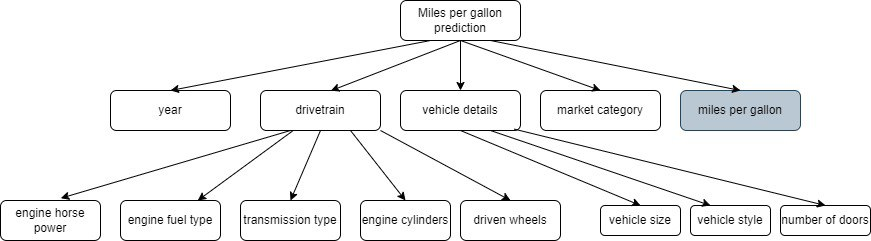

###For each domain concept, design descriptive features that best describe a concept using data from the dataset. Summarize the resulting Analytical Base Table (ABT) in a table with the following columns [0.5]:###
i. Feature Name
ii. Domain Concept
iii. Feature Description
iv. Feature Type
v. Data Type

In [6]:
dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df_abt_initial = dataset[['Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg']] #eliminate irrelavant features like MSRP, Popularity, Make, Model as they do not affect fuel efficiency

In [8]:
df_abt_initial.head()

Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  2011  premium unleaded (required)      335.0               6.0   
1  2011  premium unleaded (required)      300.0               6.0   
2  2011  premium unleaded (required)      300.0               6.0   
3  2011  premium unleaded (required)      230.0               6.0   
4  2011  premium unleaded (required)      230.0               6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   
3            MANUAL  rear wheel drive              2.0   
4            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  
0           26        19  
1           28        19  
2           28        20  
3           28        18  
4           28        18

__Domain knowledge:__ The difference between highway MPG and city MPG is due to the aerodynamic efficiency of the cars and has little to do with mileage, and hence highway MPG and city MPG are averaged to get a good overall estimate.

In [9]:
# average highway mpg and city mpg to generate column mpg with the mean
df_abt_initial['mpg'] = df_abt_initial[['highway MPG', 'city mpg']].mean(axis=1)
df_abt_initial.head()

<ipython-input-9-89549b3f0e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abt_initial['mpg'] = df_abt_initial[['highway MPG', 'city mpg']].mean(axis=1)


Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  2011  premium unleaded (required)      335.0               6.0   
1  2011  premium unleaded (required)      300.0               6.0   
2  2011  premium unleaded (required)      300.0               6.0   
3  2011  premium unleaded (required)      230.0               6.0   
4  2011  premium unleaded (required)      230.0               6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   
3            MANUAL  rear wheel drive              2.0   
4            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg   mpg  
0           26        19  22.5  
1           28        19  23.5  
2           28        20  24.0  
3           28        18  23.0  
4           28        18  23.0

In [10]:
#drop highway mpg and city mpg to display the ABT with features and target
df_abt_initial.drop(columns=['highway MPG', 'city mpg'], inplace=True)
df_abt_initial.head()

<ipython-input-10-581983a635ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abt_initial.drop(columns=['highway MPG', 'city mpg'], inplace=True)


Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  2011  premium unleaded (required)      335.0               6.0   
1  2011  premium unleaded (required)      300.0               6.0   
2  2011  premium unleaded (required)      300.0               6.0   
3  2011  premium unleaded (required)      230.0               6.0   
4  2011  premium unleaded (required)      230.0               6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   
3            MANUAL  rear wheel drive              2.0   
4            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style   mpg  
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe  22.5  
1                     Luxury,Performance      Compact   Convertible  23.5  
2                Luxury,High-Performance      Compact         Coupe  24.0  
3                     Luxury,Performance      Compact         Coupe  23.0  
4                                 Luxury      Compact   Convertible  23.0

__Analytics Base Table__

In [11]:
df_abt_initial #this is the ABT before data exploration

Year                Engine Fuel Type  Engine HP  Engine Cylinders  \
0      2011     premium unleaded (required)      335.0               6.0   
1      2011     premium unleaded (required)      300.0               6.0   
2      2011     premium unleaded (required)      300.0               6.0   
3      2011     premium unleaded (required)      230.0               6.0   
4      2011     premium unleaded (required)      230.0               6.0   
...     ...                             ...        ...               ...   
11909  2012     premium unleaded (required)      300.0               6.0   
11910  2012     premium unleaded (required)      300.0               6.0   
11911  2012     premium unleaded (required)      300.0               6.0   
11912  2013  premium unleaded (recommended)      300.0               6.0   
11913  2006                regular unleaded      221.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors  \
0                MANUAL   rear wheel drive              2.0   
1                MANUAL   rear wheel drive              2.0   
2                MANUAL   rear wheel drive              2.0   
3                MANUAL   rear wheel drive              2.0   
4                MANUAL   rear wheel drive              2.0   
...                 ...                ...              ...   
11909         AUTOMATIC    all wheel drive              4.0   
11910         AUTOMATIC    all wheel drive              4.0   
11911         AUTOMATIC    all wheel drive              4.0   
11912         AUTOMATIC    all wheel drive              4.0   
11913         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style   mpg  
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe  22.5  
1                         Luxury,Performance      Compact    Convertible  23.5  
2                    Luxury,High-Performance      Compact          Coupe  24.0  
3                         Luxury,Performance      Compact          Coupe  23.0  
4                                     Luxury      Compact    Convertible  23.0  
...                                      ...          ...            ...   ...  
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback  19.5  
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback  19.5  
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback  19.5  
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback  19.5  
11913                                 Luxury      Midsize          Sedan  21.5  

[11914 rows x 11 columns]

In [12]:
#Summarizing the ABT Table
import pandas as pd
df_abt_summary = pd.DataFrame({
    'Feature Name': ['Year', 'Engine HP', 'Engine Fuel Type', 'Engine Cylinders',
                     'Transmission Type', 'Driven_Wheels', 'Number of Doors',
                     'Market Category', 'Vehicle Size', 'Vehicle Style', 'mpg'],
    'Domain Concept': ['year', 'drivetrain', 'drivetrain', 'drivetrain',
                      'drivetrain', 'drivetrain', 'vehicle det', 'vehicle det',
                      'vehicle det', 'vehicle det', 'Prediction subject'],
    'Feature Description': ['Year of manufacture', 'Engine Horsepower',
                          'Engine Fuel Type', 'Number of cylinders in engine',
                          'Type of transmission', 'Driven wheels',
                          'Number of doors', 'Market Category', 'Vehicle Size',
                          'Vehicle Style', 'Miles per gallon'],
    'Feature Type': ['Continuous', 'Continuous', 'Categorical',
                    'Categorical', 'Categorical', 'Categorical',
                    'Categorical', 'Categorical', 'Categorical',
                    'Categorical', 'Continuous'],
    'Data Type': ['int64', 'int64', 'object', 'int64', 'object', 'object',
                 'int64', 'object', 'object', 'object', 'float64']
})


And, below is the summary of the initial ABT table

In [13]:
df_abt_summary

Feature Name      Domain Concept            Feature Description  \
0                Year                year            Year of manufacture   
1           Engine HP          drivetrain              Engine Horsepower   
2    Engine Fuel Type          drivetrain               Engine Fuel Type   
3    Engine Cylinders          drivetrain  Number of cylinders in engine   
4   Transmission Type          drivetrain           Type of transmission   
5       Driven_Wheels          drivetrain                  Driven wheels   
6     Number of Doors         vehicle det                Number of doors   
7     Market Category         vehicle det                Market Category   
8        Vehicle Size         vehicle det                   Vehicle Size   
9       Vehicle Style         vehicle det                  Vehicle Style   
10                mpg  Prediction subject               Miles per gallon   

   Feature Type Data Type  
0    Continuous     int64  
1    Continuous     int64  
2   Categorical    object  
3   Categorical     int64  
4   Categorical    object  
5   Categorical    object  
6   Categorical     int64  
7   Categorical    object  
8   Categorical    object  
9   Categorical    object  
10   Continuous   float64

#__2. Data Exploration__

**2a. Create a data quality report for the resulting ABT. This report should include metrics such as completeness (percentage of missing values), uniqueness(identification of duplicate records), and consistency (validity of data formats and logical rules). [0.5]**



**2b. Identify any data quality issues found in the ABT and propose a data quality plan to address these issues. Document the steps you will take to clean and preprocess the data. [0.5]**

Here, we proceed to explore the features of the dataset and generate a data quality report for continuous and categorical features:

__Data quality report:__

In [14]:
#shape of the dataframe gives a hint on the number of rows x number of columns
df_abt_initial.shape

(11914, 11)

In [15]:
df_abt_initial.info() #features of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               11914 non-null  int64  
 1   Engine Fuel Type   11911 non-null  object 
 2   Engine HP          11845 non-null  float64
 3   Engine Cylinders   11884 non-null  float64
 4   Transmission Type  11914 non-null  object 
 5   Driven_Wheels      11914 non-null  object 
 6   Number of Doors    11908 non-null  float64
 7   Market Category    8172 non-null   object 
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  mpg                11914 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1024.0+ KB


In [16]:
#converting the object type to string type
df_abt_initial = df_abt_initial.convert_dtypes()
df_abt_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               11914 non-null  Int64  
 1   Engine Fuel Type   11911 non-null  string 
 2   Engine HP          11845 non-null  Int64  
 3   Engine Cylinders   11884 non-null  Int64  
 4   Transmission Type  11914 non-null  string 
 5   Driven_Wheels      11914 non-null  string 
 6   Number of Doors    11908 non-null  Int64  
 7   Market Category    8172 non-null   string 
 8   Vehicle Size       11914 non-null  string 
 9   Vehicle Style      11914 non-null  string 
 10  mpg                11914 non-null  Float64
dtypes: Float64(1), Int64(4), string(6)
memory usage: 1.1 MB


In [17]:
#exploring the first row in the dataframe
df_abt_initial.loc[0]

Year                                                  2011
Engine Fuel Type               premium unleaded (required)
Engine HP                                              335
Engine Cylinders                                         6
Transmission Type                                   MANUAL
Driven_Wheels                             rear wheel drive
Number of Doors                                          2
Market Category      Factory Tuner,Luxury,High-Performance
Vehicle Size                                       Compact
Vehicle Style                                        Coupe
mpg                                                   22.5
Name: 0, dtype: object

In [18]:
#exploring the last row in the dataframe
df_abt_initial.loc[11914-1]

Year                              2006
Engine Fuel Type      regular unleaded
Engine HP                          221
Engine Cylinders                     6
Transmission Type            AUTOMATIC
Driven_Wheels        front wheel drive
Number of Doors                      4
Market Category                 Luxury
Vehicle Size                   Midsize
Vehicle Style                    Sedan
mpg                               21.5
Name: 11913, dtype: object

In [19]:
# list the number of duplicate rows in the dataset
df_abt_initial.duplicated().sum()

5639

In [20]:
dataset.tail() #observing why there is such a high number of duplicates in the original dataset

Make   Model  Year                Engine Fuel Type  Engine HP  \
11909    Acura     ZDX  2012     premium unleaded (required)      300.0   
11910    Acura     ZDX  2012     premium unleaded (required)      300.0   
11911    Acura     ZDX  2012     premium unleaded (required)      300.0   
11912    Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                  Market Category Vehicle Size  Vehicle Style  highway MPG  \
11909  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11910  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11911  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11912  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11913                      Luxury      Midsize          Sedan           26   

       city mpg  Popularity   MSRP  
11909        16         204  46120  
11910        16         204  56670  
11911        16         204  50620  
11912        16         204  50920  
11913        17          61  28995

##Observation 1

- **Data quality issue:** High duplicate values
- **Data quality plan:** It can be observed that there are 5639 duplicate rows in the intial ABT dataframe. On observing the initial dataset as above we find that these rows are differentiated by only their MSRP which is irrelavant for the business problem. These duplicate records should be eliminated in the data preparation stage.

__Continouse features data quality report__

In [21]:
df_abt_initial.describe() #these are the statistics of the numerical columns in the dataframe

Year  Engine HP  Engine Cylinders  Number of Doors       mpg
count      11914.0    11845.0           11884.0          11908.0   11914.0
mean   2010.384338  249.38607          5.628829         3.436093  23.18537
std        7.57974  109.19187          1.780559         0.881315  8.669212
min         1990.0       55.0               0.0              2.0       9.5
25%         2007.0      170.0               4.0              2.0      18.5
50%         2015.0      227.0               6.0              4.0      22.0
75%         2016.0      300.0               6.0              4.0      26.5
max         2017.0     1001.0              16.0              4.0     189.0

In [22]:
#statistics like missing values, cardinality, and median are as shown below
df_abt_initial.isna().sum()  #number of missing values

Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
mpg                     0
dtype: int64

##Observation 2

- **Data quality issue**: Missing values
- **Data quality plan**: It can be observed that there are 3742 missing values in market category, 30 in Engine Cylinder, 6 in number of doors, 69 in Engine HP and 3 in Engine Fuel type. In the data preparation stage, these missing values can be eliminated or replaced with appropriate values based on the impact on other records.

In [23]:
df_abt_initial.nunique() #number of unique data points

Year                  28
Engine Fuel Type      10
Engine HP            356
Engine Cylinders       9
Transmission Type      5
Driven_Wheels          4
Number of Doors        3
Market Category       71
Vehicle Size           3
Vehicle Style         16
mpg                  102
dtype: int64

##**Feature visualization:**
To identify the data distribution of the features.

##**Continuous features data quality report:**

Feature: MPG

array([[<Axes: title={'center': 'mpg'}>]], dtype=object)

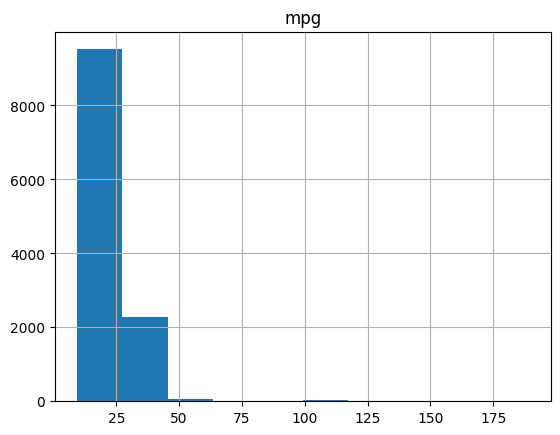

In [24]:
#To observe Data distribution
df_abt_initial.hist(column=['mpg'])

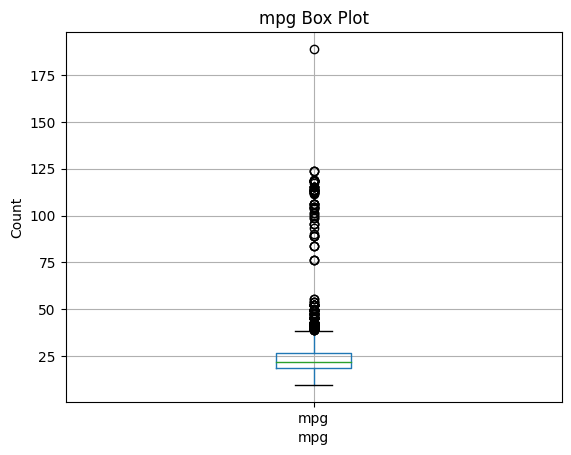

In [25]:
#Drawing the box plot for mpg
import matplotlib.pyplot as plt
df_abt_initial.boxplot(column=['mpg'])
plt.title('mpg Box Plot')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()

In [26]:
#To display the outliers
Q1 = df_abt_initial['mpg'].quantile(0.25)
Q3 = df_abt_initial['mpg'].quantile(0.75)
print(Q1, Q3)

IQR = Q3-Q1
outliers_df = df_abt_initial[(df_abt_initial['mpg'] < (Q1 - 1.75 * IQR)) | (df_abt_initial['mpg'] > (Q3 + 1.75 * IQR))]
outliers_df

18.5 26.5


Year                Engine Fuel Type  Engine HP  Engine Cylinders  \
539   2015                        electric       <NA>                 0   
540   2016                        electric       <NA>                 0   
541   2017                        electric       <NA>                 0   
1119  2017  premium unleaded (recommended)        252                 4   
1202  2014                regular unleaded        195                 4   
...    ...                             ...        ...               ...   
9868  2014                        electric        140                 0   
9869  2015                        electric        140                 0   
9870  2015                        electric        140                 0   
9871  2016                        electric        140                 0   
9872  2016                        electric        140                 0   

     Transmission Type      Driven_Wheels  Number of Doors Market Category  \
539       DIRECT_DRIVE  front wheel drive                2       Hatchback   
540       DIRECT_DRIVE  front wheel drive                2       Hatchback   
541       DIRECT_DRIVE  front wheel drive                2       Hatchback   
1119  AUTOMATED_MANUAL  front wheel drive                4          Luxury   
1202         AUTOMATIC  front wheel drive                4          Hybrid   
...                ...                ...              ...             ...   
9868      DIRECT_DRIVE  front wheel drive                4       Hatchback   
9869      DIRECT_DRIVE  front wheel drive                4       Hatchback   
9870      DIRECT_DRIVE  front wheel drive                4       Hatchback   
9871      DIRECT_DRIVE  front wheel drive                4       Hatchback   
9872      DIRECT_DRIVE  front wheel drive                4       Hatchback   

     Vehicle Size  Vehicle Style    mpg  
539       Compact  2dr Hatchback  115.0  
540       Compact  2dr Hatchback  112.0  
541       Compact  2dr Hatchback  112.0  
1119      Midsize          Sedan  189.0  
1202      Midsize          Sedan   47.5  
...           ...            ...    ...  
9868      Compact  4dr Hatchback  118.5  
9869      Compact  4dr Hatchback  118.5  
9870      Compact  4dr Hatchback  118.5  
9871      Compact  4dr Hatchback  118.5  
9872      Compact  4dr Hatchback  118.5  

[180 rows x 11 columns]

In [27]:
outliers_df.shape

(180, 11)

In [28]:
#count of the unique outlier values in the given column
outliers_df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                  103
electric                           66
premium unleaded (required)        10
premium unleaded (recommended)      1
Name: count, dtype: Int64

##Observation 3##

- **Data Quality Issue:** Outliers in MPG.
- **Data Quality Plan:**Majority of the records in the dataset are regular unleaded and hence these records cannot be eliminated as part of the outliers and from domain knowledge electric vehicles cannot have a miles per gallon parameter and instead will be miles per full charge. Hence, records with electric fuel type have to be eliminated as done below.

In [29]:
# removing rows with the engine fuel type electric
df_abt_initial = df_abt_initial[df_abt_initial['Engine Fuel Type'] != 'electric']

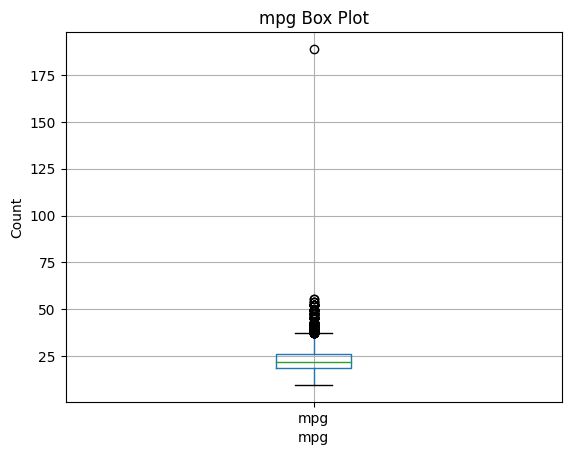

In [30]:
import matplotlib.pyplot as plt
df_abt_initial.boxplot(column=['mpg'])
plt.title('mpg Box Plot')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()

In [31]:
Q1 = df_abt_initial['mpg'].quantile(0.25)
Q3 = df_abt_initial['mpg'].quantile(0.75)
print(Q1, Q3)

IQR = Q3-Q1
outliers_df = df_abt_initial[(df_abt_initial['mpg'] < (Q1 - 1.75 * IQR)) | (df_abt_initial['mpg'] > (Q3 + 1.75 * IQR))]
outliers_df

18.5 26.0


Year                Engine Fuel Type  Engine HP  Engine Cylinders  \
1119  2017  premium unleaded (recommended)        252                 4   
1202  2014                regular unleaded        195                 4   
1203  2014                regular unleaded        195                 4   
1204  2014                regular unleaded        195                 4   
1205  2015                regular unleaded        196                 4   
...    ...                             ...        ...               ...   
9713  2016                regular unleaded        193                 4   
9714  2016                regular unleaded        193                 4   
9715  2017                regular unleaded        193                 4   
9716  2017                regular unleaded        193                 4   
9717  2017                regular unleaded        193                 4   

     Transmission Type      Driven_Wheels  Number of Doors Market Category  \
1119  AUTOMATED_MANUAL  front wheel drive                4          Luxury   
1202         AUTOMATIC  front wheel drive                4          Hybrid   
1203         AUTOMATIC  front wheel drive                4          Hybrid   
1204         AUTOMATIC  front wheel drive                4          Hybrid   
1205         AUTOMATIC  front wheel drive                4          Hybrid   
...                ...                ...              ...             ...   
9713         AUTOMATIC  front wheel drive                4          Hybrid   
9714         AUTOMATIC  front wheel drive                4          Hybrid   
9715         AUTOMATIC  front wheel drive                4          Hybrid   
9716         AUTOMATIC  front wheel drive                4          Hybrid   
9717         AUTOMATIC  front wheel drive                4          Hybrid   

     Vehicle Size Vehicle Style    mpg  
1119      Midsize         Sedan  189.0  
1202      Midsize         Sedan   47.5  
1203      Midsize         Sedan   47.5  
1204      Midsize         Sedan   47.5  
1205      Midsize         Sedan   47.5  
...           ...           ...    ...  
9713      Midsize         Sedan   41.0  
9714      Midsize         Sedan   41.0  
9715      Midsize         Sedan   42.0  
9716      Midsize         Sedan   40.5  
9717      Midsize         Sedan   40.5  

[153 rows x 11 columns]

##Observation 4

- **Data quality issue:** One extreme outlier
- **Data quality plan:** After eliminating the electric vehicles. There is a presence of one extreme outlier. While investigating the cause it was observed that the highway mpg of this datapoint was 354 and city mpg was 24 creating extreme variance and hence we can replace that with the city mpg value in the data preparation phase.
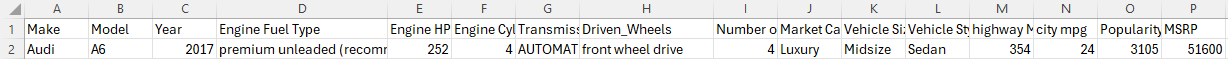

Feature: Engine HP

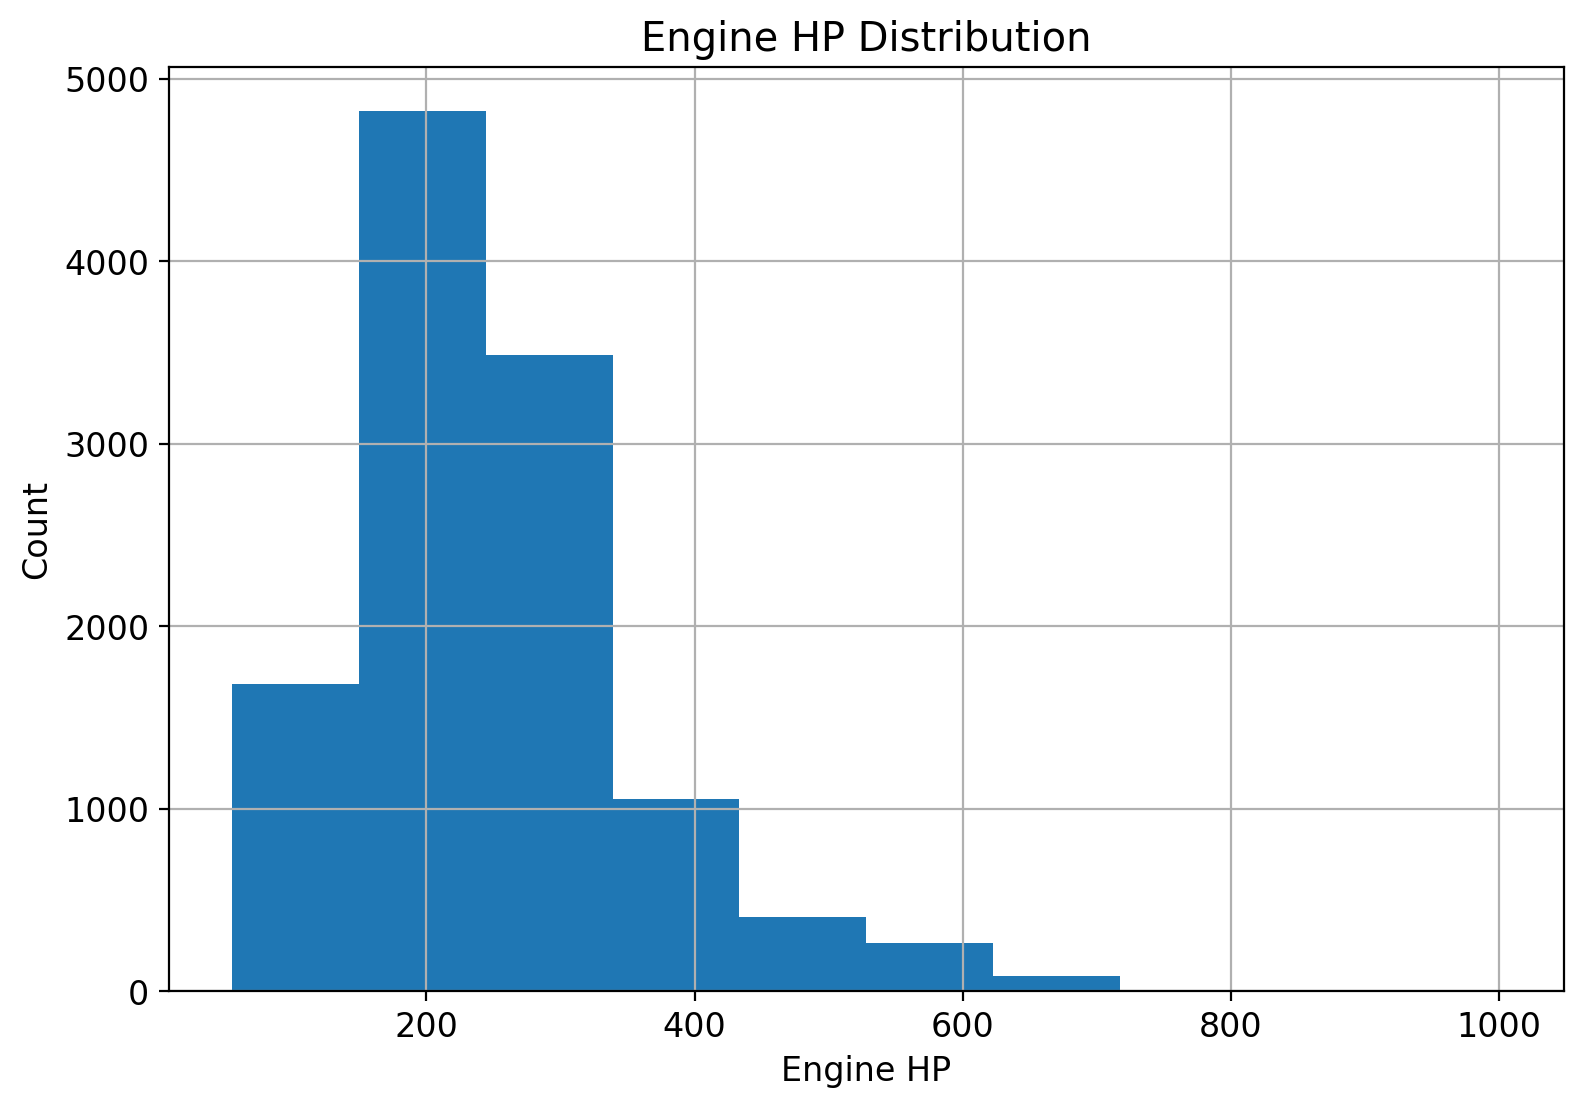

In [32]:
plt.rcParams["figure.figsize"] = [9, 6]
plt.rcParams["font.size"] = 12

%config InlineBackend.figure_format = 'retina'

df_abt_initial.hist(column=['Engine HP'])
plt.title('Engine HP Distribution')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()

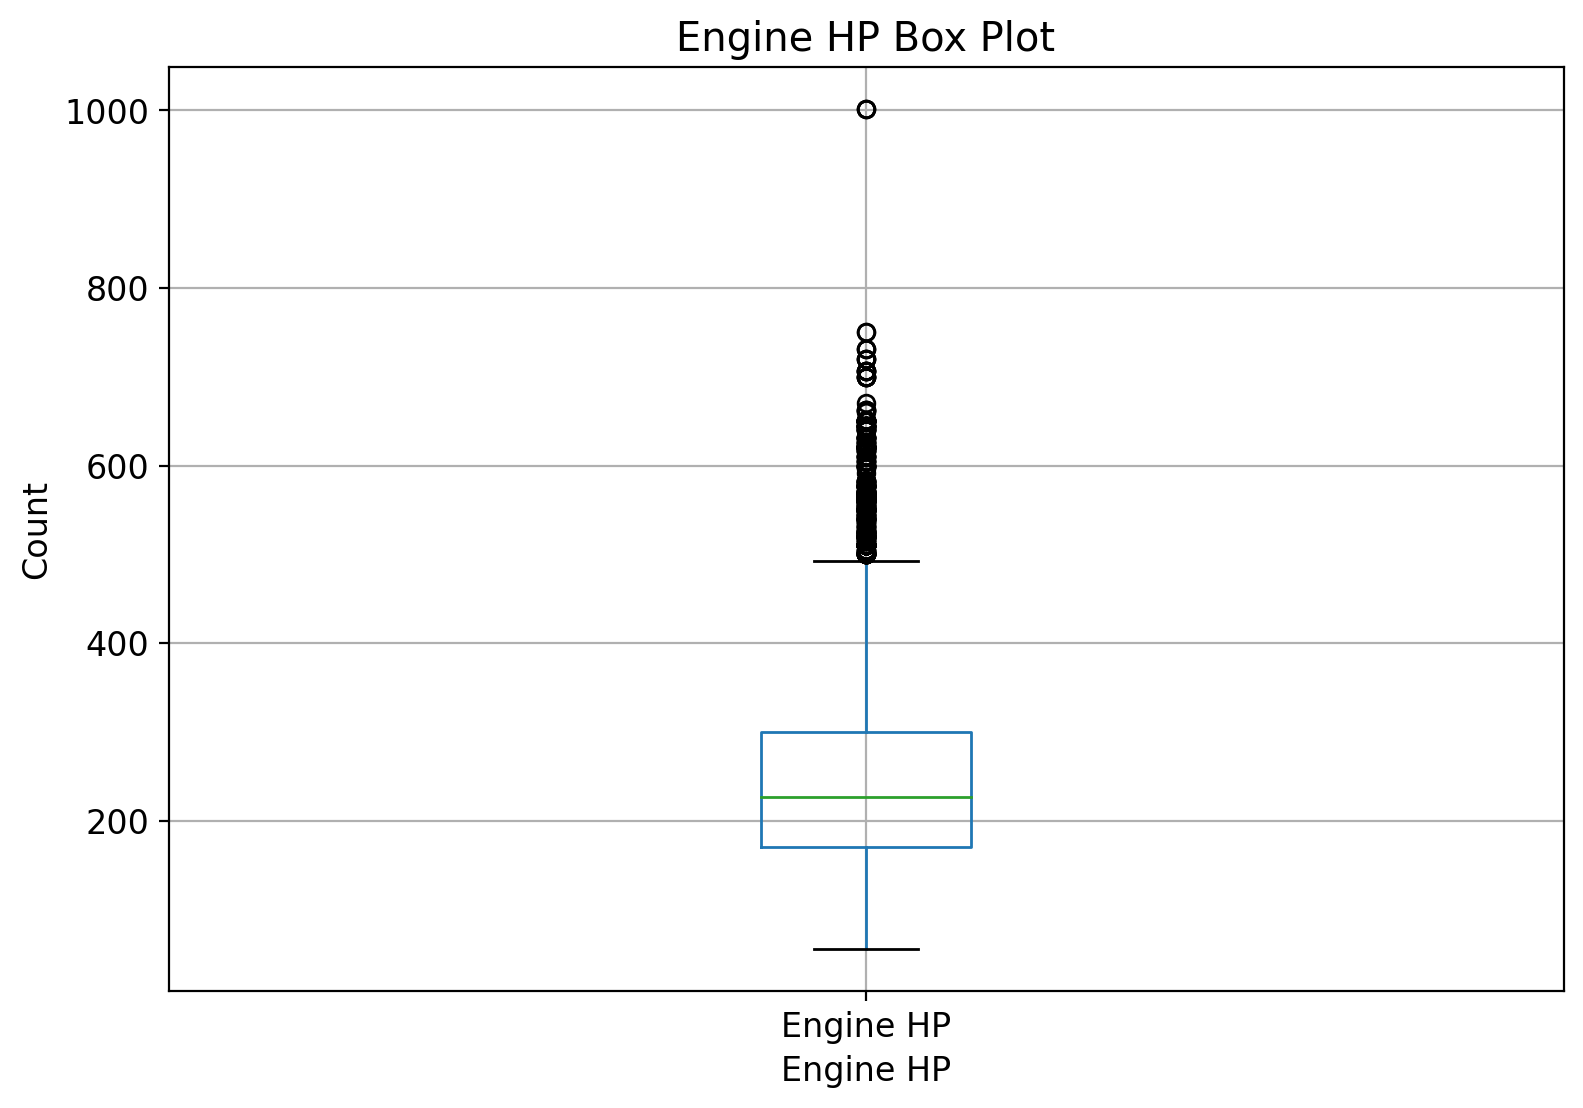

In [33]:
import matplotlib.pyplot as plt
df_abt_initial.boxplot(column=['Engine HP'])
plt.title('Engine HP Box Plot')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()

In [34]:
Q1 = df_abt_initial['Engine HP'].quantile(0.25)
Q3 = df_abt_initial['Engine HP'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df_abt_initial[(df_abt_initial['Engine HP'] < (Q1 - 1.95 * IQR)) | (df_abt_initial['Engine HP'] > (Q3 + 1.95 * IQR))]
outliers_df

Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
466    2013  premium unleaded (required)        562                 8   
467    2013  premium unleaded (required)        562                 8   
468    2014  premium unleaded (required)        562                 8   
469    2014  premium unleaded (required)        597                 8   
470    2014  premium unleaded (required)        562                 8   
...     ...                          ...        ...               ...   
11509  2016  premium unleaded (required)        567                 8   
11510  2017  premium unleaded (required)        567                 8   
11523  2015  premium unleaded (required)        567                 8   
11524  2016  premium unleaded (required)        567                 8   
11525  2017  premium unleaded (required)        567                 8   

      Transmission Type     Driven_Wheels  Number of Doors  \
466    AUTOMATED_MANUAL  rear wheel drive                2   
467    AUTOMATED_MANUAL  rear wheel drive                2   
468    AUTOMATED_MANUAL  rear wheel drive                2   
469    AUTOMATED_MANUAL  rear wheel drive                2   
470    AUTOMATED_MANUAL  rear wheel drive                2   
...                 ...               ...              ...   
11509         AUTOMATIC   all wheel drive                4   
11510         AUTOMATIC   all wheel drive                4   
11523         AUTOMATIC   all wheel drive                4   
11524         AUTOMATIC   all wheel drive                4   
11525         AUTOMATIC   all wheel drive                4   

                                       Market Category Vehicle Size  \
466                            Exotic,High-Performance      Compact   
467                            Exotic,High-Performance      Compact   
468                            Exotic,High-Performance      Compact   
469                            Exotic,High-Performance      Compact   
470                            Exotic,High-Performance      Compact   
...                                                ...          ...   
11509  Crossover,Factory Tuner,Luxury,High-Performance      Midsize   
11510  Crossover,Factory Tuner,Luxury,High-Performance      Midsize   
11523  Crossover,Factory Tuner,Luxury,High-Performance      Midsize   
11524  Crossover,Factory Tuner,Luxury,High-Performance      Midsize   
11525  Crossover,Factory Tuner,Luxury,High-Performance      Midsize   

      Vehicle Style   mpg  
466     Convertible  15.0  
467           Coupe  15.0  
468           Coupe  15.0  
469           Coupe  15.0  
470     Convertible  15.0  
...             ...   ...  
11509       4dr SUV  16.5  
11510       4dr SUV  16.5  
11523       4dr SUV  16.5  
11524       4dr SUV  16.5  
11525       4dr SUV  16.5  

[286 rows x 11 columns]

In [35]:
#Number of unique outliers datapoints in Engine HP column
outliers_df['Engine HP'].value_counts().sort_values()

Engine HP
660      1
592      1
670      1
573      1
661      1
572      1
622      1
557      1
582      2
604      2
617      2
750      2
597      2
641      3
624      3
1001     3
651      3
731      3
662      4
720      4
610      4
605      4
632      4
611      4
580      5
616      5
626      5
707      6
565      6
583      6
620      6
640      6
568      6
700      6
556      7
562      7
631      7
600     11
567     12
645     14
563     15
570     16
621     18
577     20
650     21
560     24
Name: count, dtype: Int64

In [36]:
outliers_df['Engine HP'].nunique()

46

##Observation 5

- __Data quality issue:__ Misleading outliers
- __Data quality plan:__ From domain knowledge, these Engine HP values are realistic and are prevelant in most of the cars and almost all high HP values are from high performance cars. And removing all these values will result in heavy data loss and the model will not be able to evaluate fuel efficiency for high performance cars. But the HP value 1001 is an extreme and can be eliminated during data preparation.

Feature: Year

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

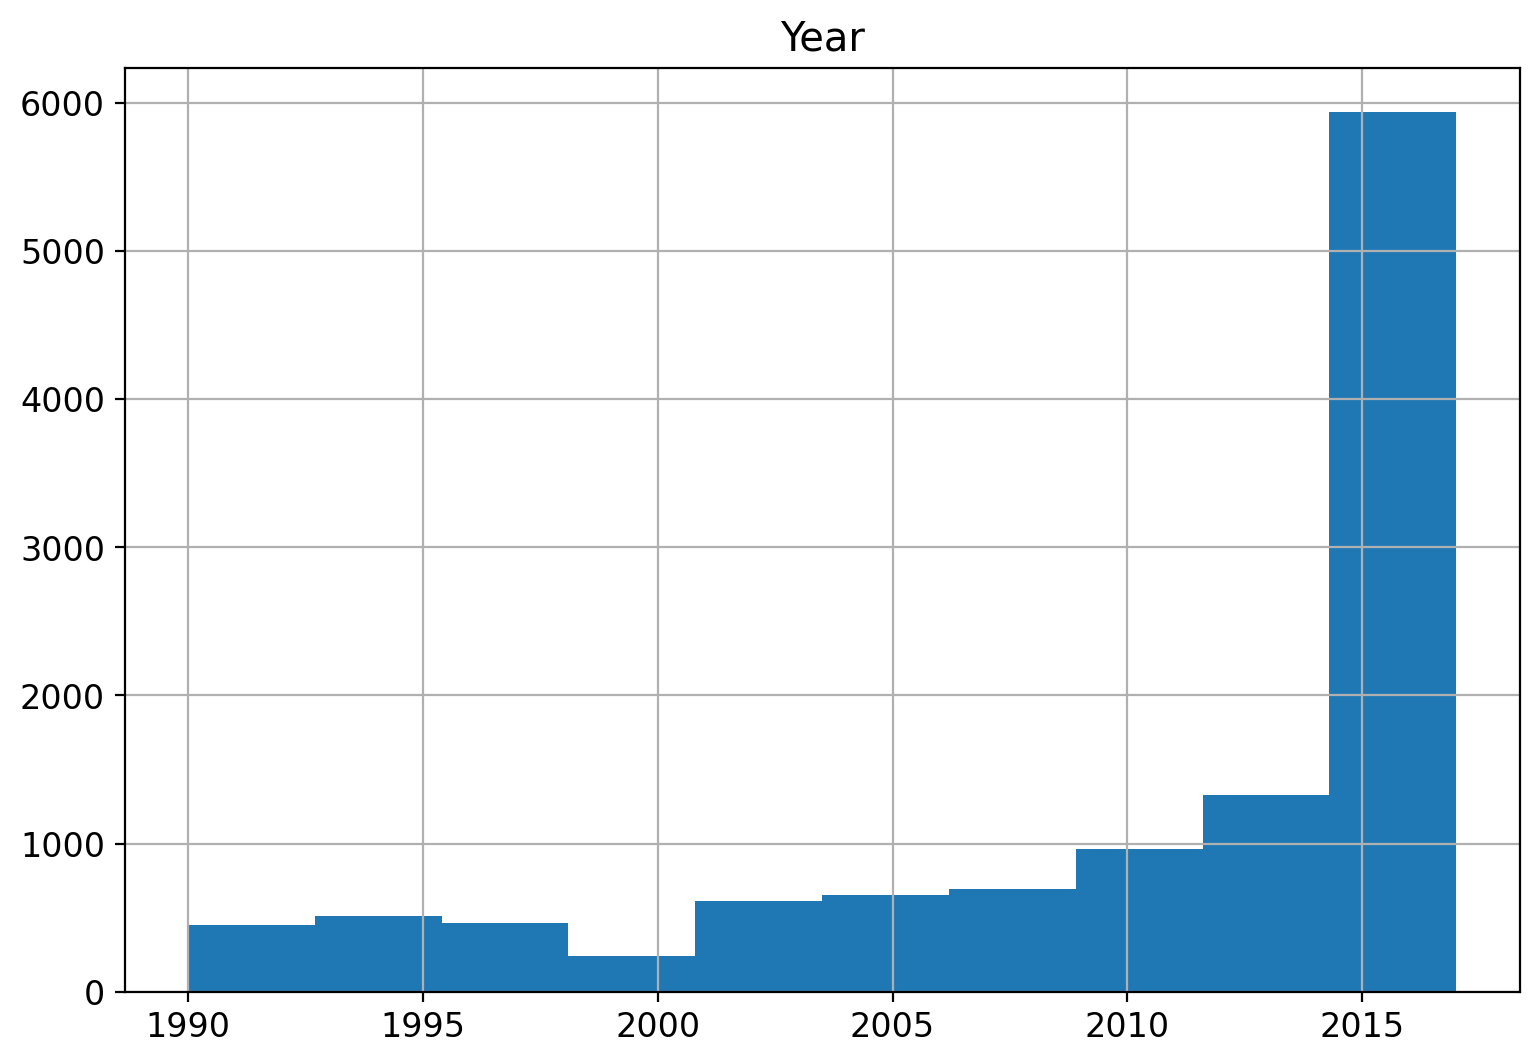

In [37]:
df_abt_initial.hist(column=['Year'])

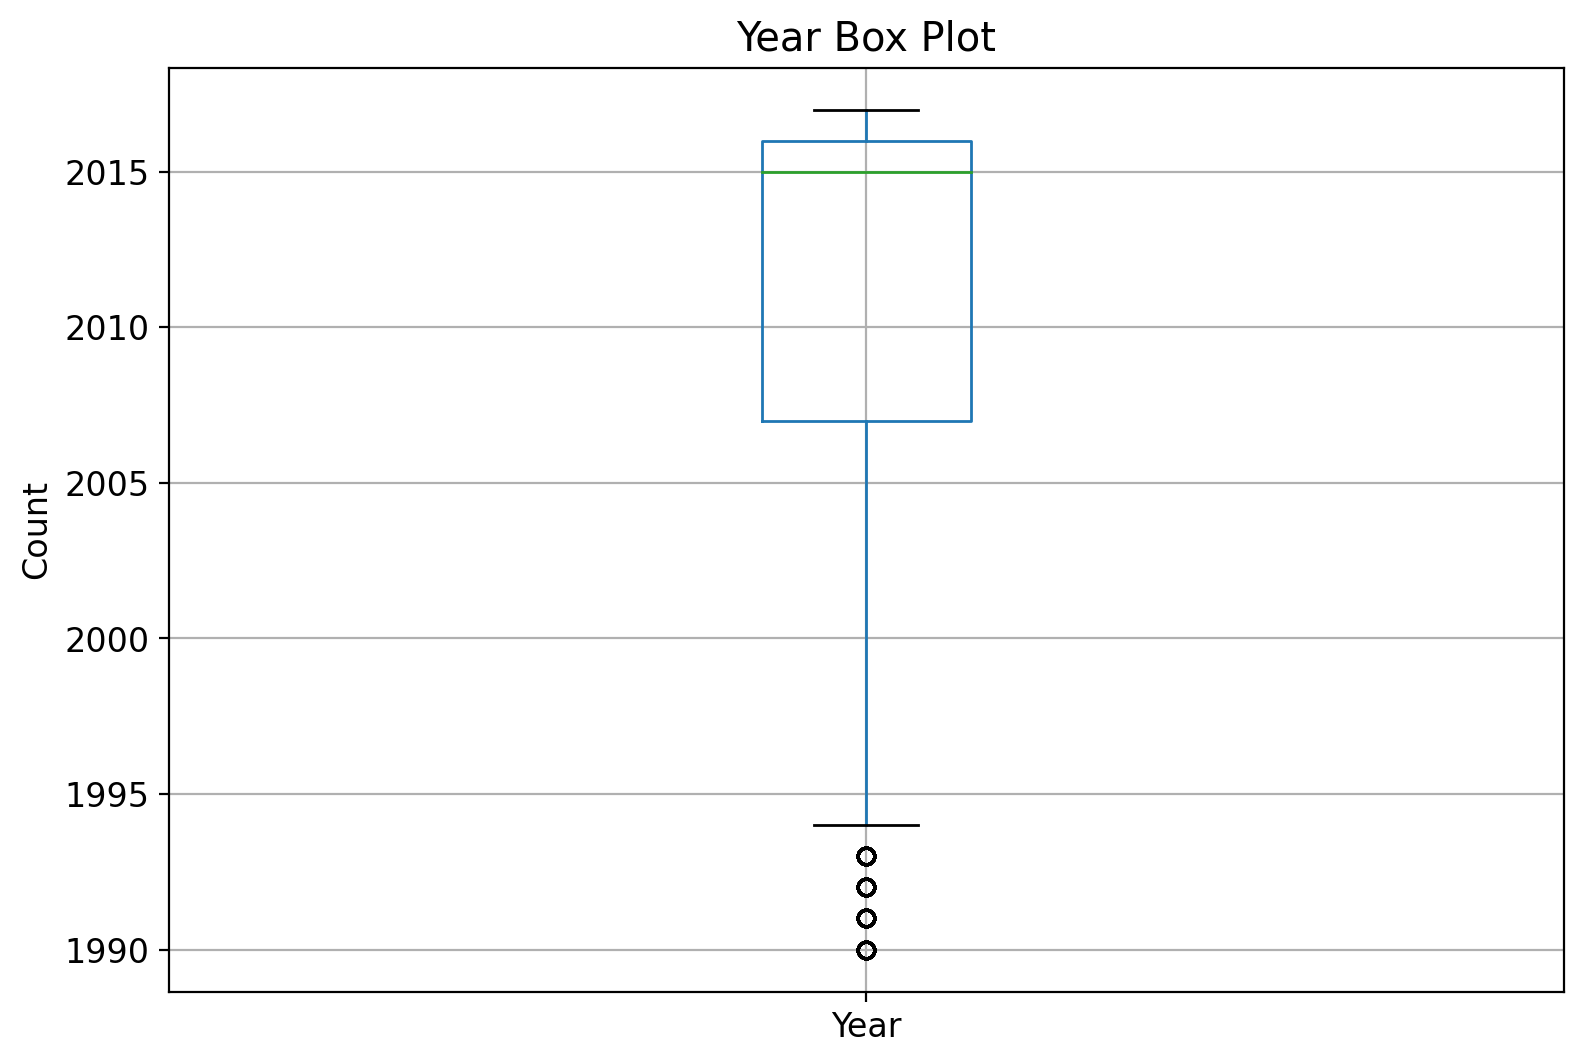

In [38]:
import matplotlib.pyplot as plt
df_abt_initial.boxplot(column=['Year'])
plt.title('Year Box Plot')
plt.ylabel('Count')
plt.show()

In [39]:
Q1_year = df_abt_initial['Year'].quantile(0.25)
Q3_year = df_abt_initial['Year'].quantile(0.75)

IQR = Q3_year-Q1_year
outliers_df_year = df_abt_initial[(df_abt_initial['Year'] < (Q1_year - 1.75 * IQR)) | (df_abt_initial['Year'] > (Q3_year + 1.75 * IQR))]
outliers_df_year

Year  Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type  \
35     1991  regular unleaded        130                 4            MANUAL   
36     1991  regular unleaded        158                 6            MANUAL   
58     1990  regular unleaded        162                 5         AUTOMATIC   
59     1990  regular unleaded        162                 5            MANUAL   
60     1990  regular unleaded        162                 5            MANUAL   
...     ...               ...        ...               ...               ...   
11214  1990  regular unleaded        107                 4         AUTOMATIC   
11215  1990  regular unleaded        107                 4         AUTOMATIC   
11792  1991  regular unleaded         97                 4            MANUAL   
11793  1991  regular unleaded        145                 6         AUTOMATIC   
11794  1991  regular unleaded        145                 6            MANUAL   

           Driven_Wheels  Number of Doors Market Category Vehicle Size  \
35      rear wheel drive                4          Luxury      Compact   
36      rear wheel drive                4          Luxury      Compact   
58     front wheel drive                4          Luxury      Midsize   
59       all wheel drive                4          Luxury      Midsize   
60       all wheel drive                4          Luxury      Midsize   
...                  ...              ...             ...          ...   
11214   rear wheel drive                3            <NA>      Compact   
11215   rear wheel drive                3            <NA>      Compact   
11792  front wheel drive                2            <NA>      Compact   
11793  front wheel drive                2            <NA>      Compact   
11794    all wheel drive                2            <NA>      Compact   

           Vehicle Style   mpg  
35                 Sedan  22.0  
36                 Sedan  21.0  
58                 Sedan  18.0  
59                 Wagon  18.5  
60                 Sedan  19.0  
...                  ...   ...  
11214  Passenger Minivan  17.5  
11215      Cargo Minivan  19.0  
11792              Coupe  25.5  
11793              Coupe  22.0  
11794              Coupe  19.5  

[275 rows x 11 columns]

In [40]:
outliers_df_year['Year'].value_counts().sort_values()

Year
1990    123
1991    152
Name: count, dtype: Int64

##Observation 6

- **Data Quality Issue:** Outliers in the year column.
- **Data Quality Plan:** From this observation we can see that the manufacturing and production of cars has significantly increased over the years but this provides little insight about the fuel efficiency of the cars itself. Removing the year column will result in not identifying the technological improvement over the years. Removing the outliers will result in loss of other important information.

##__Categorical features data quality report__

In [41]:
df_abt_initial.describe(exclude=['number']) #For categorical features

Engine Fuel Type Transmission Type      Driven_Wheels Market Category  \
count              11845             11845              11845            8111   
unique                 9                 5                  4              70   
top     regular unleaded         AUTOMATIC  front wheel drive       Crossover   
freq                7172              8263               4743            1107   

       Vehicle Size Vehicle Style  
count         11845         11845  
unique            3            16  
top         Compact         Sedan  
freq           4719          3027

In [42]:
#identifying other statistics for categorical data like:
#mode
df_abt_initial.apply(lambda ft: ft.mode().to_list())

Year  Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type  \
0  2015  regular unleaded        200                 4         AUTOMATIC   

       Driven_Wheels  Number of Doors Market Category Vehicle Size  \
0  front wheel drive                4       Crossover      Compact   

  Vehicle Style   mpg  
0         Sedan  19.5

In [43]:
#mode frequency
df_abt_initial.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

Year                 2151
Engine Fuel Type     7172
Engine HP             454
Engine Cylinders     4752
Transmission Type    8263
Driven_Wheels        4743
Number of Doors      8292
Market Category      1107
Vehicle Size         4719
Vehicle Style        3027
mpg                   554
dtype: int64

In [44]:
#2nd mode
df_abt_initial.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  2016  premium unleaded (required)        170                 6   

  Transmission Type     Driven_Wheels  Number of Doors Market Category  \
0            MANUAL  rear wheel drive                2       Flex Fuel   

  Vehicle Size Vehicle Style   mpg  
0      Midsize       4dr SUV  21.5

In [45]:
#2nd mode frequency
df_abt_initial.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

Year                 2133
Engine Fuel Type     2009
Engine HP             347
Engine Cylinders     4486
Transmission Type    2935
Driven_Wheels        3357
Number of Doors      3157
Market Category       872
Vehicle Size         4367
Vehicle Style        2485
mpg                   526
dtype: int64

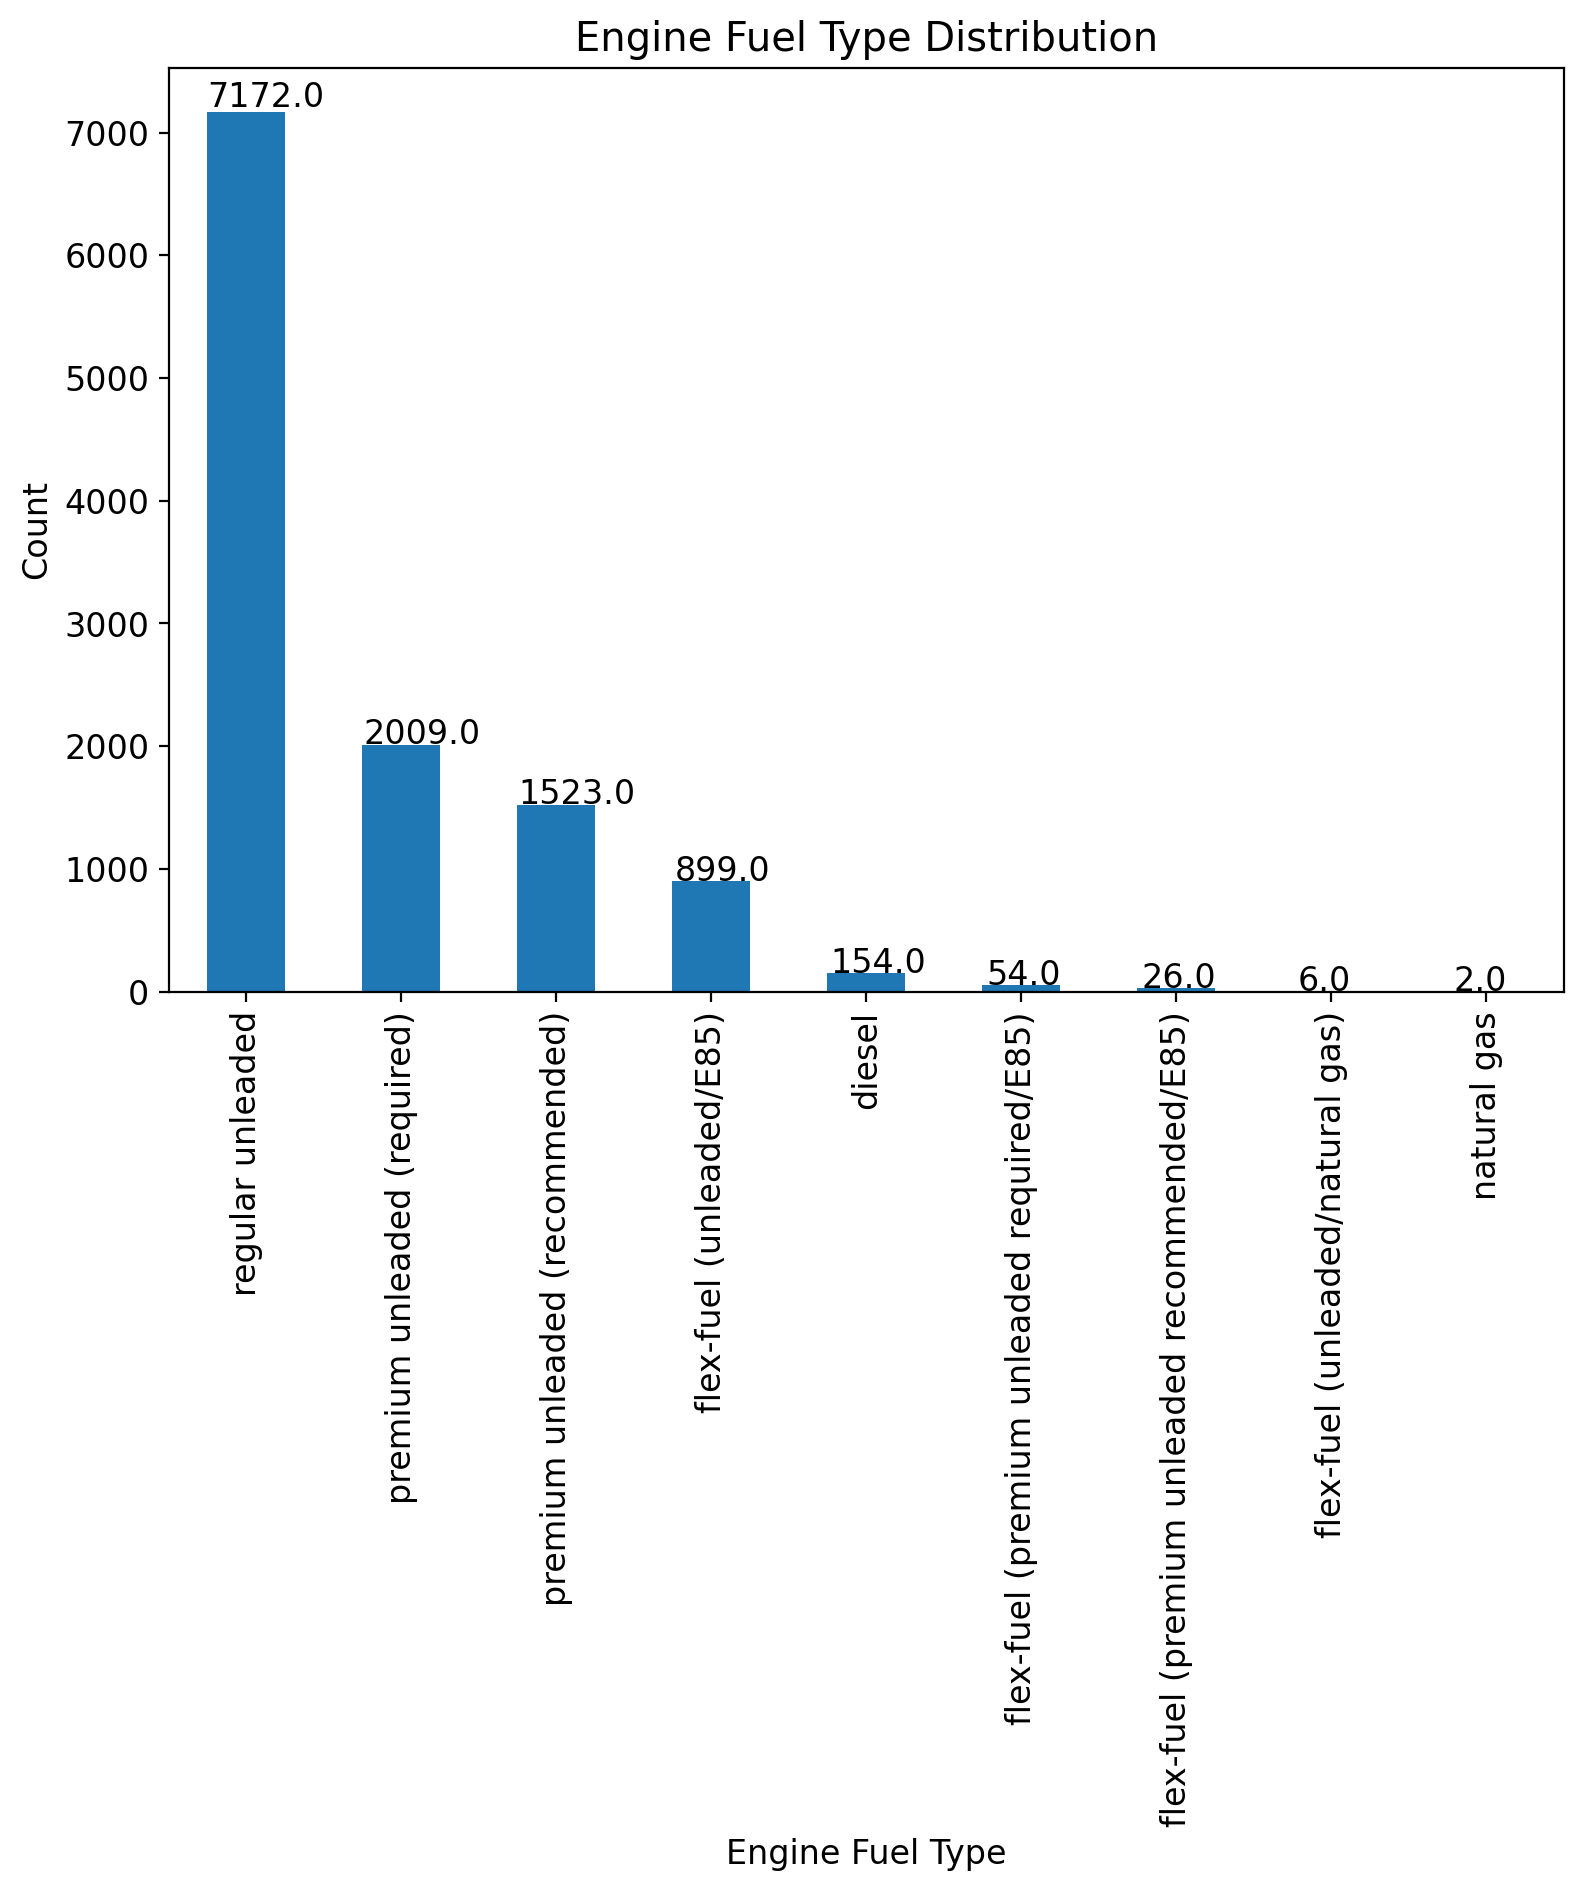

Number of missing engine fuel types: 0


In [46]:
#Bar plot
ax = df_abt_initial['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.title('Engine Fuel Type Distribution')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

missing_fuel_types = df_abt_initial['Engine Fuel Type'].isna().sum()
print(f"Number of missing engine fuel types: {missing_fuel_types}")

##Observation 7



- **Data Quality Issue:** Few values in some categories.
- **Data Quality Plan:**From the above chart, all the flex fuel categories allow use of both ecofriendly E85 fuel or natural gas along with the regular gasoline fuel. Therefore, the categories with lesser values can be replaced with their similar counterparts.

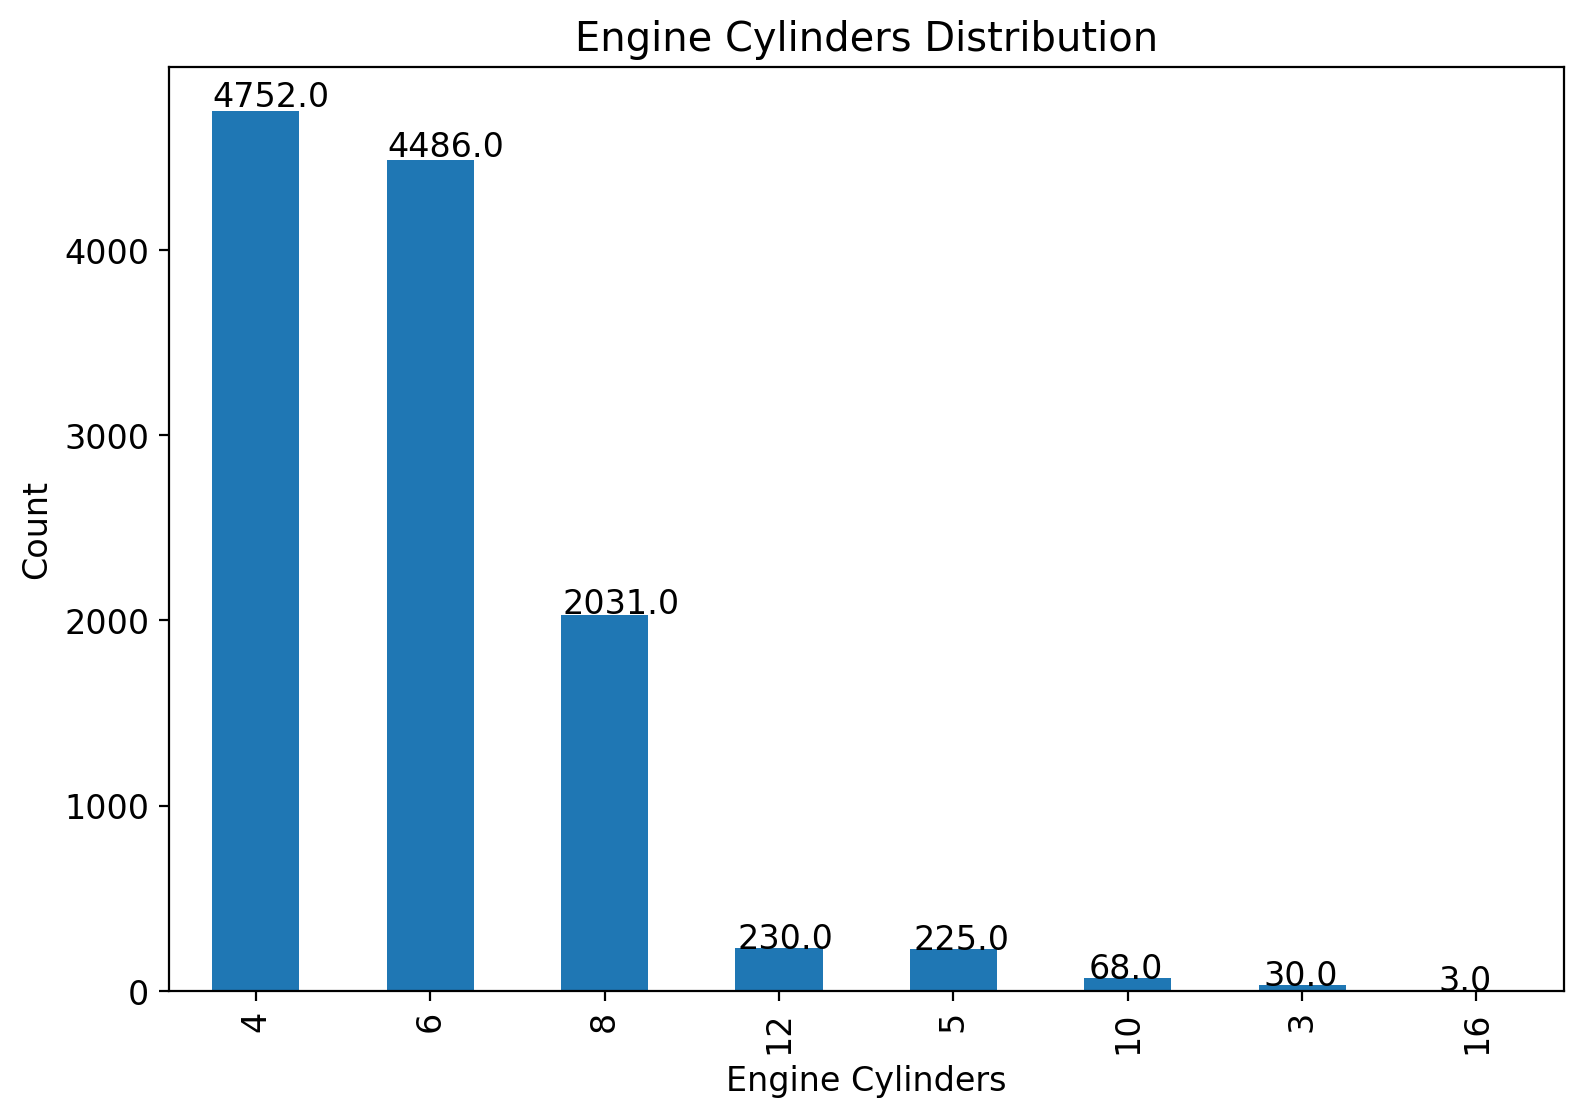

In [47]:
ax= df_abt_initial['Engine Cylinders'].value_counts().plot(kind='bar')
plt.title('Engine Cylinders Distribution')
plt.xlabel('Engine Cylinders')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##Observation 8##

- **Data quality issue:** Lesser records with 10,3,16 cylinders
- **Data quality plan:** The number of cylinders can be capped at its nearest cylinder number with more records. 3 cylinders capped at 4 and 10, 16 capped at 12.

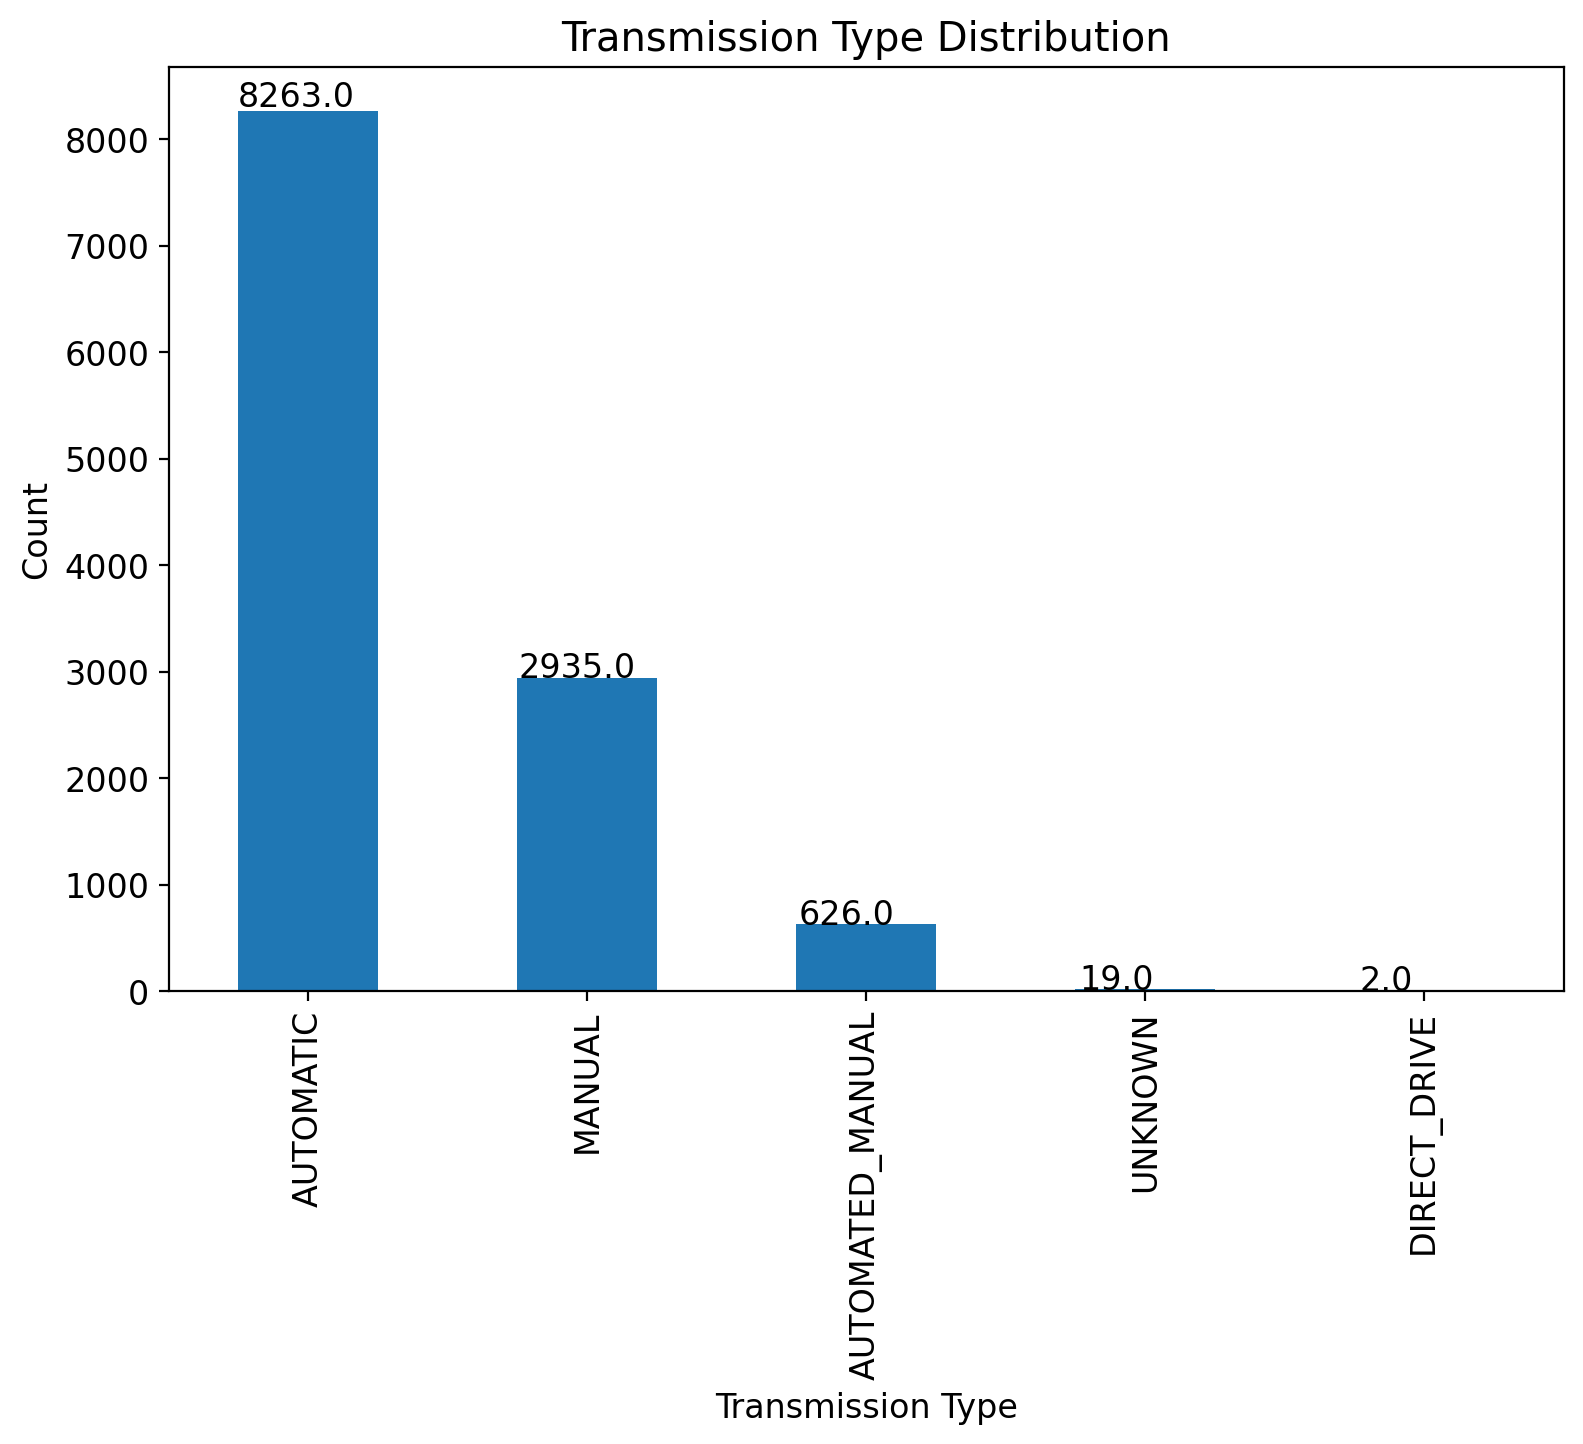

In [48]:
ax = df_abt_initial['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##Observation 9##

- **Data quality issue:** Few values in some categories
- **Data quality plan:** Unknown records are old cars and can hence can be assumed to be manual from domain knowledge, and direct_drive cars are hybrid, and hence can be assumed to be automatic. These replacements can be done during the next phase.

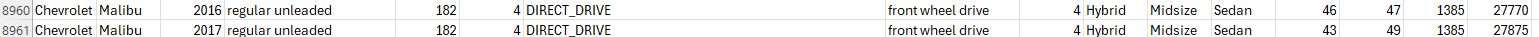

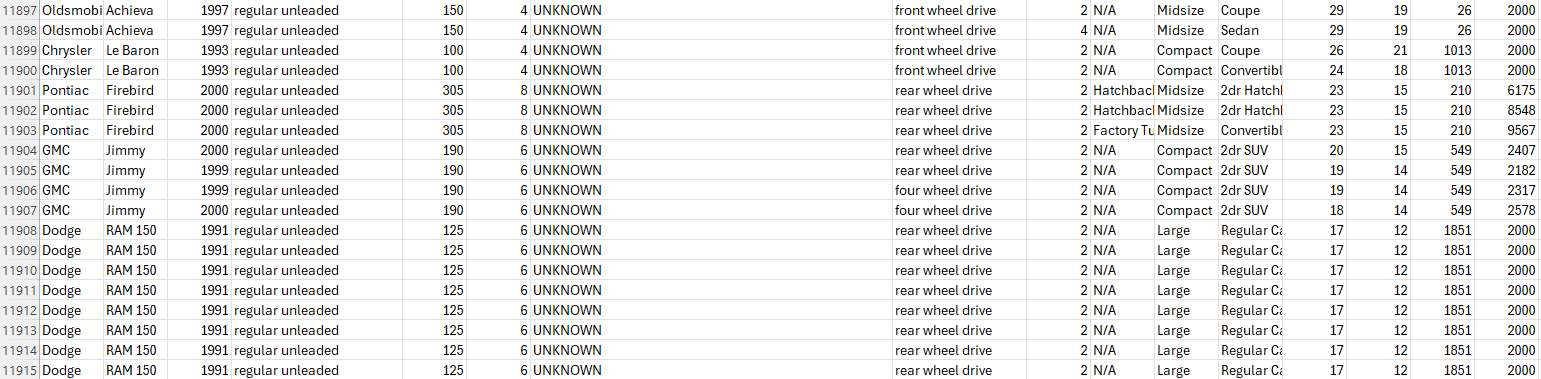

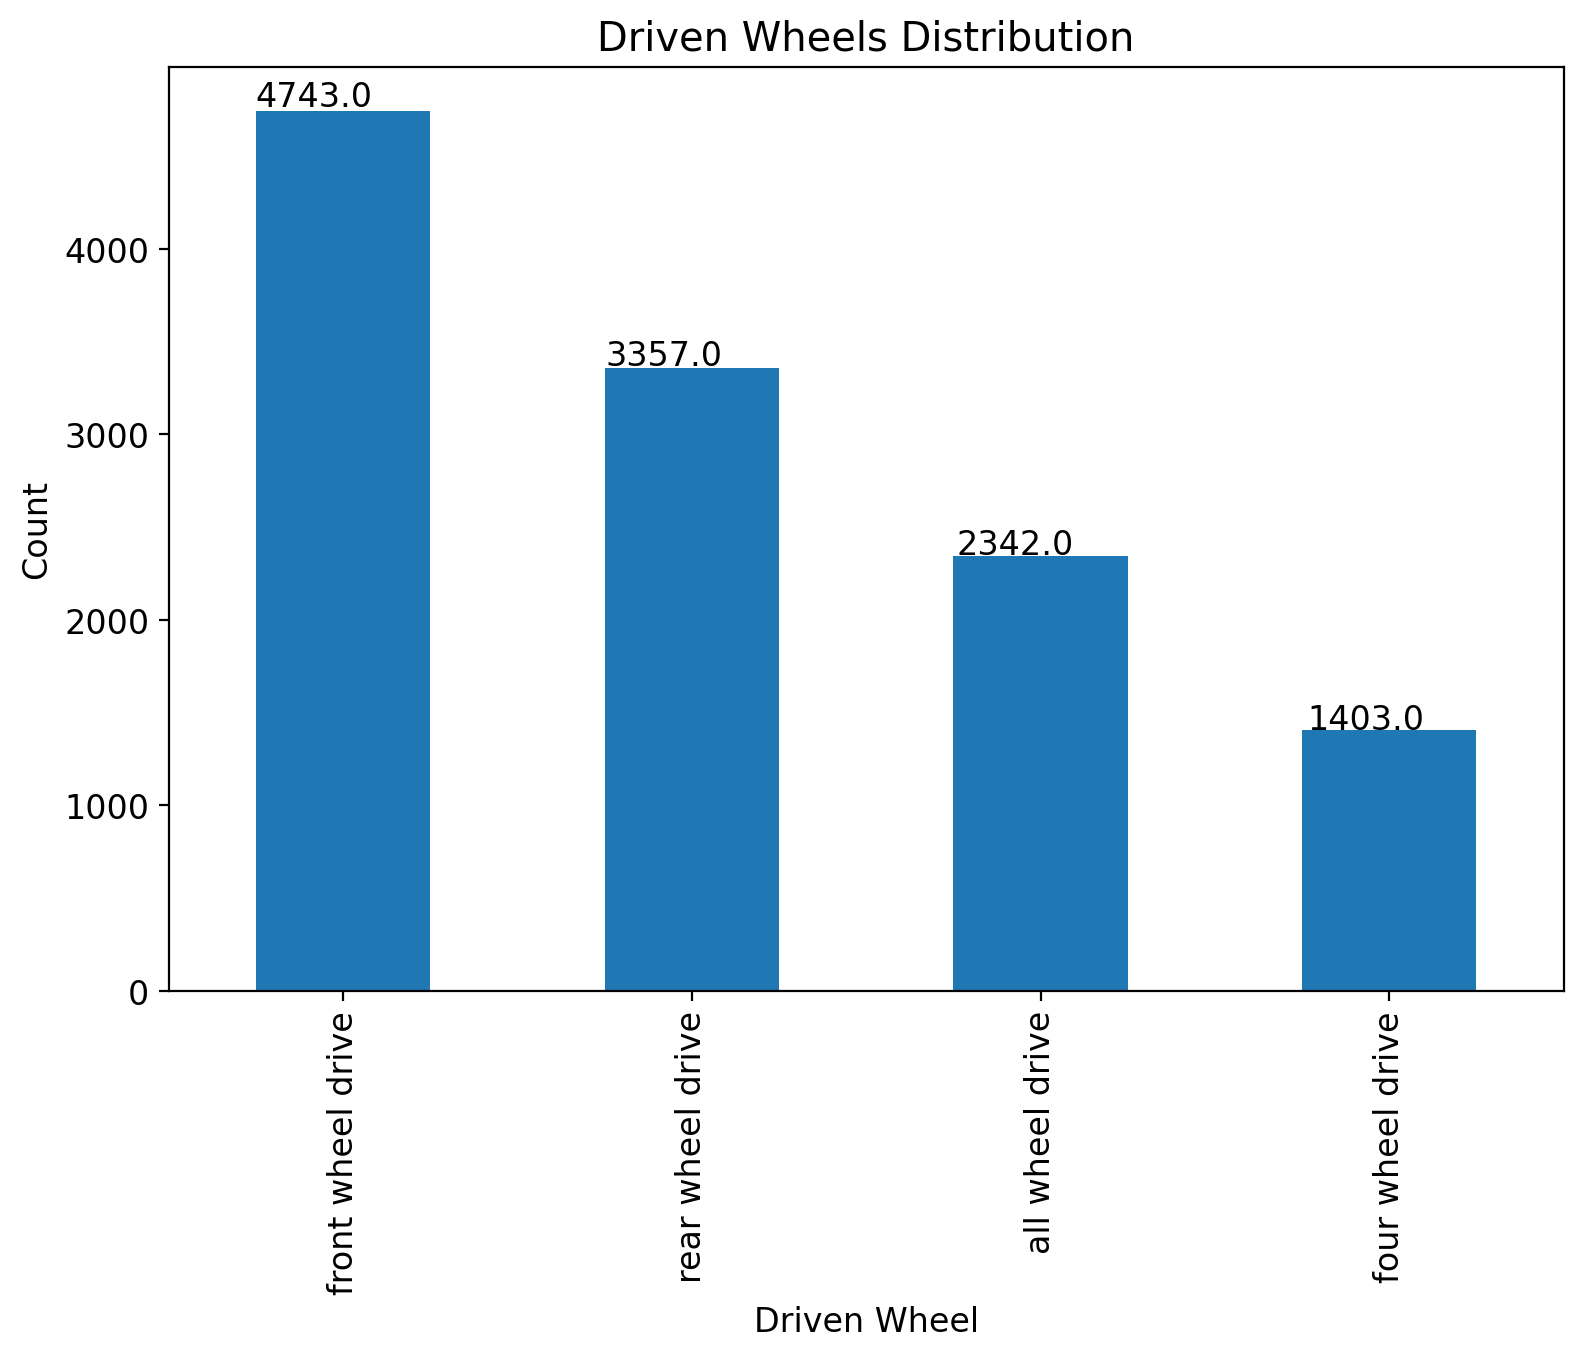

In [49]:
ax=df_abt_initial['Driven_Wheels'].value_counts().plot(kind='bar')
plt.title('Driven Wheels Distribution')
plt.xlabel('Driven Wheel')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

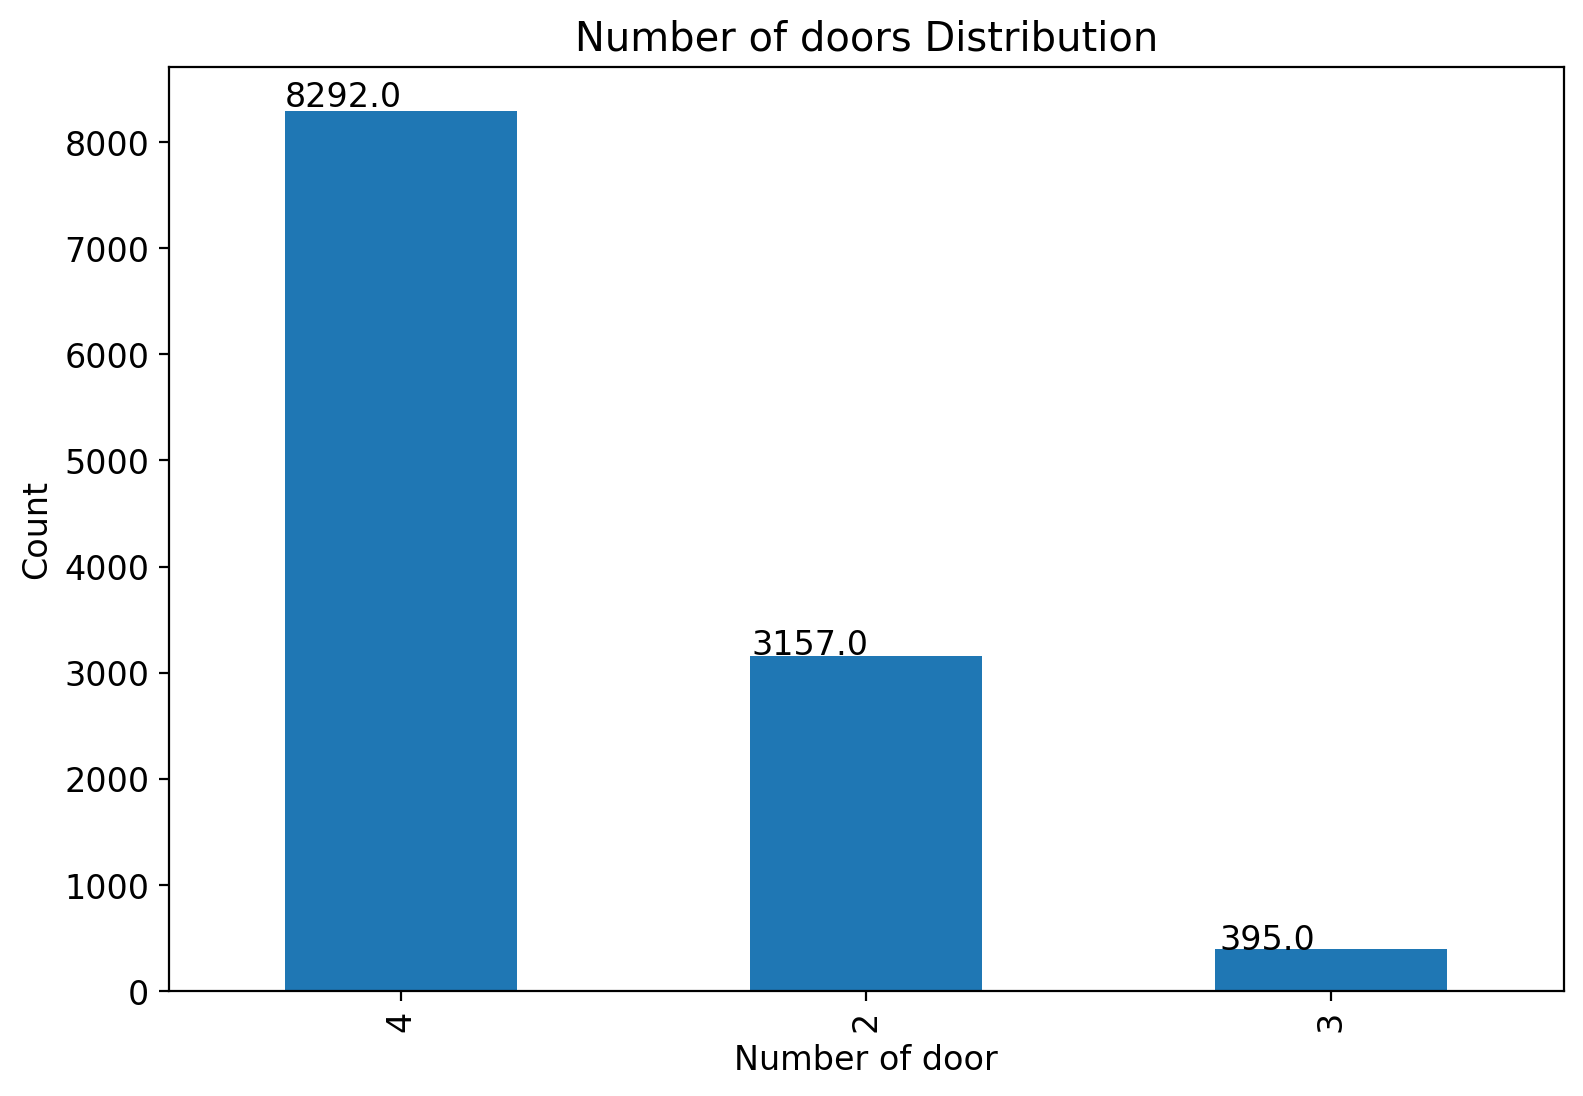

In [50]:
ax=df_abt_initial['Number of Doors'].value_counts().plot(kind='bar')
plt.title('Number of doors Distribution')
plt.xlabel('Number of door')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

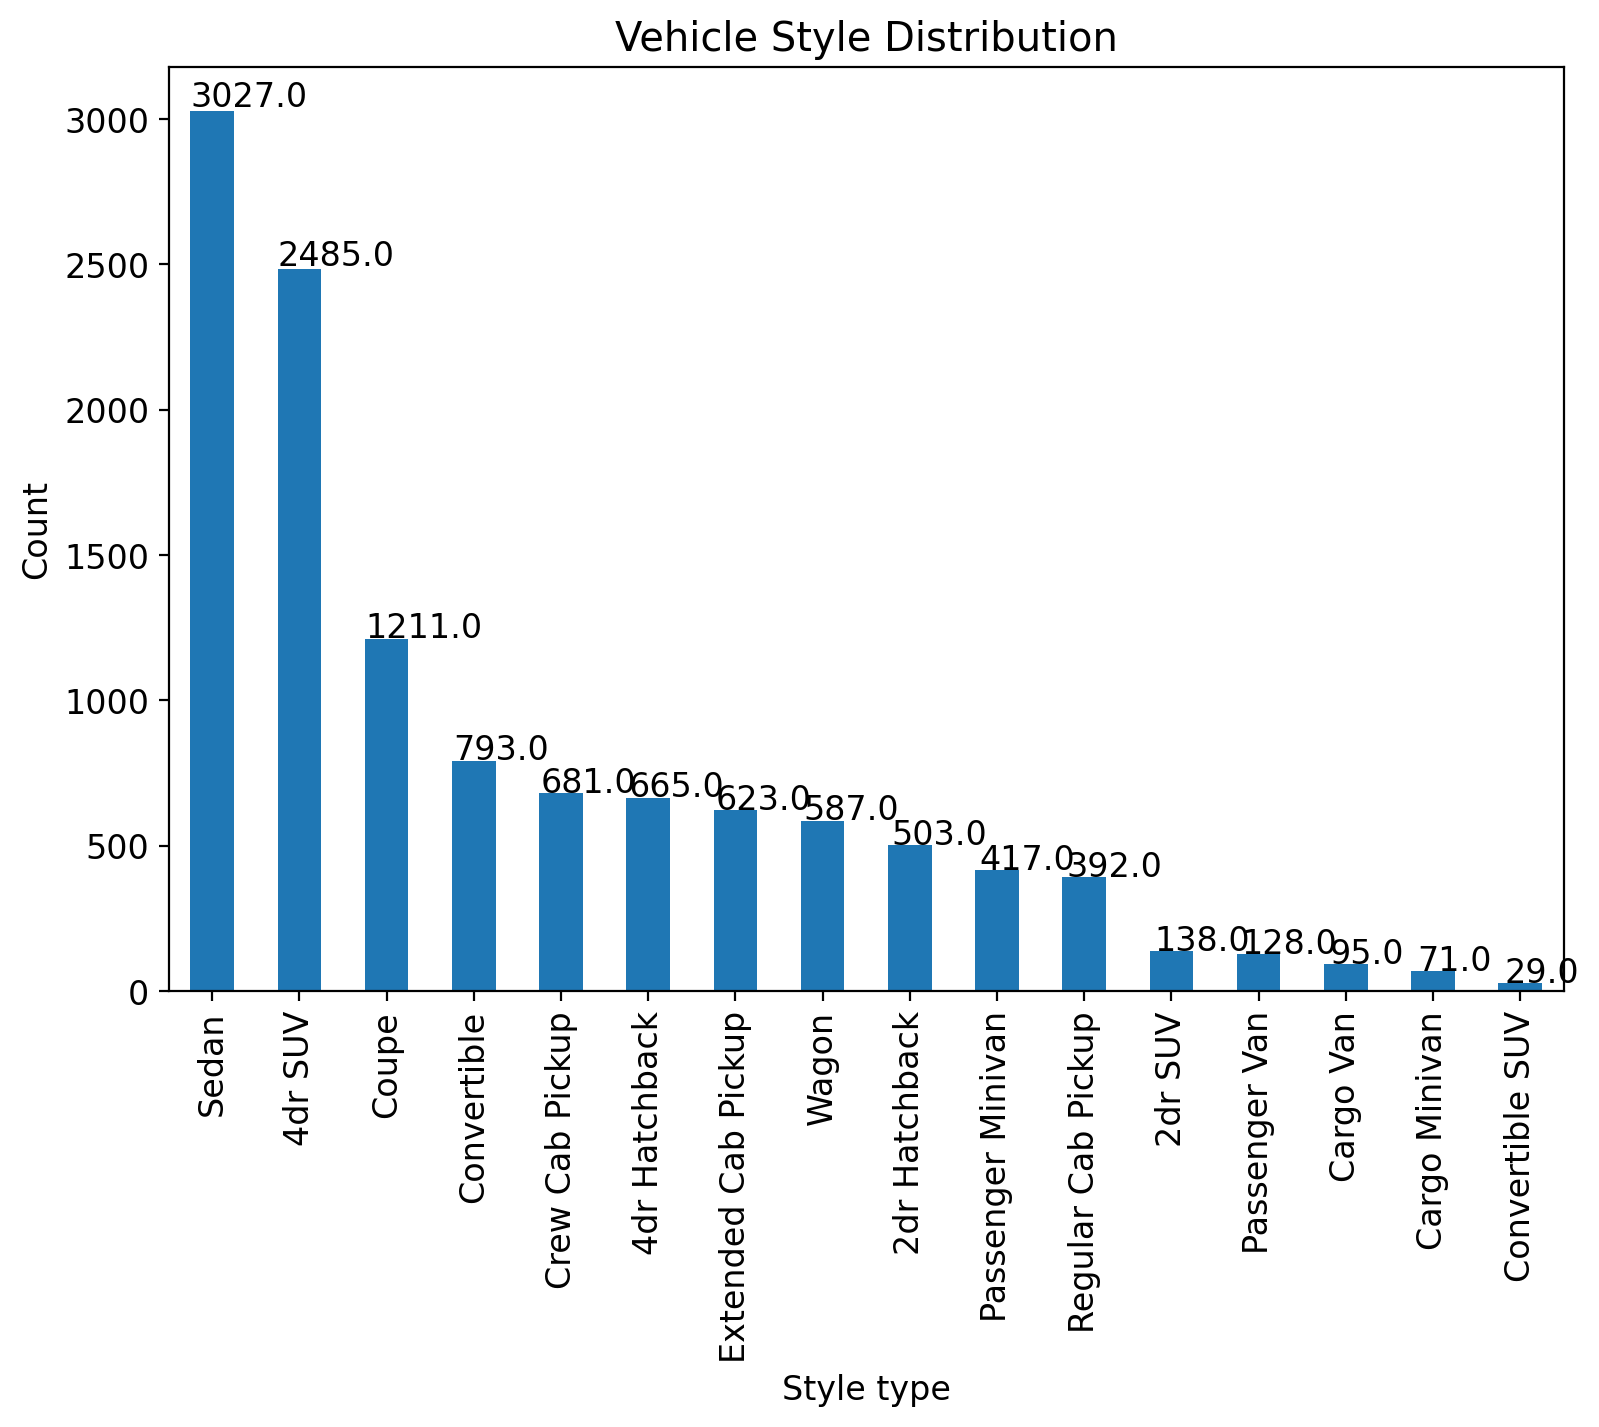

In [51]:
ax=df_abt_initial['Vehicle Style'].value_counts().plot(kind='bar')
plt.title('Vehicle Style Distribution')
plt.xlabel('Style type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

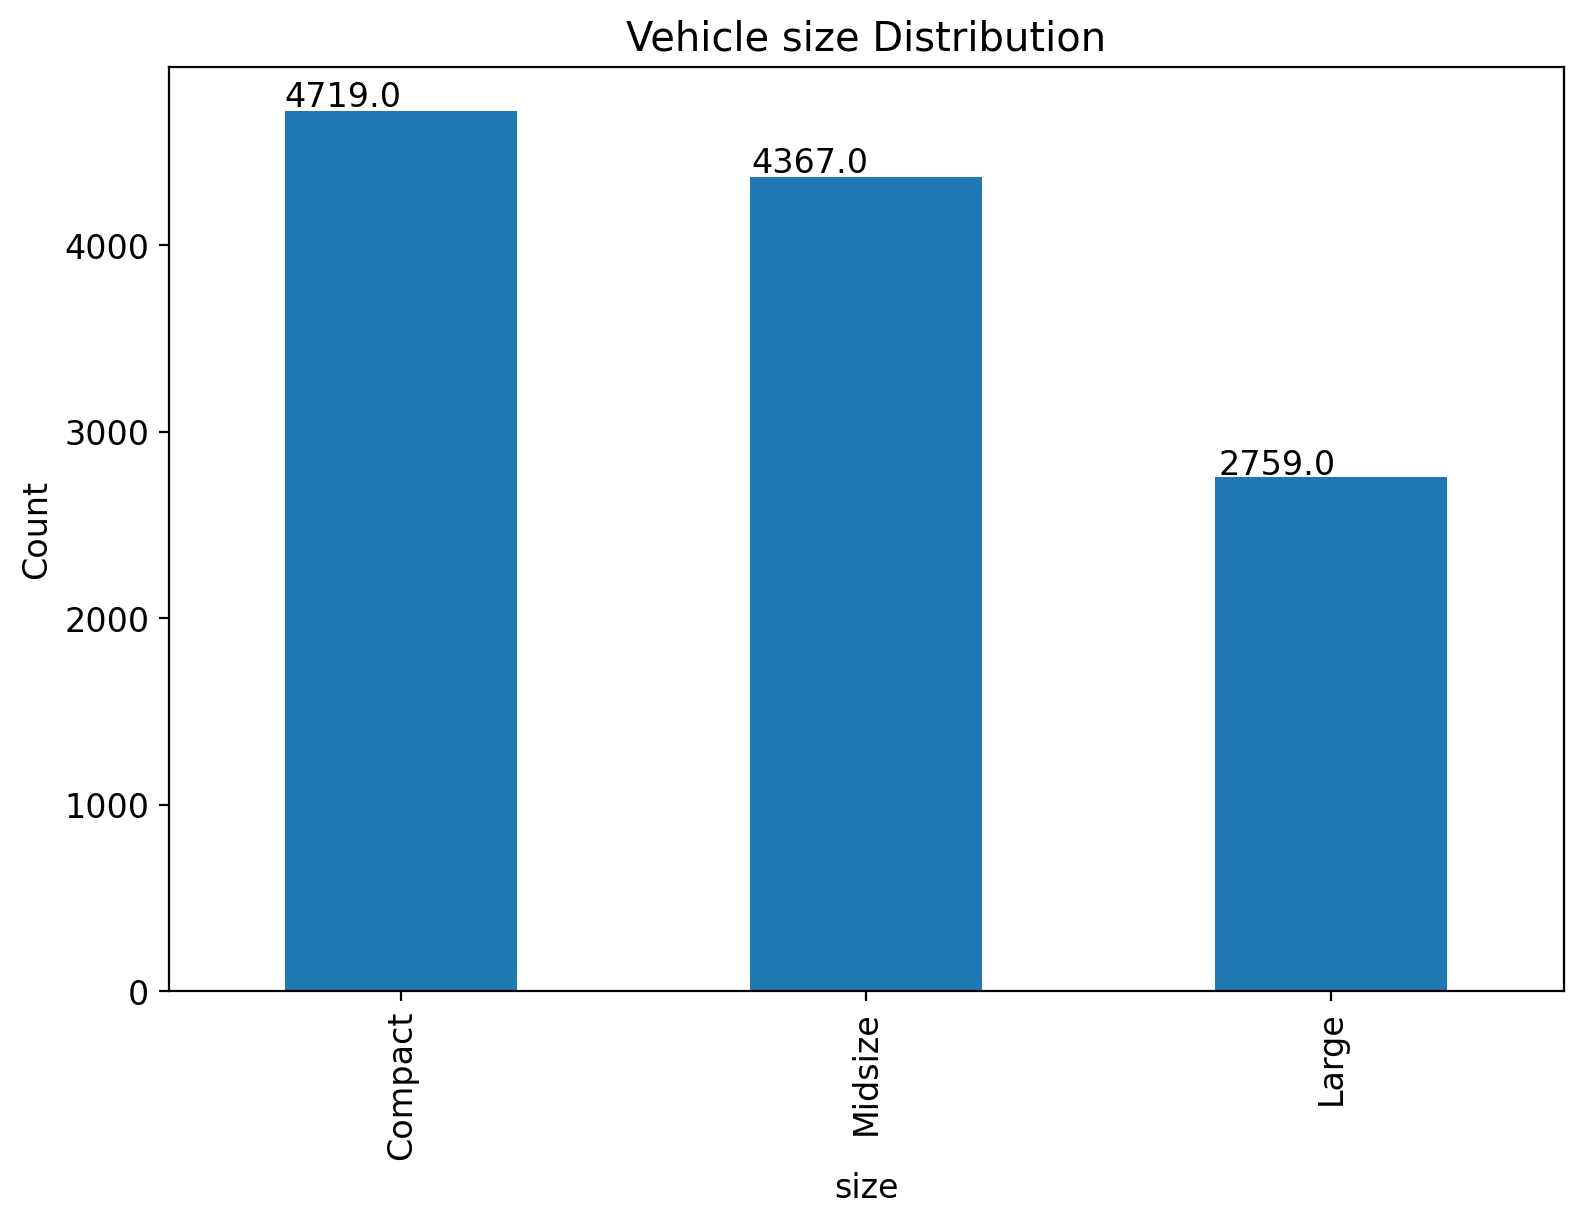

In [52]:
ax=df_abt_initial['Vehicle Size'].value_counts().plot(kind='bar')
plt.title('Vehicle size Distribution')
plt.xlabel('size')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

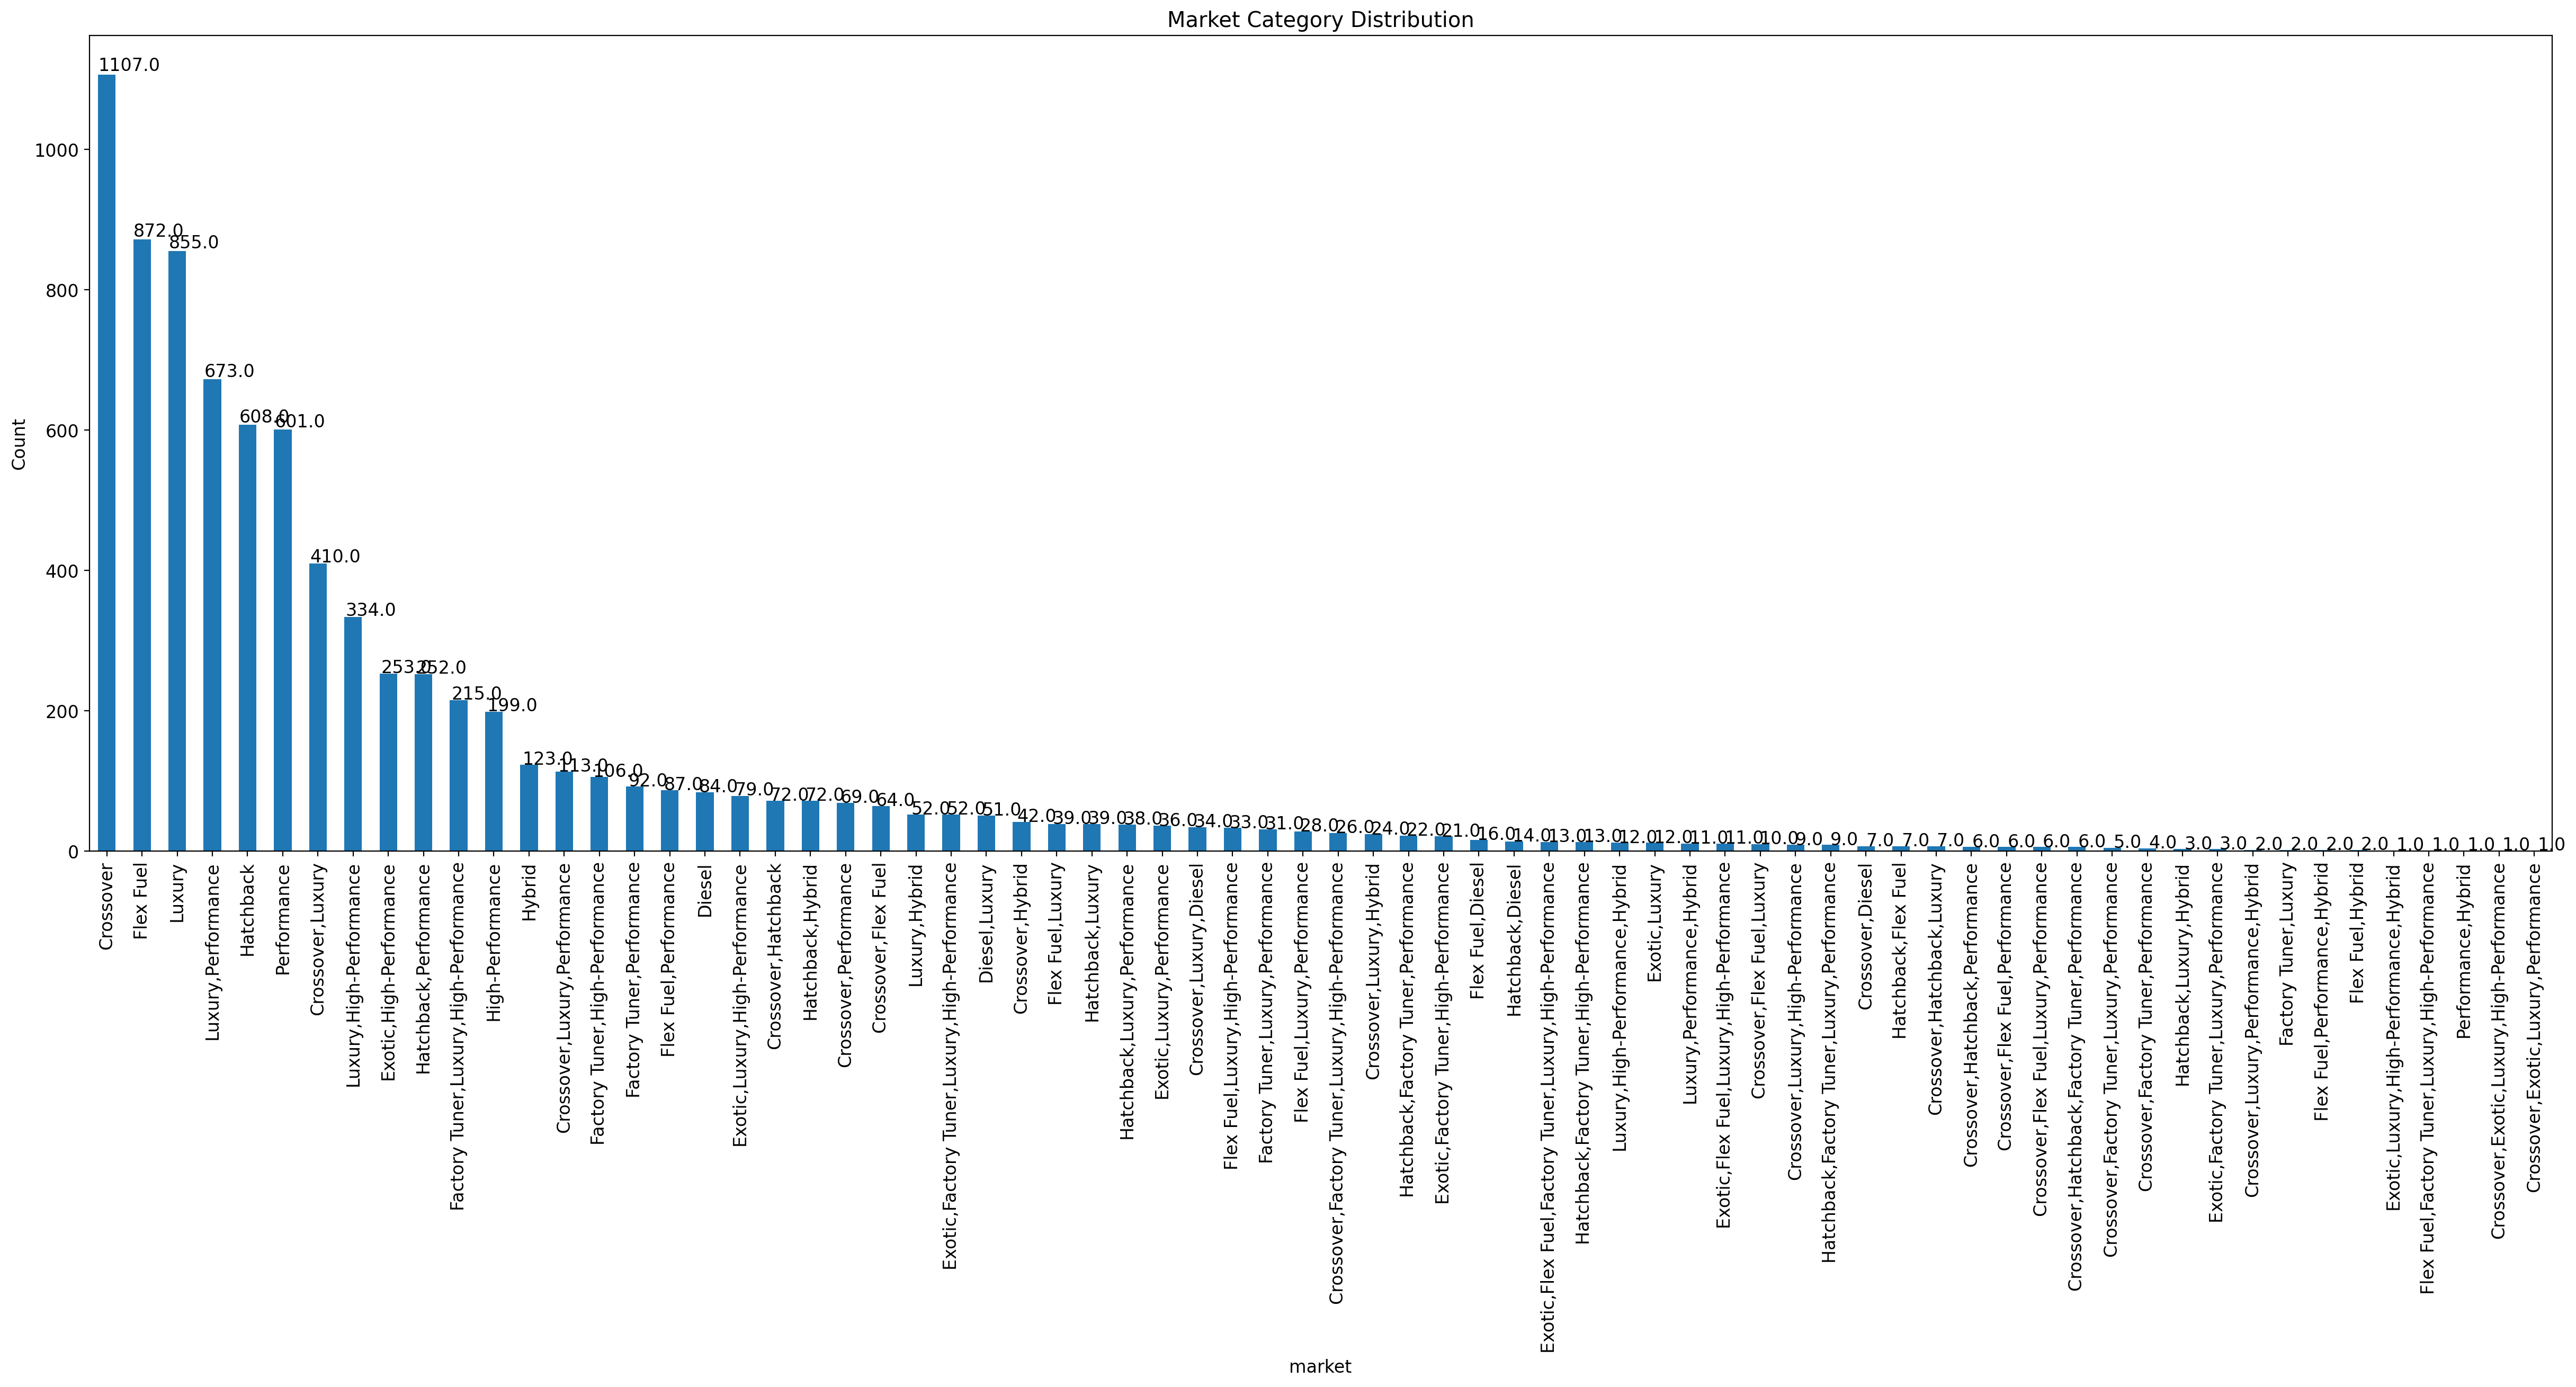

In [53]:
#bar plot for market category with high number of unique values
ax=df_abt_initial['Market Category'].value_counts().plot(kind='bar',figsize=(30,10))
plt.title('Market Category Distribution')
plt.xlabel('market')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [54]:
df_abt_initial['Market Category'].value_counts()

Market Category
Crossover                                          1107
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           608
                                                   ... 
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Crossover,Exotic,Luxury,High-Performance              1
Crossover,Exotic,Luxury,Performance                   1
Name: count, Length: 70, dtype: Int64

In [55]:
df_abt_initial['Market Category'].unique()

<StringArray>
[                 'Factory Tuner,Luxury,High-Performance',
                                     'Luxury,Performance',
                                'Luxury,High-Performance',
                                                 'Luxury',
                                            'Performance',
                                              'Flex Fuel',
                                  'Flex Fuel,Performance',
                                                     <NA>,
                                              'Hatchback',
                           'Hatchback,Luxury,Performance',
                                       'Hatchback,Luxury',
                         'Luxury,High-Performance,Hybrid',
                                          'Diesel,Luxury',
                                  'Hatchback,Performance',
                    'Hatchback,Factory Tuner,Performance',
                                       'High-Performance',
                         'Factory Tuner,Hi

##Observation 10

- **Data Quality Issue:** Comma Seperated values in the column market category.
- **Data Quality Plan:** convert the market category column into a list of strings. This allows it to easily be encoded for regression tasks.

#__3. Data Preparation__

##3a. Implement the steps outlined in your data quality plan to preprocess the dataset. [0.75]

##Eliminate duplicate values

In [56]:
#Dropping duplicates
df_unique = df_abt_initial.drop_duplicates()

In [57]:
df_unique.duplicated().sum()

0

In [58]:
#Size of the dataset after dropping duplicate values
df_unique.shape

(6224, 11)

In [59]:
df_unique.head()

Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  2011  premium unleaded (required)        335                 6   
1  2011  premium unleaded (required)        300                 6   
2  2011  premium unleaded (required)        300                 6   
3  2011  premium unleaded (required)        230                 6   
4  2011  premium unleaded (required)        230                 6   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive                2   
1            MANUAL  rear wheel drive                2   
2            MANUAL  rear wheel drive                2   
3            MANUAL  rear wheel drive                2   
4            MANUAL  rear wheel drive                2   

                         Market Category Vehicle Size Vehicle Style   mpg  
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe  22.5  
1                     Luxury,Performance      Compact   Convertible  23.5  
2                Luxury,High-Performance      Compact         Coupe  24.0  
3                     Luxury,Performance      Compact         Coupe  23.0  
4                                 Luxury      Compact   Convertible  23.0

In [60]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6224 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6224 non-null   Int64  
 1   Engine Fuel Type   6224 non-null   string 
 2   Engine HP          6212 non-null   Int64  
 3   Engine Cylinders   6215 non-null   Int64  
 4   Transmission Type  6224 non-null   string 
 5   Driven_Wheels      6224 non-null   string 
 6   Number of Doors    6223 non-null   Int64  
 7   Market Category    4452 non-null   string 
 8   Vehicle Size       6224 non-null   string 
 9   Vehicle Style      6224 non-null   string 
 10  mpg                6224 non-null   Float64
dtypes: Float64(1), Int64(4), string(6)
memory usage: 613.9 KB


In [61]:
df_unique.describe()

Year   Engine HP  Engine Cylinders  Number of Doors        mpg
count       6224.0      6212.0            6215.0           6223.0     6224.0
mean   2009.270566  259.538635          5.802253         3.339868  22.327924
std       8.071733  122.845943          1.885351         0.922606   6.001978
min         1990.0        55.0               3.0              2.0        9.5
25%         2004.0       170.0               4.0              2.0       18.5
50%         2013.0       235.0               6.0              4.0       21.5
75%         2016.0       315.0               6.0              4.0       25.5
max         2017.0      1001.0              16.0              4.0      189.0

##Handling missing values

In [62]:
df_unique.isna().sum()  #number of missing values

Year                    0
Engine Fuel Type        0
Engine HP              12
Engine Cylinders        9
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      1772
Vehicle Size            0
Vehicle Style           0
mpg                     0
dtype: int64

In [63]:
# Records with missing values
df_unique[df_unique.isna().any(axis=1)]

Year                Engine Fuel Type  Engine HP  Engine Cylinders  \
87     1996                regular unleaded        115                 4   
91     1997                regular unleaded        115                 4   
93     1998                regular unleaded        115                 4   
203    2015                regular unleaded        300                 6   
204    2015                regular unleaded        292                 6   
...     ...                             ...        ...               ...   
11794  1991                regular unleaded        145                 6   
11809  2017                regular unleaded        106                 4   
11810  2017                regular unleaded        106                 4   
11867  2015  premium unleaded (recommended)        420                 8   
11868  2015  premium unleaded (recommended)        420                 8   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
87               MANUAL  front wheel drive                2            <NA>   
91               MANUAL  front wheel drive                2            <NA>   
93               MANUAL  front wheel drive                2            <NA>   
203           AUTOMATIC    all wheel drive                4            <NA>   
204           AUTOMATIC   rear wheel drive                4            <NA>   
...                 ...                ...              ...             ...   
11794            MANUAL    all wheel drive                2            <NA>   
11809            MANUAL  front wheel drive                4            <NA>   
11810         AUTOMATIC  front wheel drive                4            <NA>   
11867         AUTOMATIC   rear wheel drive                4            <NA>   
11868         AUTOMATIC   four wheel drive                4            <NA>   

      Vehicle Size Vehicle Style   mpg  
87         Compact         Coupe  31.0  
91         Compact         Coupe  30.0  
93         Compact         Coupe  30.0  
203          Large         Sedan  22.5  
204          Large         Sedan  25.0  
...            ...           ...   ...  
11794      Compact         Coupe  19.5  
11809      Compact         Sedan  34.5  
11810      Compact         Sedan  36.0  
11867        Large       4dr SUV  18.0  
11868        Large       4dr SUV  17.5  

[1791 rows x 11 columns]

Replacing number of doors with mode for 1 missing value in Number of Doors column

In [64]:
#for number of doors, replace with mode
mode_number_of_doors = df_unique['Number of Doors'].mode()[0]
print(f"\nMode of 'Number of Doors' column: {mode_number_of_doors}")

df_unique['Number of Doors'].fillna(mode_number_of_doors, inplace=True)


Mode of 'Number of Doors' column: 4


<ipython-input-64-b1b62ca3f989>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Number of Doors'].fillna(mode_number_of_doors, inplace=True)


Handling Engine HP missing values

In [65]:
#Records where engine HP has missing values
df_unique[df_unique['Engine HP'].isna()]

Year                  Engine Fuel Type  Engine HP  Engine Cylinders  \
2905  2017    premium unleaded (recommended)       <NA>                 6   
2906  2017    premium unleaded (recommended)       <NA>                 6   
4203  2017                  regular unleaded       <NA>                 4   
4204  2017                  regular unleaded       <NA>                 4   
4914  2005                  regular unleaded       <NA>                 6   
4916  2005                  regular unleaded       <NA>                 6   
4918  2005                  regular unleaded       <NA>                 6   
5825  2015  flex-fuel (unleaded/natural gas)       <NA>                 6   
5831  2016  flex-fuel (unleaded/natural gas)       <NA>                 6   
5839  2017  flex-fuel (unleaded/natural gas)       <NA>                 6   
6578  2015                            diesel       <NA>                 4   
6908  2017                  regular unleaded       <NA>                 4   

     Transmission Type      Driven_Wheels  Number of Doors  \
2905         AUTOMATIC    all wheel drive                4   
2906         AUTOMATIC  front wheel drive                4   
4203         AUTOMATIC  front wheel drive                4   
4204         AUTOMATIC    all wheel drive                4   
4914         AUTOMATIC  front wheel drive                4   
4916         AUTOMATIC  front wheel drive                4   
4918         AUTOMATIC  front wheel drive                4   
5825         AUTOMATIC  front wheel drive                4   
5831         AUTOMATIC  front wheel drive                4   
5839         AUTOMATIC  front wheel drive                4   
6578         AUTOMATIC    all wheel drive                4   
6908         AUTOMATIC  front wheel drive                4   

              Market Category Vehicle Size      Vehicle Style   mpg  
2905                   Luxury        Large              Sedan  21.0  
2906                   Luxury        Large              Sedan  22.5  
4203                Crossover      Compact            4dr SUV  26.5  
4204                Crossover      Compact            4dr SUV  25.0  
4914                     <NA>      Midsize  Passenger Minivan  19.0  
4916                     <NA>      Midsize      Cargo Minivan  19.0  
4918                     <NA>      Midsize  Passenger Minivan  18.5  
5825    Flex Fuel,Performance        Large              Sedan  21.0  
5831    Flex Fuel,Performance        Large              Sedan  21.0  
5839    Flex Fuel,Performance        Large              Sedan  21.0  
6578  Crossover,Luxury,Diesel      Midsize            4dr SUV  25.5  
6908            Luxury,Hybrid      Midsize              Sedan  39.5

In [66]:
df_unique['Engine HP'].mean()

259.5386349001932

In [67]:
df_unique['Engine HP'].median()

235.0

In [68]:
df_unique['Engine HP'].mode()

0    200
Name: Engine HP, dtype: Int64

Observing the median, mean, and mode without NA

<ipython-input-69-7bc2411d329b>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_unique['Engine HP'].dropna(), shade=True, color='blue')


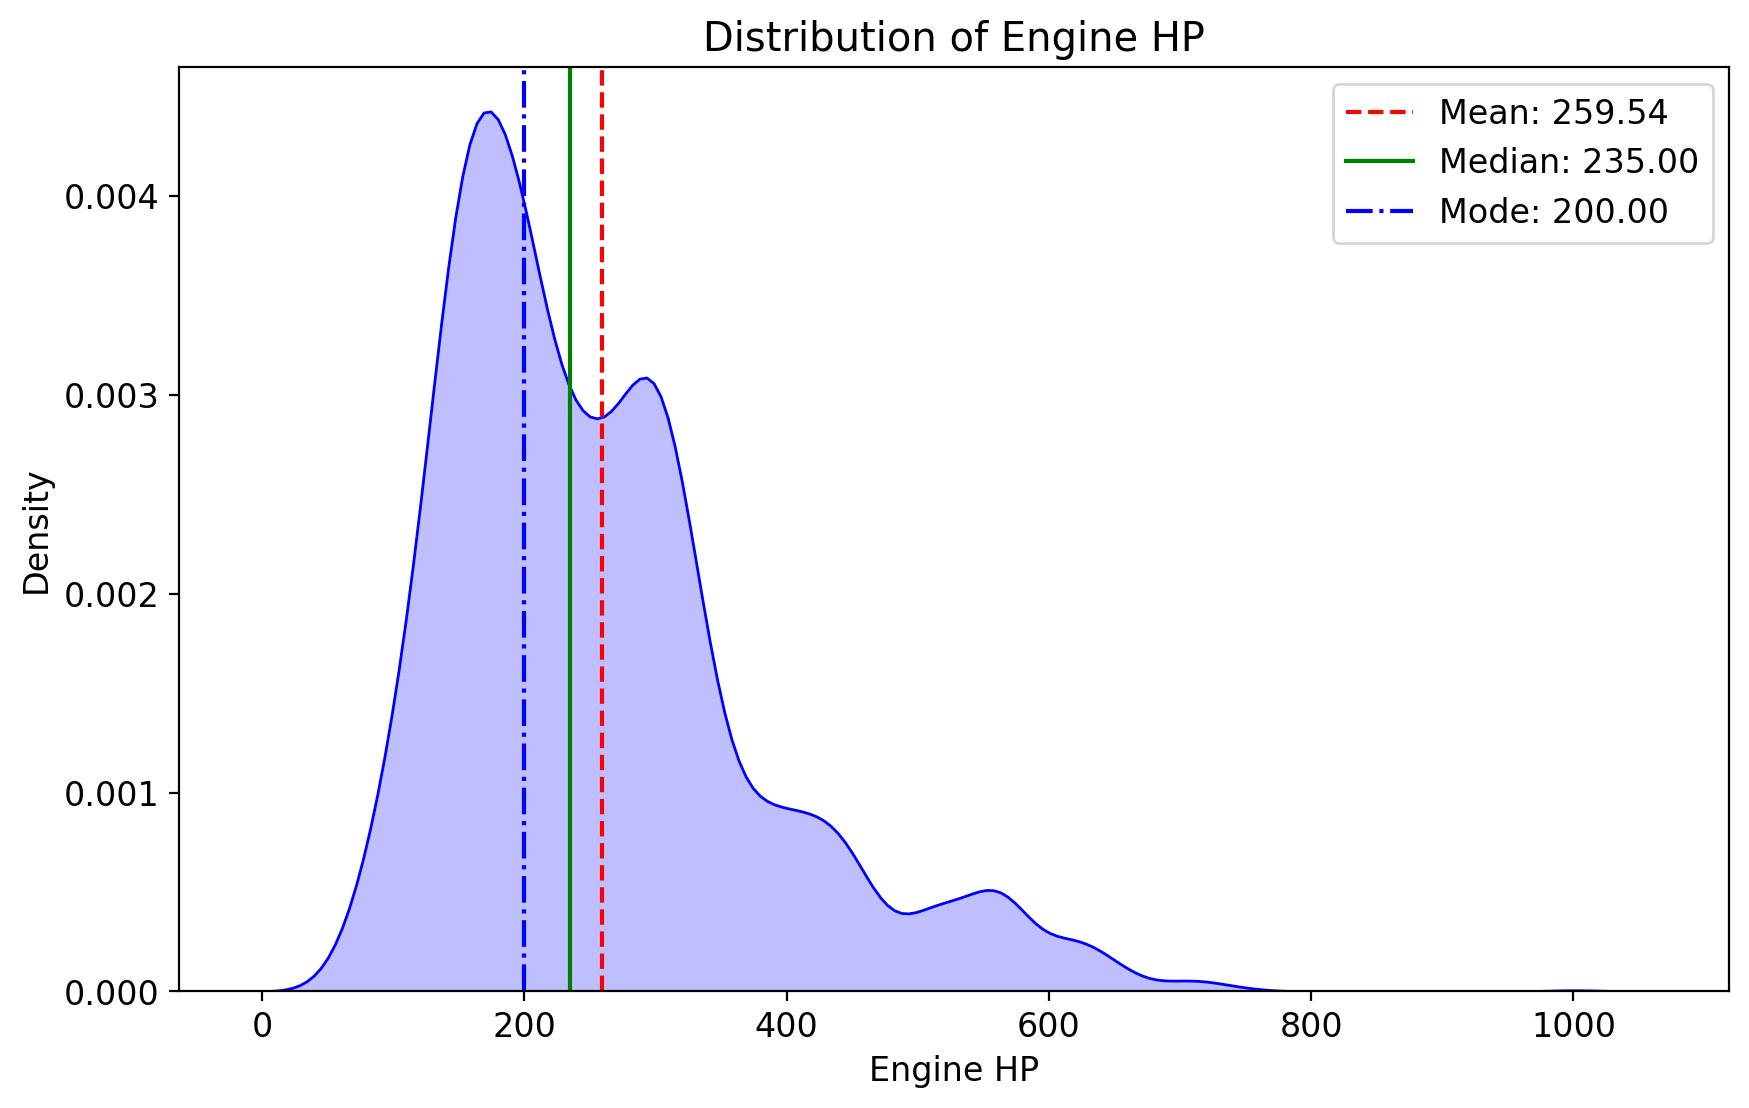

In [69]:
# Data distribution of Engine HP column
import seaborn as sns
mean_hp = df_unique['Engine HP'].dropna().mean()
median_hp = df_unique['Engine HP'].dropna().median()
mode_hp = df_unique['Engine HP'].dropna().mode()[0]

plt.figure(figsize=(10, 6))
sns.kdeplot(df_unique['Engine HP'].dropna(), shade=True, color='blue')
plt.axvline(mean_hp, color='red', linestyle='--', label=f'Mean: {mean_hp:.2f}')
plt.axvline(median_hp, color='green', linestyle='-', label=f'Median: {median_hp:.2f}')
plt.axvline(mode_hp, color='blue', linestyle='dashdot', label=f'Mode: {mode_hp:.2f}')

plt.title('Distribution of Engine HP')
plt.xlabel('Engine HP')
plt.ylabel('Density')
plt.legend()

plt.show()

From the above distribution, choosing median is more appropriate to replace the missing values in Engine HP column as mean has a decimal value, and the mode value is biased.

In [70]:
#Replacing with median
df_unique['Engine HP'].fillna(median_hp, inplace=True)

<ipython-input-70-48eec98e6f4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Engine HP'].fillna(median_hp, inplace=True)


In [71]:
df_unique.isna().sum()  #number of missing values

Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        9
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      1772
Vehicle Size            0
Vehicle Style           0
mpg                     0
dtype: int64

__Handling missing records in engine cylinders__

In [72]:
#Records with null values in engine cylinders column
df_unique[df_unique['Engine Cylinders'].isna()]

Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
8695  1993             regular unleaded        255              <NA>   
8696  1994             regular unleaded        255              <NA>   
8697  1995             regular unleaded        255              <NA>   
8698  2009  premium unleaded (required)        232              <NA>   
8699  2009  premium unleaded (required)        212              <NA>   
8705  2010  premium unleaded (required)        232              <NA>   
8706  2010  premium unleaded (required)        212              <NA>   
8710  2011  premium unleaded (required)        212              <NA>   
8711  2011  premium unleaded (required)        232              <NA>   

     Transmission Type     Driven_Wheels  Number of Doors  \
8695            MANUAL  rear wheel drive                2   
8696            MANUAL  rear wheel drive                2   
8697            MANUAL  rear wheel drive                2   
8698            MANUAL  rear wheel drive                4   
8699         AUTOMATIC  rear wheel drive                4   
8705            MANUAL  rear wheel drive                4   
8706         AUTOMATIC  rear wheel drive                4   
8710         AUTOMATIC  rear wheel drive                4   
8711            MANUAL  rear wheel drive                4   

                Market Category Vehicle Size Vehicle Style   mpg  
8695  Factory Tuner,Performance      Compact         Coupe  19.0  
8696  Factory Tuner,Performance      Compact         Coupe  19.0  
8697  Factory Tuner,Performance      Compact         Coupe  19.0  
8698                Performance      Compact         Coupe  19.0  
8699                Performance      Compact         Coupe  19.5  
8705                Performance      Compact         Coupe  19.0  
8706                Performance      Compact         Coupe  19.5  
8710                Performance      Compact         Coupe  19.5  
8711                Performance      Compact         Coupe  19.0

In [73]:
#Creating a new dataframe to handle missing information
df_enginemissing = df_unique[(df_unique['Vehicle Size'] == 'Compact') & (df_unique['Vehicle Style'] == 'Coupe') & (df_unique['mpg'] >= 19) & (df_unique['mpg'] <= 19.5) & (df_unique['Driven_Wheels'] == 'rear wheel drive')]['Engine Cylinders']
df_enginemissing

240         6
243         6
244         6
247         6
248         6
604         8
703         8
1009        4
1010        4
1012        4
1429        8
1430        8
1431        8
1525        6
3090        6
6753        6
7259        6
7260        6
7261        6
7262        6
8695     <NA>
8696     <NA>
8697     <NA>
8698     <NA>
8699     <NA>
8705     <NA>
8706     <NA>
8710     <NA>
8711     <NA>
10096       6
10097       6
10099       6
10100       6
11892       6
Name: Engine Cylinders, dtype: Int64

In [74]:
df_enginemissing.mean()

6.16

In [75]:
df_enginemissing.mode()

0    6
Name: Engine Cylinders, dtype: Int64

In [76]:
df_enginemissing.median()

6.0

Observing data records with similar charateristics in other columns, it can be seen that other records have the value around 6 for the column Engine Cylinders. Hence, replacing with mode = median = approx. mean = 6.0

In [77]:
#Replacing the dataset with mode of similarly spec'd vehicles
df_unique['Engine Cylinders'].fillna(df_enginemissing.mode()[0], inplace=True)

<ipython-input-77-f35833a6a5fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Engine Cylinders'].fillna(df_enginemissing.mode()[0], inplace=True)


In [78]:
df_unique.isna().sum()  #number of missing values

Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      1772
Vehicle Size            0
Vehicle Style           0
mpg                     0
dtype: int64

Handling missing values in market category

In [79]:
#Records with missing values in column market category
df_missing_market = df_unique[df_unique['Market Category'].isna()]
df_missing_market

Year                Engine Fuel Type  Engine HP  Engine Cylinders  \
87     1996                regular unleaded        115                 4   
91     1997                regular unleaded        115                 4   
93     1998                regular unleaded        115                 4   
203    2015                regular unleaded        300                 6   
204    2015                regular unleaded        292                 6   
...     ...                             ...        ...               ...   
11794  1991                regular unleaded        145                 6   
11809  2017                regular unleaded        106                 4   
11810  2017                regular unleaded        106                 4   
11867  2015  premium unleaded (recommended)        420                 8   
11868  2015  premium unleaded (recommended)        420                 8   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
87               MANUAL  front wheel drive                2            <NA>   
91               MANUAL  front wheel drive                2            <NA>   
93               MANUAL  front wheel drive                2            <NA>   
203           AUTOMATIC    all wheel drive                4            <NA>   
204           AUTOMATIC   rear wheel drive                4            <NA>   
...                 ...                ...              ...             ...   
11794            MANUAL    all wheel drive                2            <NA>   
11809            MANUAL  front wheel drive                4            <NA>   
11810         AUTOMATIC  front wheel drive                4            <NA>   
11867         AUTOMATIC   rear wheel drive                4            <NA>   
11868         AUTOMATIC   four wheel drive                4            <NA>   

      Vehicle Size Vehicle Style   mpg  
87         Compact         Coupe  31.0  
91         Compact         Coupe  30.0  
93         Compact         Coupe  30.0  
203          Large         Sedan  22.5  
204          Large         Sedan  25.0  
...            ...           ...   ...  
11794      Compact         Coupe  19.5  
11809      Compact         Sedan  34.5  
11810      Compact         Sedan  36.0  
11867        Large       4dr SUV  18.0  
11868        Large       4dr SUV  17.5  

[1772 rows x 11 columns]

In [80]:
df_missing_market.nunique()

Year                  28
Engine Fuel Type       5
Engine HP            151
Engine Cylinders       5
Transmission Type      4
Driven_Wheels          4
Number of Doors        3
Market Category        0
Vehicle Size           3
Vehicle Style         14
mpg                   53
dtype: int64

In [81]:
df_missing_market.describe()

Year   Engine HP  Engine Cylinders  Number of Doors        mpg
count       1772.0      1772.0            1772.0           1772.0     1772.0
mean   2005.056998  182.979684           5.26693         3.412528  22.286117
std       8.675375   65.023643          1.352318         0.866414   5.699661
min         1990.0        66.0               3.0              2.0       11.5
25%         1997.0       140.0               4.0              2.0       17.5
50%         2005.0       170.0               6.0              4.0       21.5
75%         2015.0       205.0               6.0              4.0       26.5
max         2017.0       450.0               8.0              4.0       38.5

Since, there is a lack of pattern and high variations in the values in other columns to fill the market category. We can choose a unknown category for now, before the market category string values are simplified.

In [82]:
#Replacing with a new value due to a high number of unknowns
df_unique['Market Category'].fillna('Unknown', inplace=True)

<ipython-input-82-010e761de420>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Market Category'].fillna('Unknown', inplace=True)


In [83]:
df_unique.isna().sum()  #number of missing values

Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
mpg                  0
dtype: int64

##Handling Observations

Observation 1 was handled by Eliminating duplicate values section.

Observation 2 was handled by replacing missing values.

Observation 3 and 4 is handled below

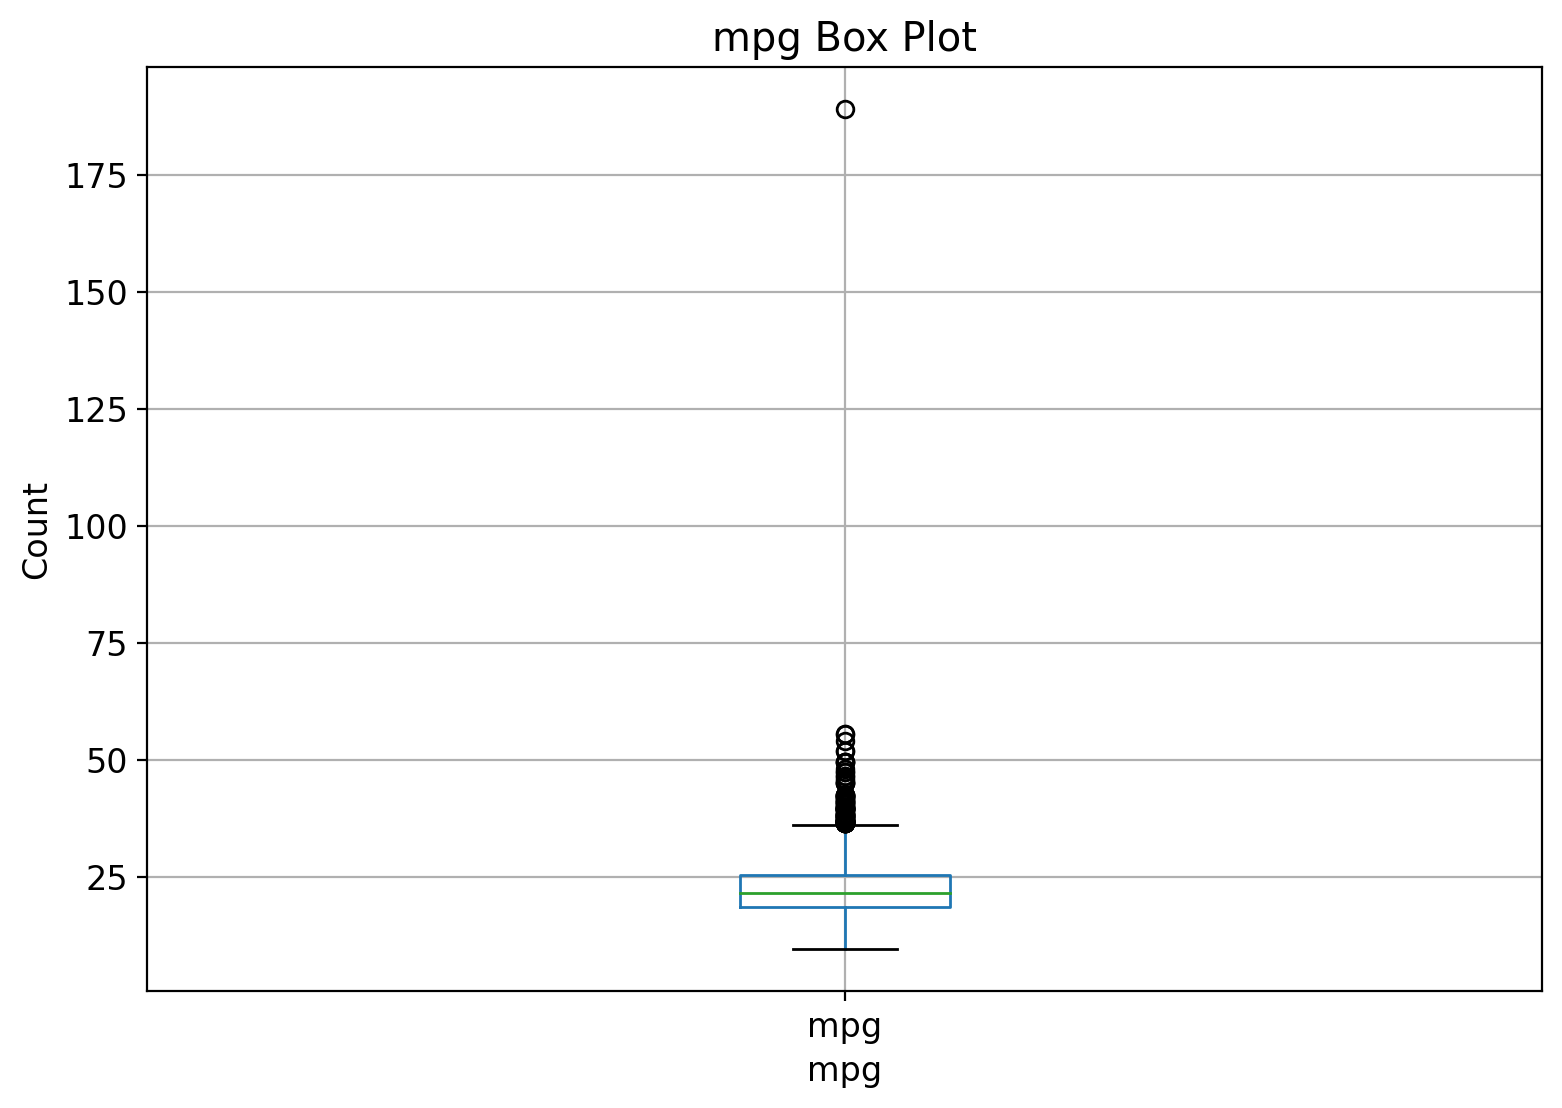

In [84]:
df_unique.boxplot(column=['mpg'])
plt.title('mpg Box Plot')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()

In this observation the extremely high value is due to an incorrect record in the dataset in the highway MPG column as shown in the observation. To handle this we can replace the mpg value of this record with the city mpg.

In [85]:
value_to_replace  = dataset.loc[dataset['highway MPG'] == dataset['highway MPG'].max(), 'city mpg']
df_unique.loc[df_unique['mpg']== df_unique['mpg'].max(), 'mpg'] = value_to_replace

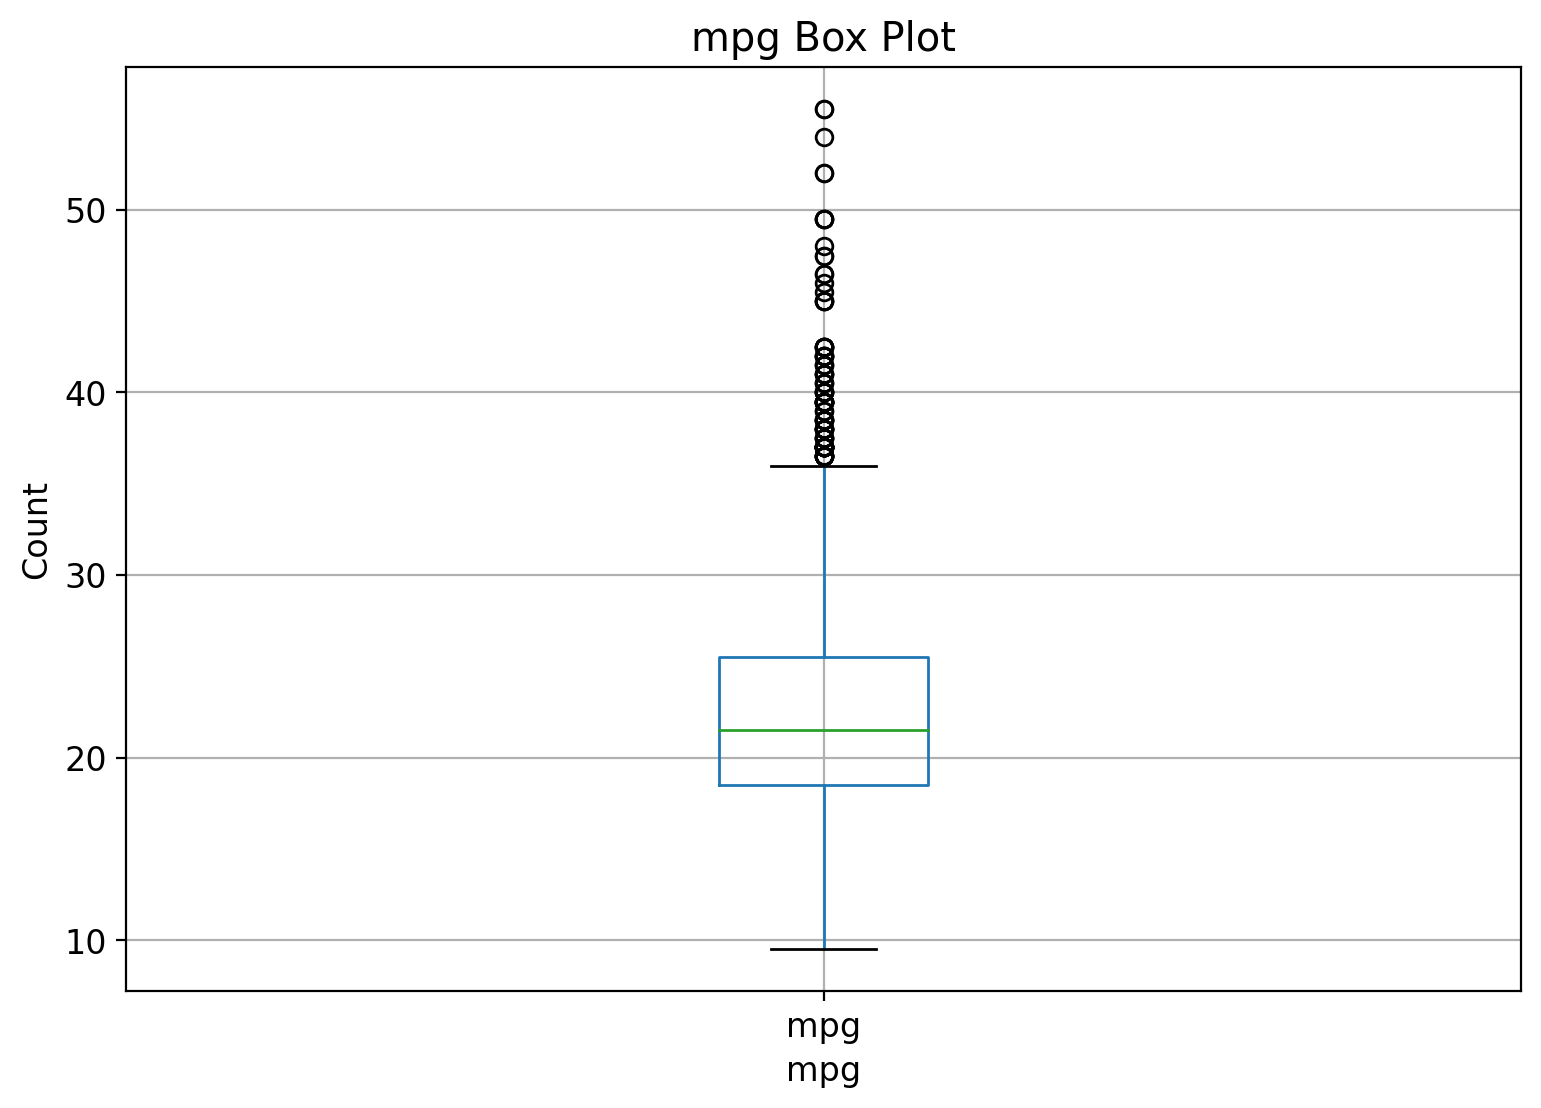

In [86]:
df_unique.boxplot(column=['mpg'])
plt.title('mpg Box Plot')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()

Handling observation 5:

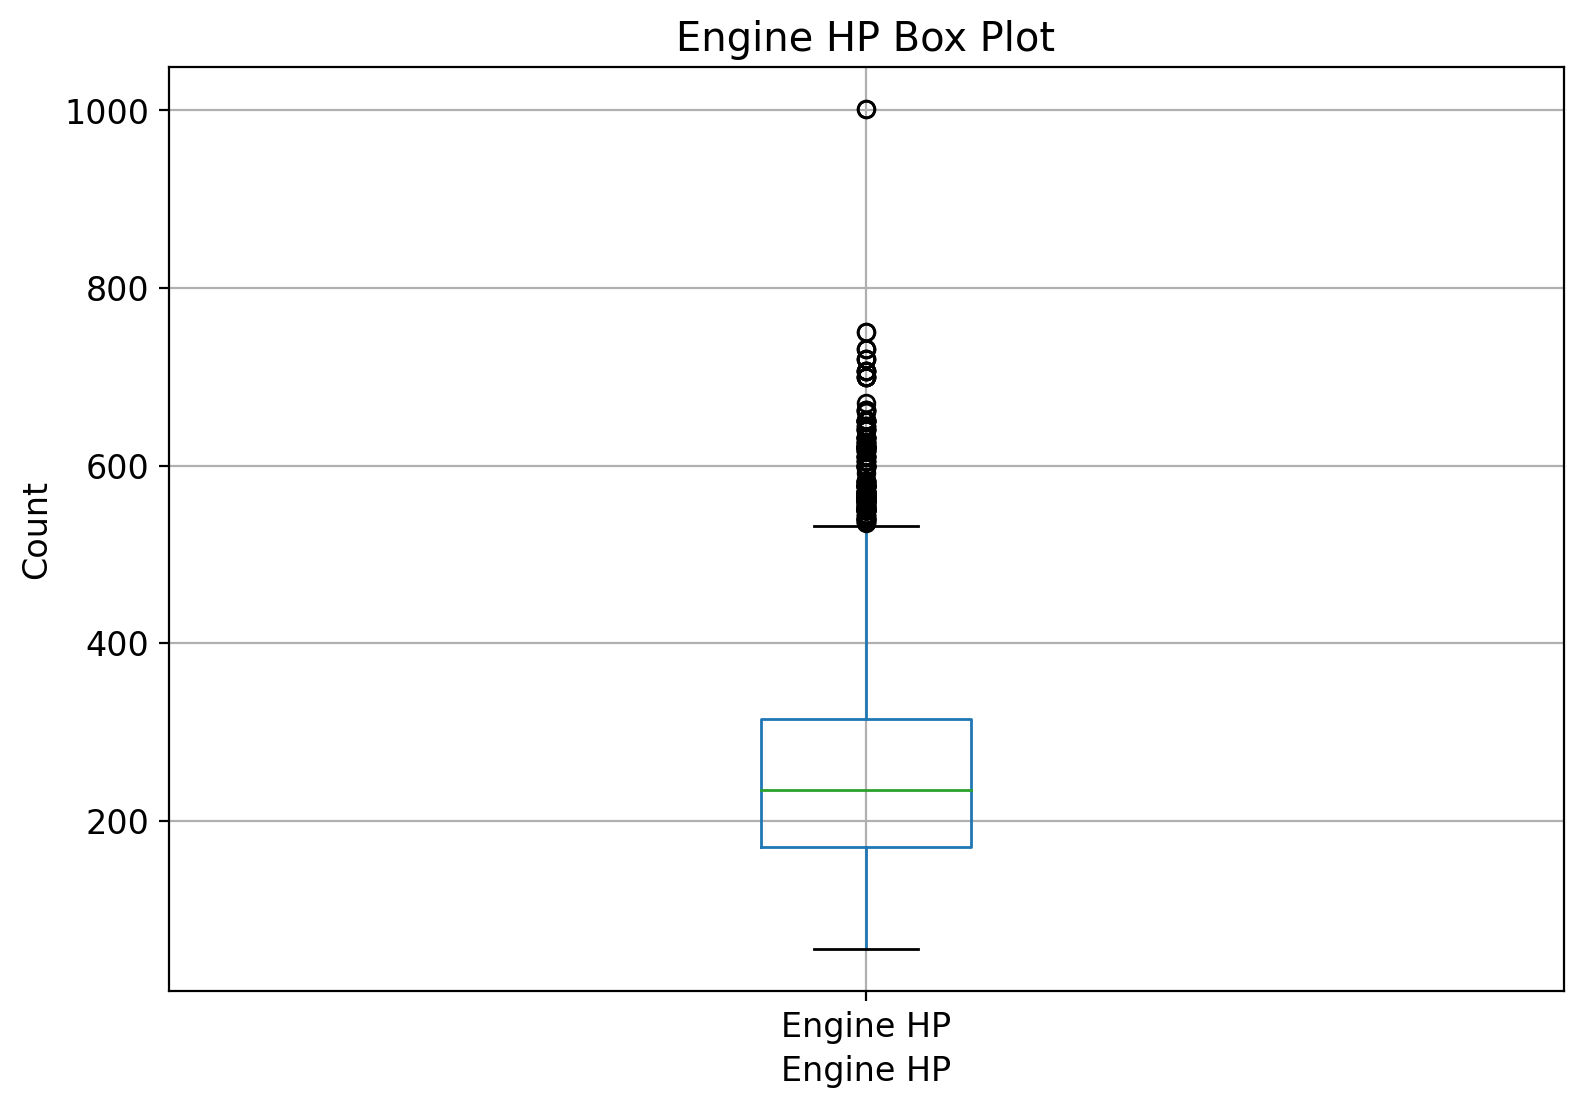

In [87]:
import matplotlib.pyplot as plt
df_unique.boxplot(column=['Engine HP'])
plt.title('Engine HP Box Plot')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()

In [88]:
df_unique = df_unique.drop(df_unique.loc[df_unique['Engine HP'] == df_unique['Engine HP'].max()].index)

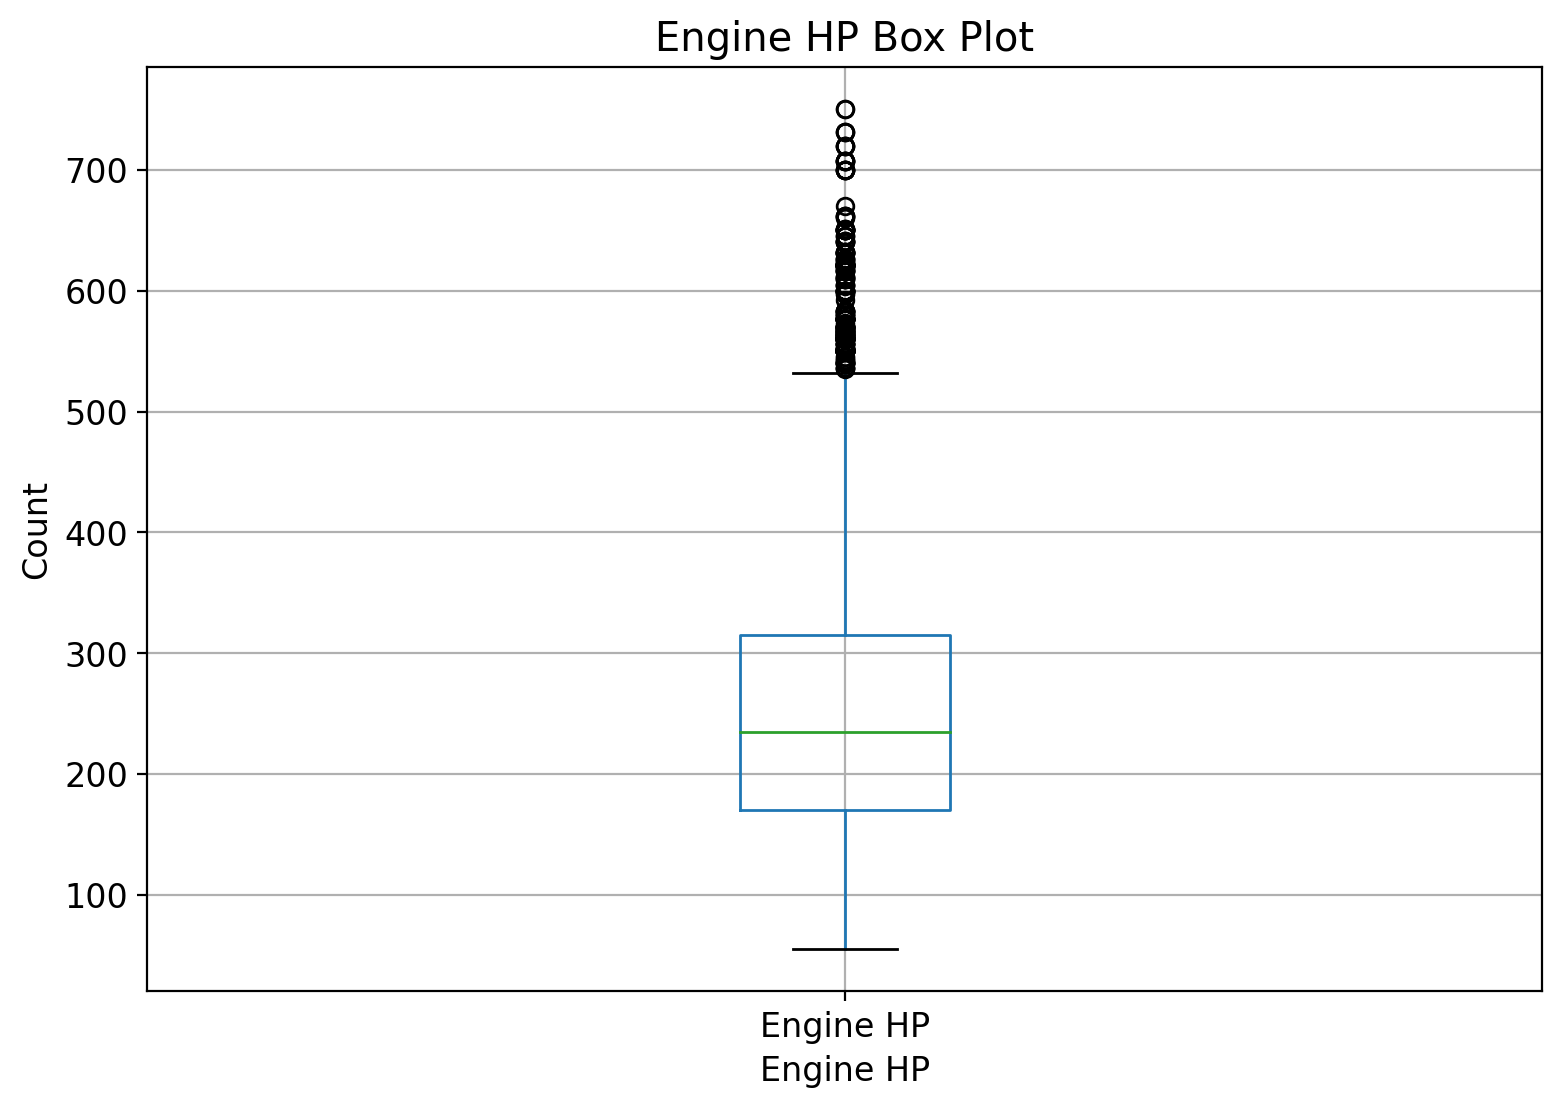

In [89]:
df_unique.boxplot(column=['Engine HP'])
plt.title('Engine HP Box Plot')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()

Handling observation 7:

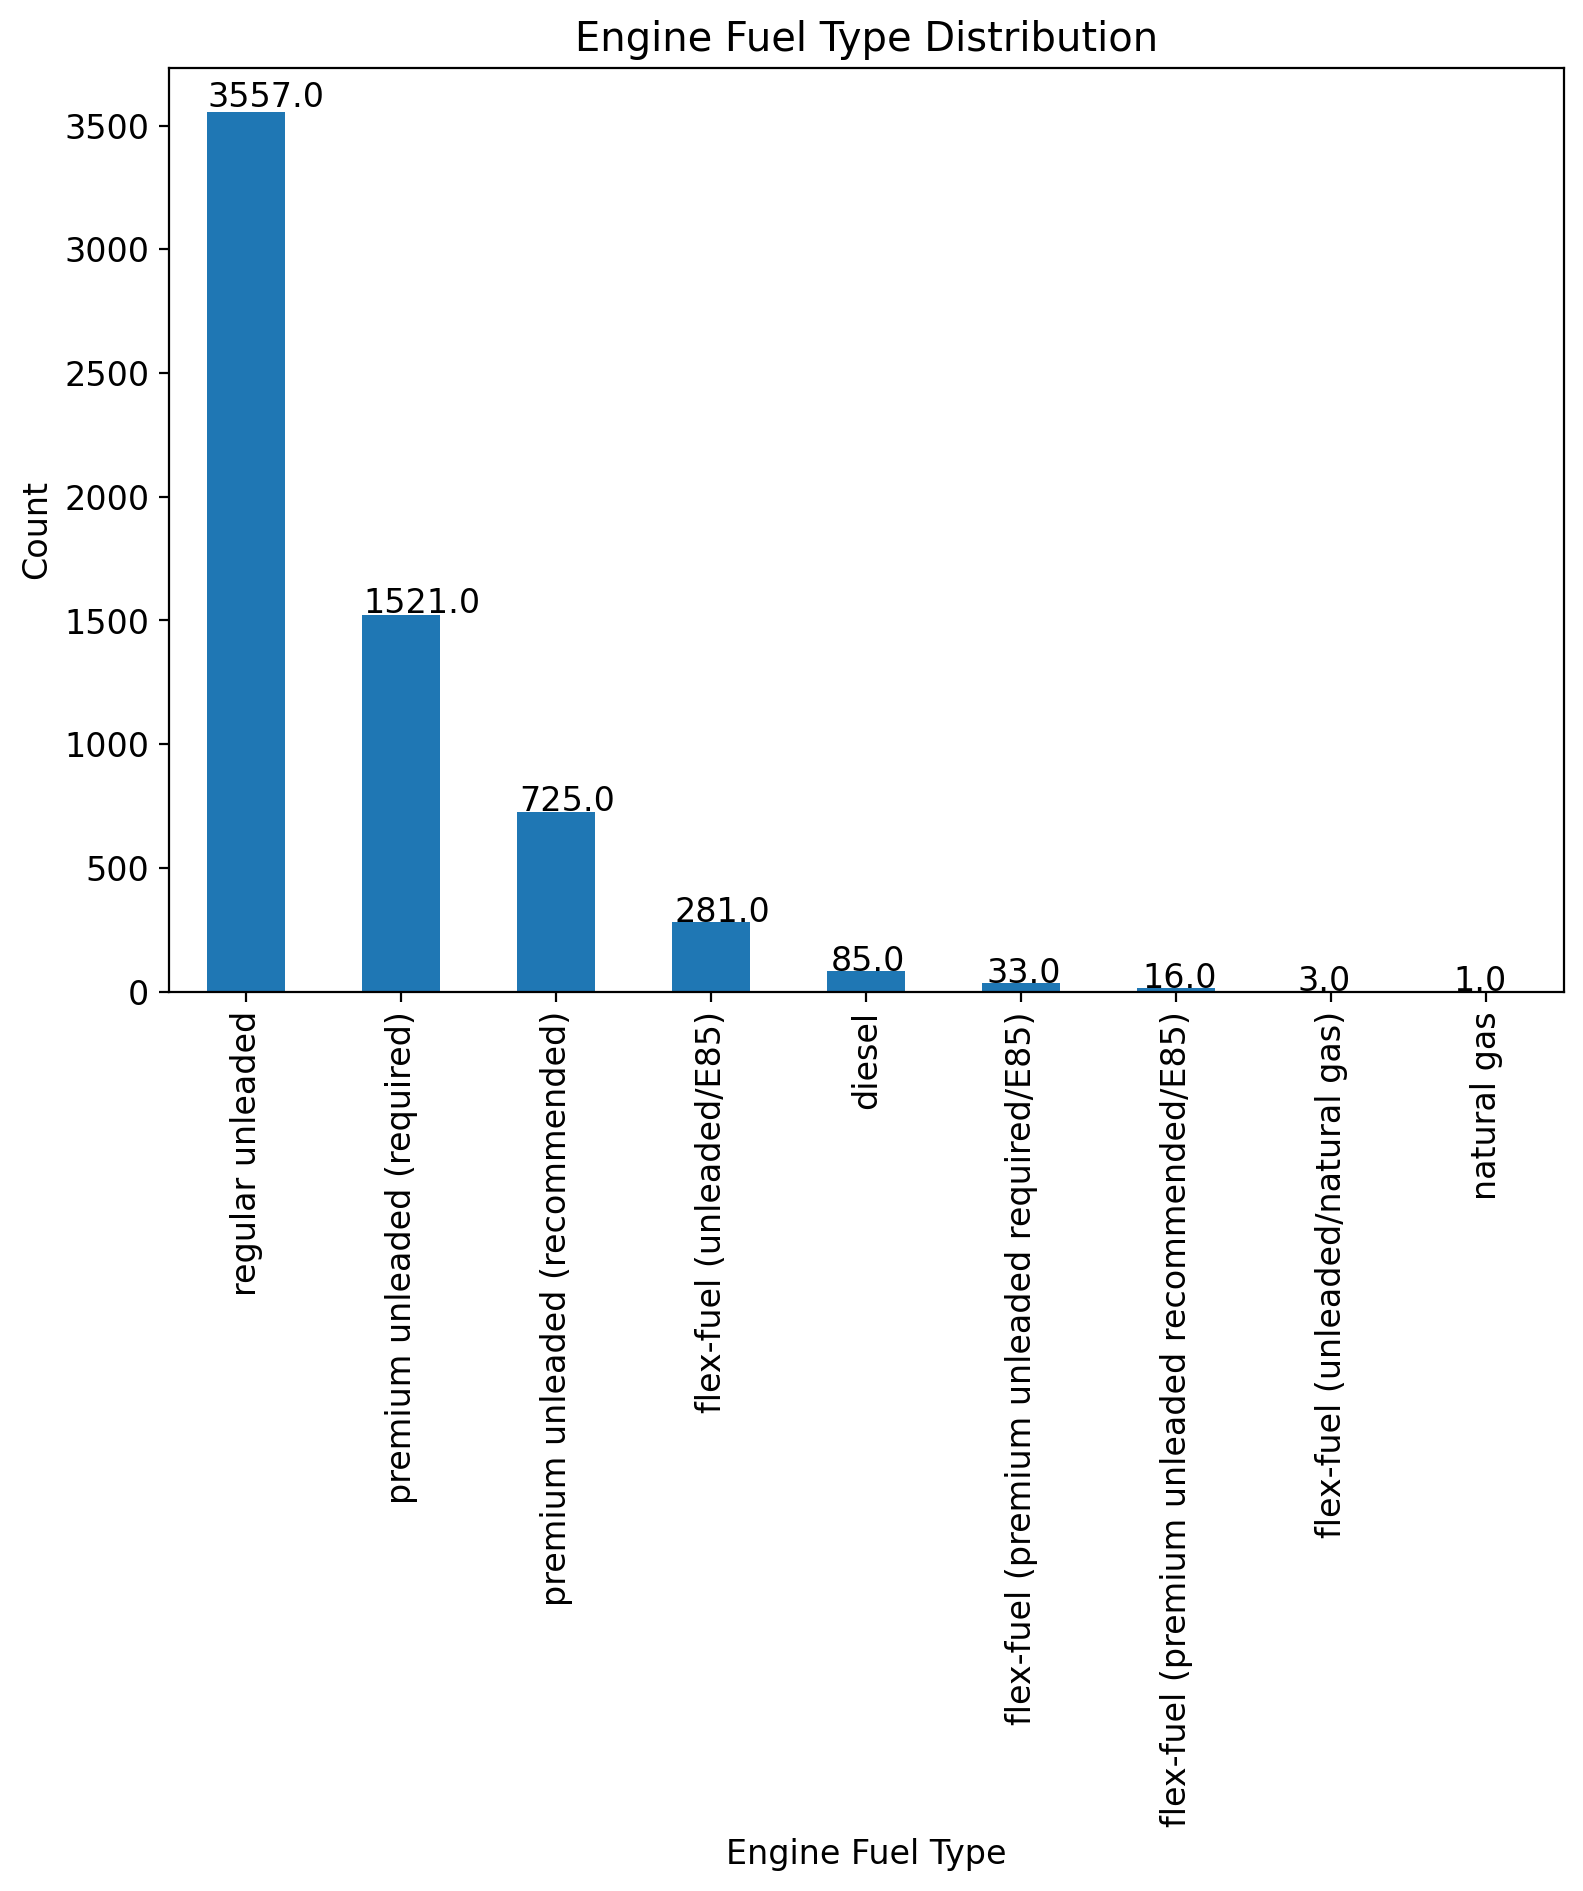

In [90]:
ax = df_unique['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.title('Engine Fuel Type Distribution')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [91]:
df_unique = df_unique[df_unique['Engine Fuel Type'] != 'natural gas']

In [92]:
# replacing the values in column Engine Fuel Type with value flex-fuel(unleaded/natural gas) to flex-fuel(unleaded/E85)
df_unique['Engine Fuel Type'].replace('flex-fuel (unleaded/natural gas)', 'flex-fuel (unleaded/E85)', inplace=True)
df_unique['Engine Fuel Type'].replace('flex-fuel (premium unleaded recommended/E85)', 'flex-fuel (unleaded/E85)', inplace=True)

<ipython-input-92-de9632a5a3f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Engine Fuel Type'].replace('flex-fuel (unleaded/natural gas)', 'flex-fuel (unleaded/E85)', inplace=True)
<ipython-input-92-de9632a5a3f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Engine Fuel Type'].replace('flex-fuel (premium unleaded recommended/E85)', 'flex-fuel (unleaded/E85)', inplace=True)


In [93]:
df_unique["Engine Fuel Type"].unique()

<StringArray>
[              'premium unleaded (required)',
                          'regular unleaded',
            'premium unleaded (recommended)',
                  'flex-fuel (unleaded/E85)',
                                    'diesel',
 'flex-fuel (premium unleaded required/E85)']
Length: 6, dtype: string

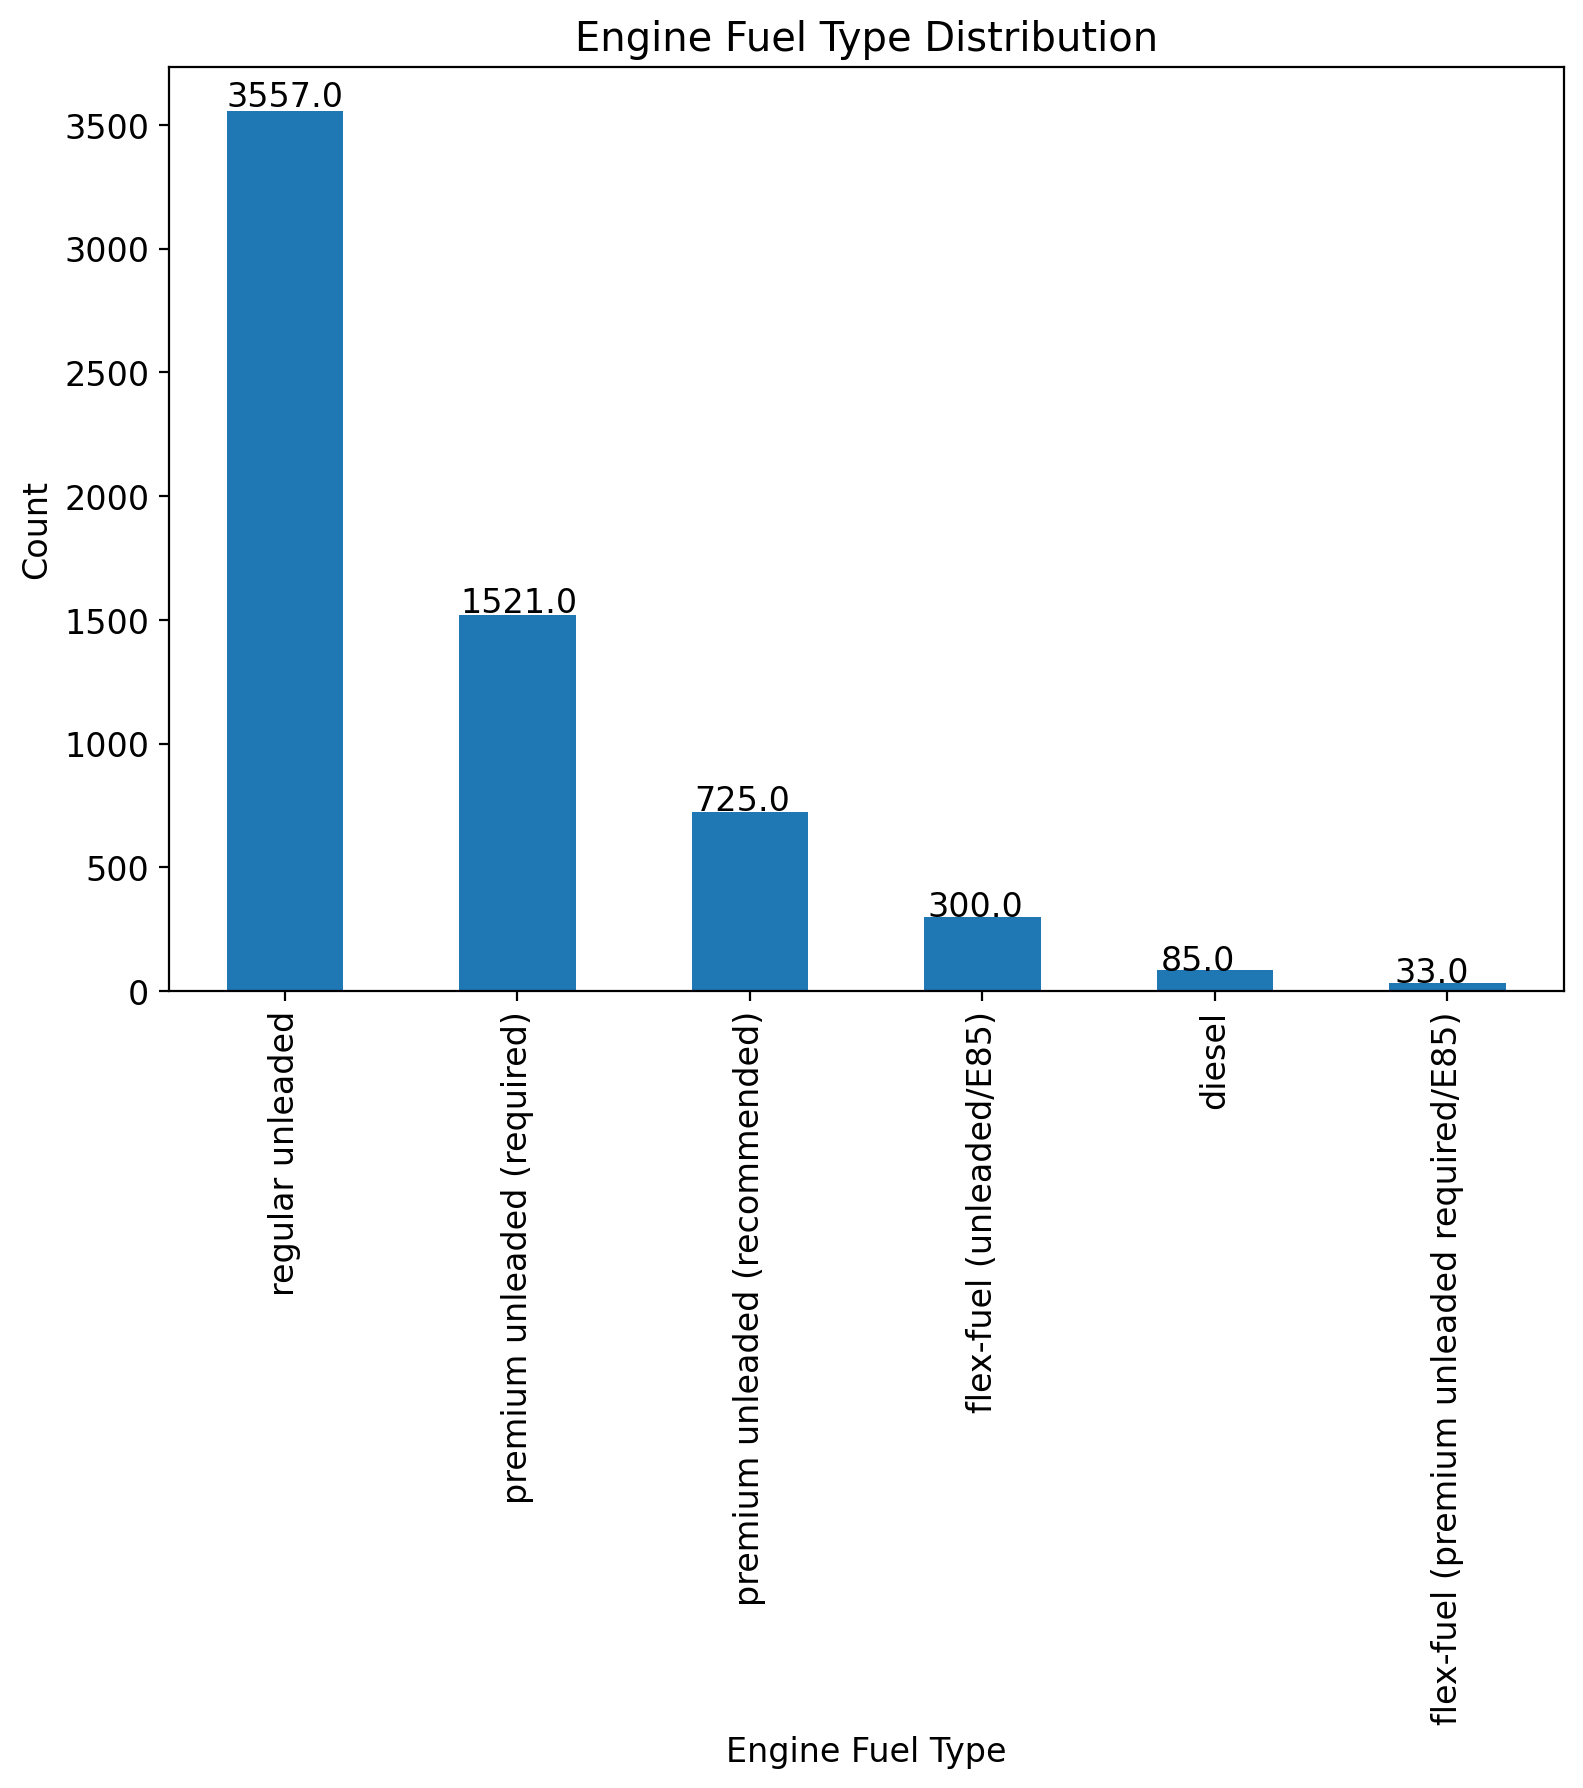

In [94]:
ax = df_unique['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.title('Engine Fuel Type Distribution')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Handling observation 8

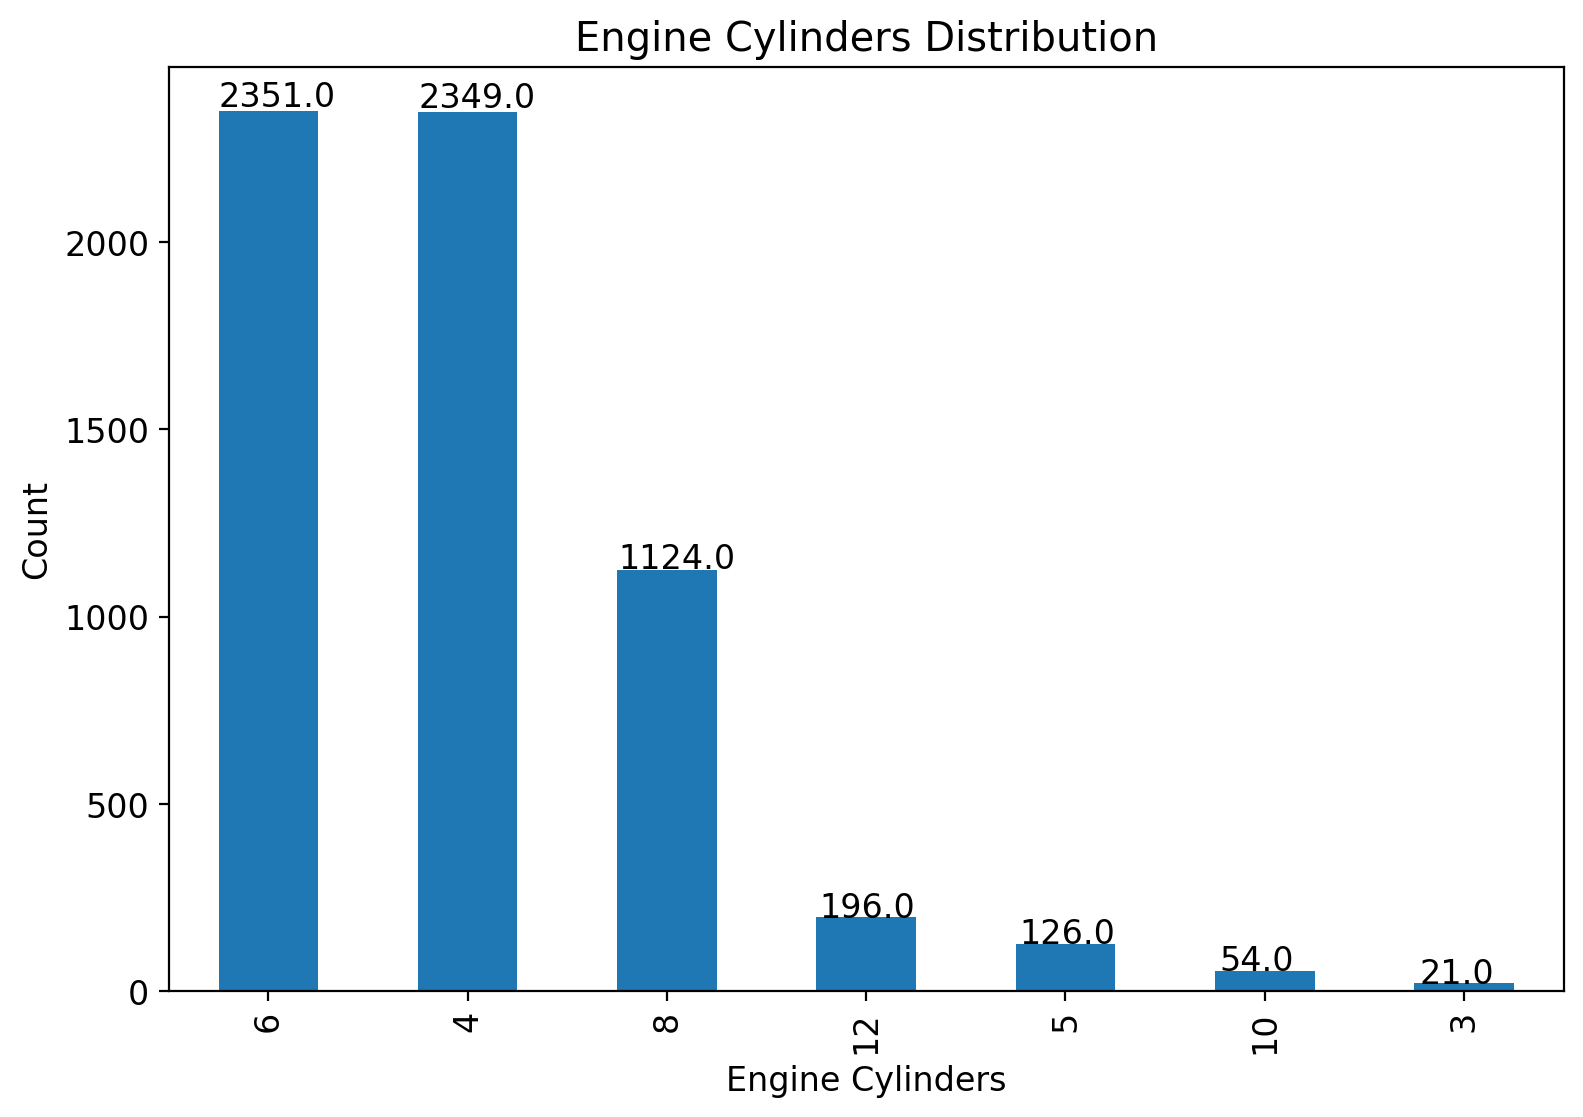

In [95]:
ax= df_unique['Engine Cylinders'].value_counts().plot(kind='bar')
plt.title('Engine Cylinders Distribution')
plt.xlabel('Engine Cylinders')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [96]:
#Replacing 3 cylinders with 4 and 10 cylinders with 12
df_unique['Engine Cylinders'].replace(3,4,inplace=True)
df_unique['Engine Cylinders'].replace(10,12,inplace=True)

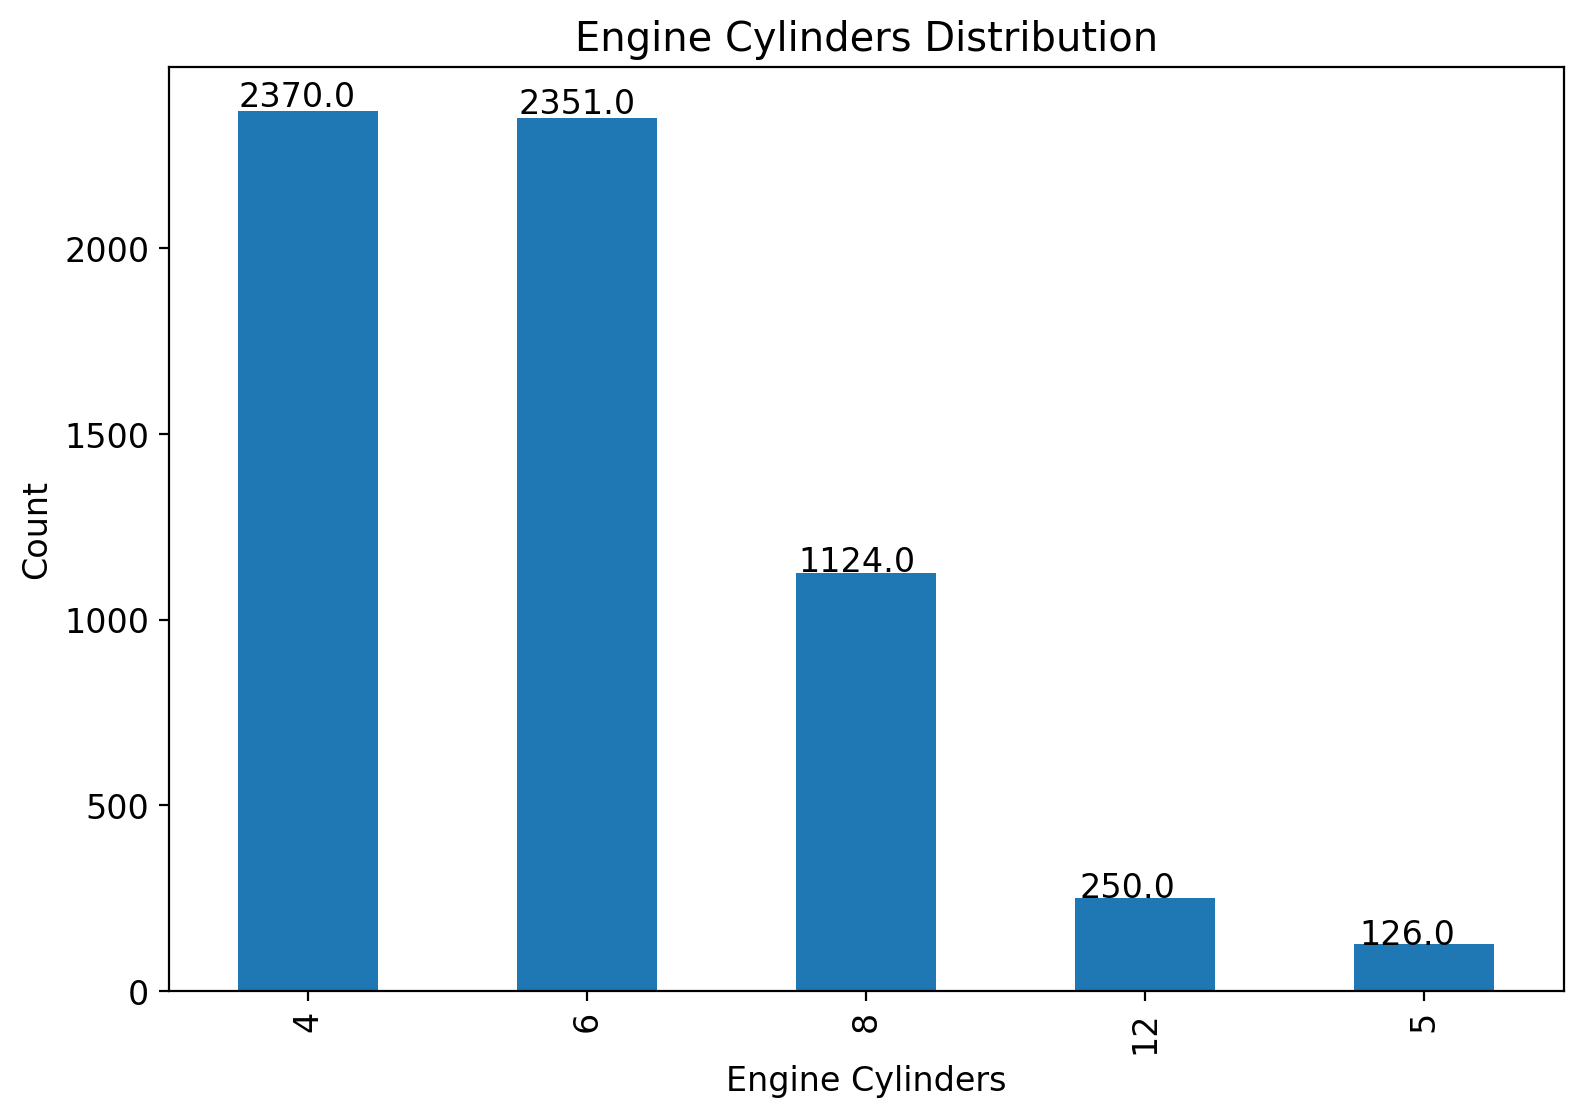

In [97]:
ax= df_unique['Engine Cylinders'].value_counts().plot(kind='bar')
plt.title('Engine Cylinders Distribution')
plt.xlabel('Engine Cylinders')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Handling observation 9

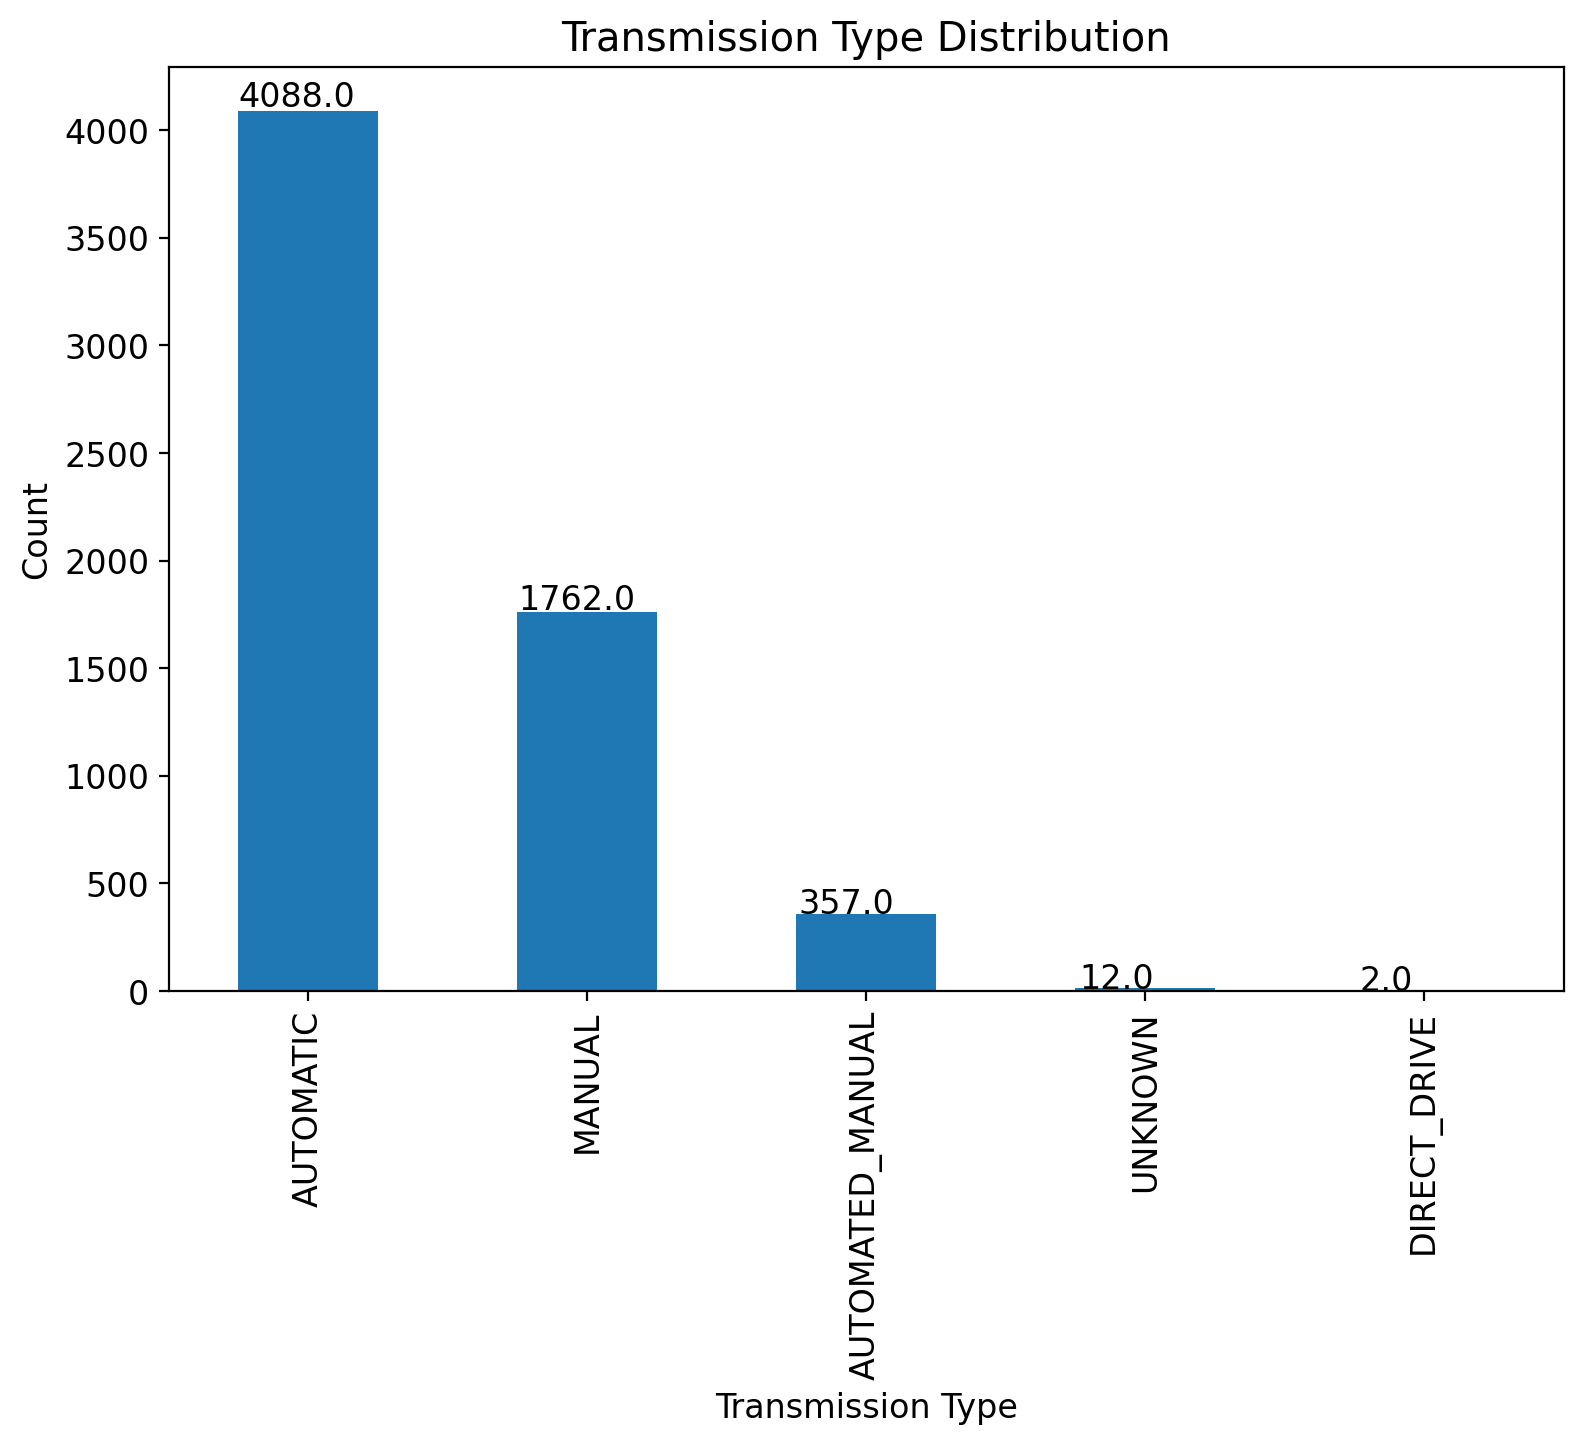

In [98]:
ax = df_unique['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [99]:
df_unique['Transmission Type'].unique()

<StringArray>
['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN', 'DIRECT_DRIVE']
Length: 5, dtype: string

In [100]:
#Replacing values of old cars with manual and direct drive hybrids with automatic for column transmission type
df_unique['Transmission Type'].replace('UNKNOWN','MANUAL',inplace=True)
df_unique['Transmission Type'].replace('DIRECT_DRIVE','AUTOMATIC',inplace=True)

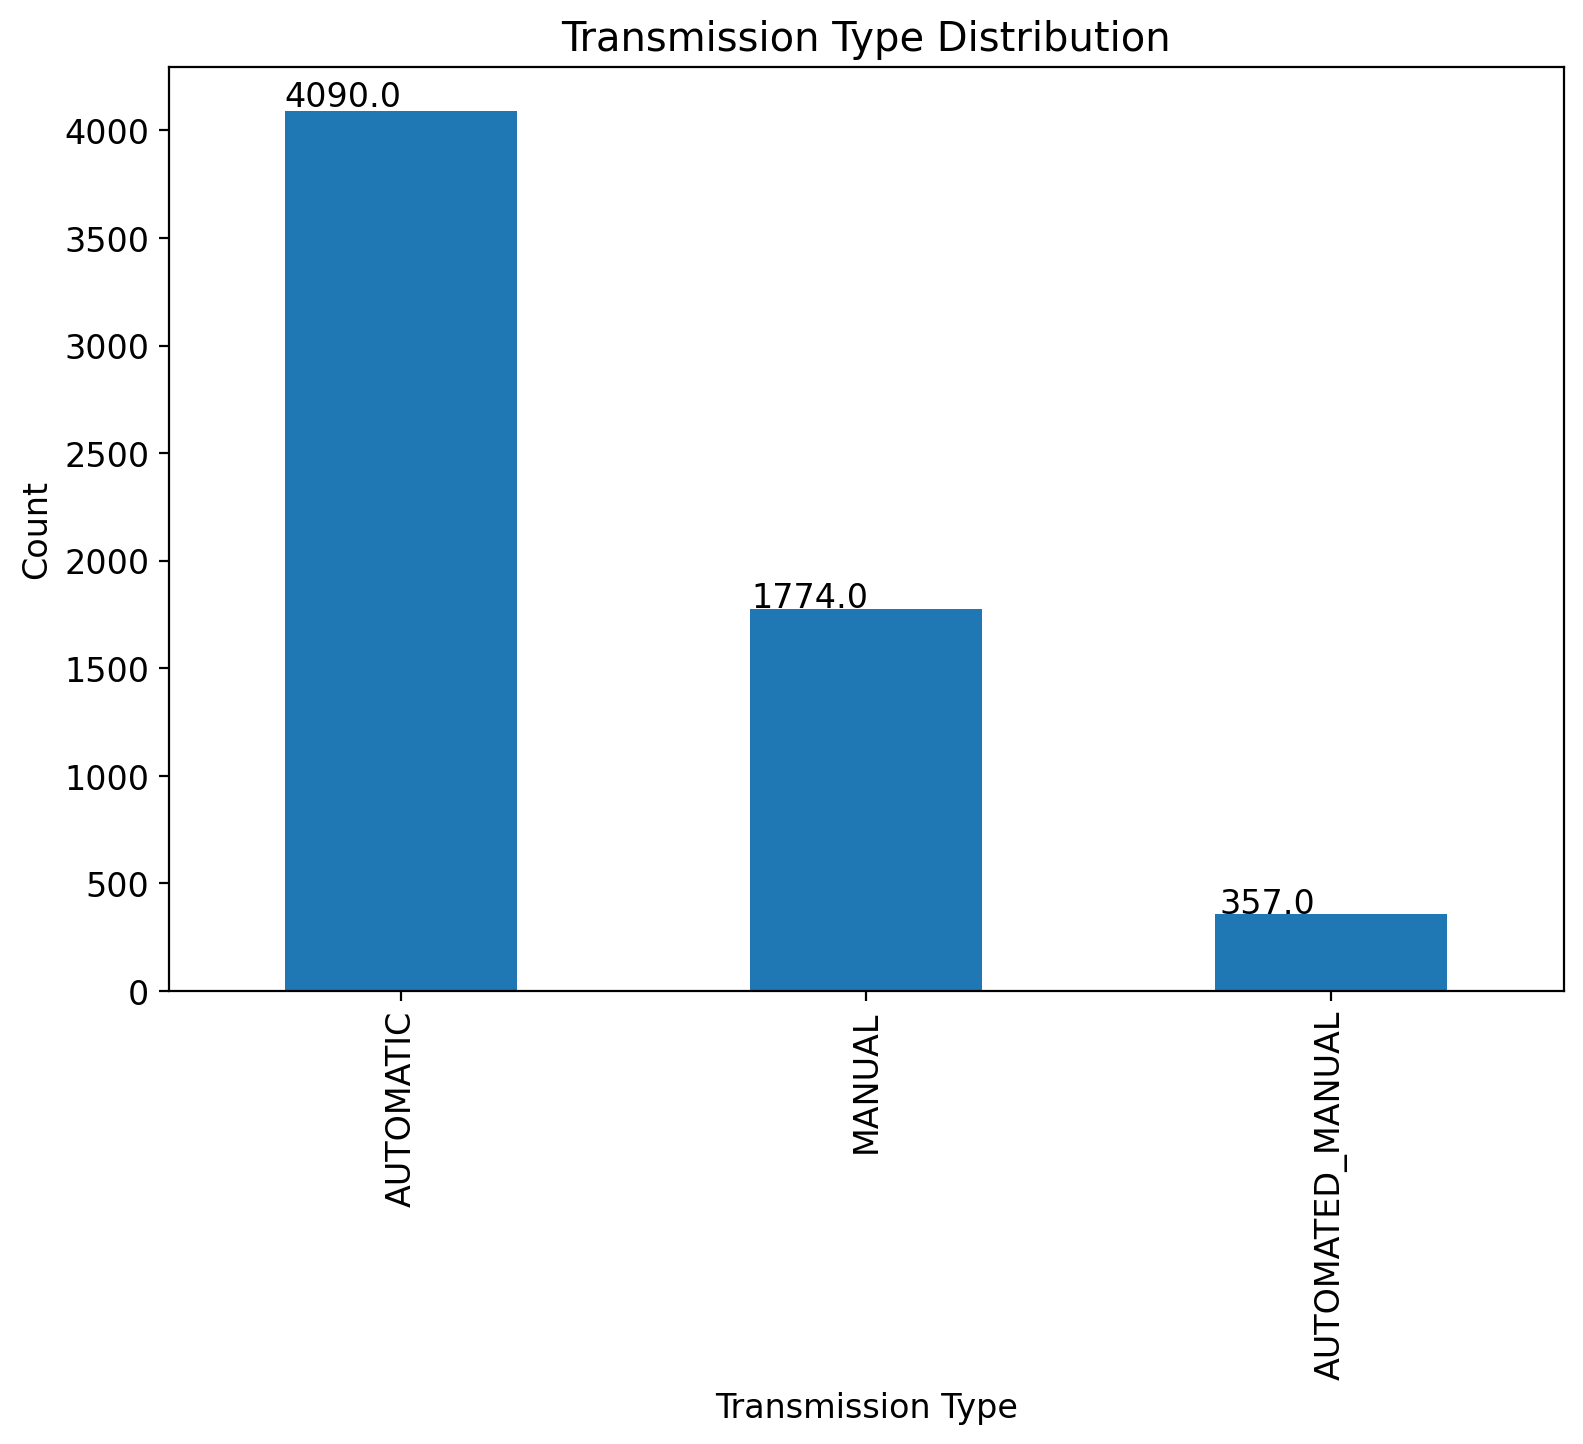

In [101]:
ax = df_unique['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Handling observation 10

In [102]:
def transform_to_list(value):
    if pd.isna(value):
        return []
    return value.split(',')
df_unique['Market Category'] = df_unique['Market Category'].apply(transform_to_list)

In [103]:
#count of unique market categories in the whole dataset
market_category_counts = {}
for market_categories in df_unique['Market Category']:
    for market_category in market_categories:
        if market_category not in market_category_counts:
            market_category_counts[market_category] = 0
        market_category_counts[market_category] += 1

print(market_category_counts)

{'Factory Tuner': 511, 'Luxury': 2275, 'High-Performance': 1029, 'Performance': 1248, 'Flex Fuel': 420, 'Unknown': 1771, 'Hatchback': 616, 'Hybrid': 170, 'Diesel': 98, 'Exotic': 397, 'Crossover': 946}


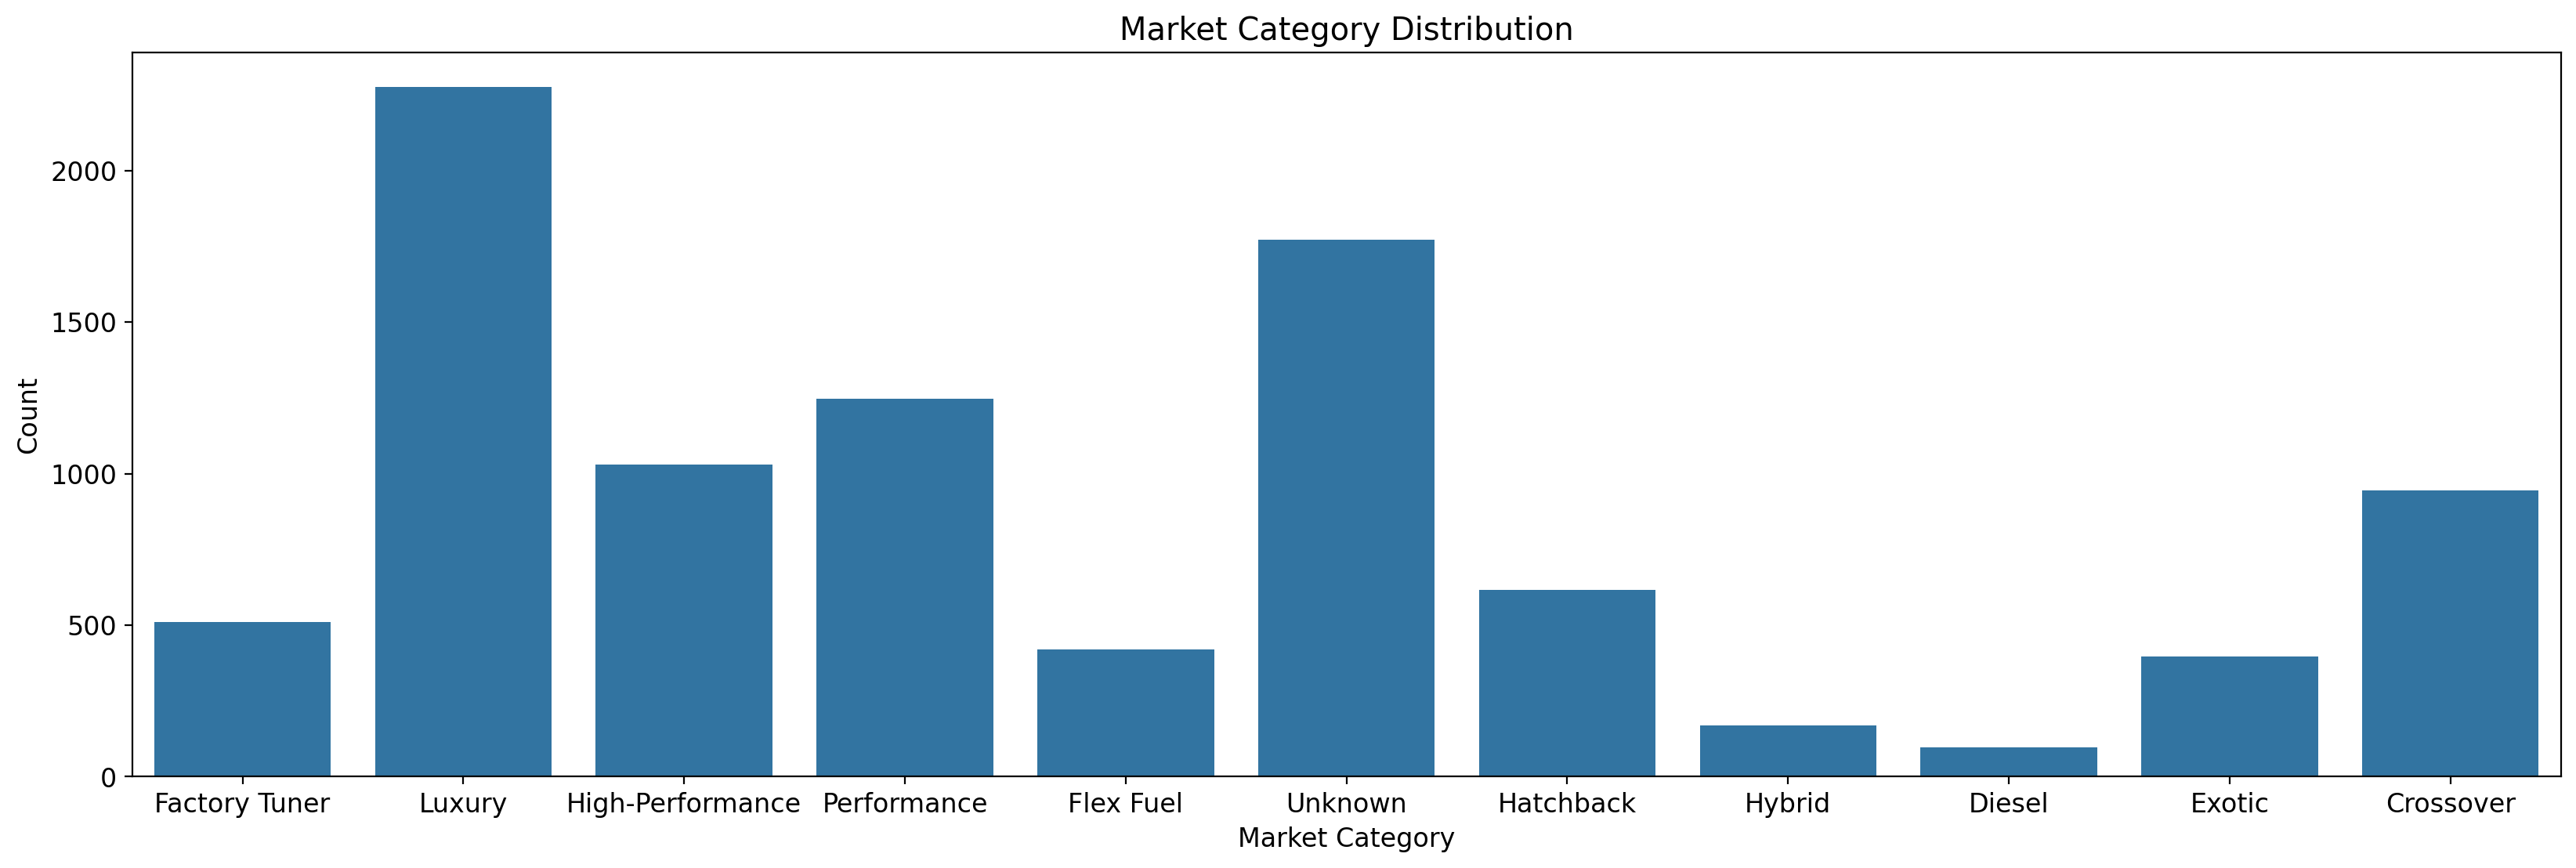

In [104]:
#Visualizing the distribution
plt.figure(figsize=(20, 6))
sns.barplot(x=list(market_category_counts.keys()), y=list(market_category_counts.values()))

plt.title('Market Category Distribution')
plt.xlabel('Market Category')
plt.ylabel('Count')

plt.show()

In [105]:
df_unique["Market Category"]

0        [Factory Tuner, Luxury, High-Performance]
1                            [Luxury, Performance]
2                       [Luxury, High-Performance]
3                            [Luxury, Performance]
4                                         [Luxury]
                           ...                    
11905           [Exotic, Luxury, High-Performance]
11906               [Crossover, Hatchback, Luxury]
11909               [Crossover, Hatchback, Luxury]
11912               [Crossover, Hatchback, Luxury]
11913                                     [Luxury]
Name: Market Category, Length: 6221, dtype: object

In [106]:
# Performing one-hot encoding for 'Market Category'
df_encoded = pd.get_dummies(df_unique['Market Category'].apply(pd.Series).stack())
df_final = df_encoded.groupby(level=0).sum()
df_final = pd.concat([df_unique, df_final], axis=1)
df_final.drop('Market Category', axis=1, inplace=True)

#This is the final Analytics base table

In [107]:
df_final

Year                Engine Fuel Type  Engine HP  Engine Cylinders  \
0      2011     premium unleaded (required)        335                 6   
1      2011     premium unleaded (required)        300                 6   
2      2011     premium unleaded (required)        300                 6   
3      2011     premium unleaded (required)        230                 6   
4      2011     premium unleaded (required)        230                 6   
...     ...                             ...        ...               ...   
11905  2003     premium unleaded (required)        394                 8   
11906  2011     premium unleaded (required)        300                 6   
11909  2012     premium unleaded (required)        300                 6   
11912  2013  premium unleaded (recommended)        300                 6   
11913  2006                regular unleaded        221                 6   

      Transmission Type      Driven_Wheels  Number of Doors Vehicle Size  \
0                MANUAL   rear wheel drive                2      Compact   
1                MANUAL   rear wheel drive                2      Compact   
2                MANUAL   rear wheel drive                2      Compact   
3                MANUAL   rear wheel drive                2      Compact   
4                MANUAL   rear wheel drive                2      Compact   
...                 ...                ...              ...          ...   
11905            MANUAL   rear wheel drive                2      Compact   
11906         AUTOMATIC    all wheel drive                4      Midsize   
11909         AUTOMATIC    all wheel drive                4      Midsize   
11912         AUTOMATIC    all wheel drive                4      Midsize   
11913         AUTOMATIC  front wheel drive                4      Midsize   

       Vehicle Style   mpg  ...  Diesel  Exotic  Factory Tuner  Flex Fuel  \
0              Coupe  22.5  ...       0       0              1          0   
1        Convertible  23.5  ...       0       0              0          0   
2              Coupe  24.0  ...       0       0              0          0   
3              Coupe  23.0  ...       0       0              0          0   
4        Convertible  23.0  ...       0       0              0          0   
...              ...   ...  ...     ...     ...            ...        ...   
11905    Convertible  15.5  ...       0       1              0          0   
11906  4dr Hatchback  19.5  ...       0       0              0          0   
11909  4dr Hatchback  19.5  ...       0       0              0          0   
11912  4dr Hatchback  19.5  ...       0       0              0          0   
11913          Sedan  21.5  ...       0       0              0          0   

       Hatchback  High-Performance  Hybrid  Luxury  Performance  Unknown  
0              0                 1       0       1            0        0  
1              0                 0       0       1            1        0  
2              0                 1       0       1            0        0  
3              0                 0       0       1            1        0  
4              0                 0       0       1            0        0  
...          ...               ...     ...     ...          ...      ...  
11905          0                 1       0       1            0        0  
11906          1                 0       0       1            0        0  
11909          1                 0       0       1            0        0  
11912          1                 0       0       1            0        0  
11913          0                 0       0       1            0        0  

[6221 rows x 21 columns]

#__4. Data Insights__

##4a. Calculate summary statistics for key variables in the dataset. Create visualizations (e.g., histograms, box plots, scatter plots) to illustrate data distributions and relationships. [0.75]

##4b. Analyze the summary statistics and visualizations to derive initial insights about the data. Discuss any interesting patterns or trends you observe. [0.5]

In [108]:
df_unique.describe()

Year   Engine HP  Engine Cylinders  Number of Doors        mpg
count       6221.0      6221.0            6221.0           6221.0     6221.0
mean   2009.269892  259.276965          5.820286         3.340299  22.303408
std       8.073336  122.024647          1.918814         0.922441   5.613991
min         1990.0        55.0               4.0              2.0        9.5
25%         2004.0       170.0               4.0              2.0       18.5
50%         2013.0       235.0               6.0              4.0       21.5
75%         2016.0       315.0               6.0              4.0       25.5
max         2017.0       750.0              12.0              4.0       55.5

Observing the summary statistics we can see that



In [109]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6221 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6221 non-null   Int64  
 1   Engine Fuel Type   6221 non-null   string 
 2   Engine HP          6221 non-null   Int64  
 3   Engine Cylinders   6221 non-null   Int64  
 4   Transmission Type  6221 non-null   string 
 5   Driven_Wheels      6221 non-null   string 
 6   Number of Doors    6221 non-null   Int64  
 7   Market Category    6221 non-null   object 
 8   Vehicle Size       6221 non-null   string 
 9   Vehicle Style      6221 non-null   string 
 10  mpg                6221 non-null   Float64
dtypes: Float64(1), Int64(4), object(1), string(5)
memory usage: 742.6+ KB


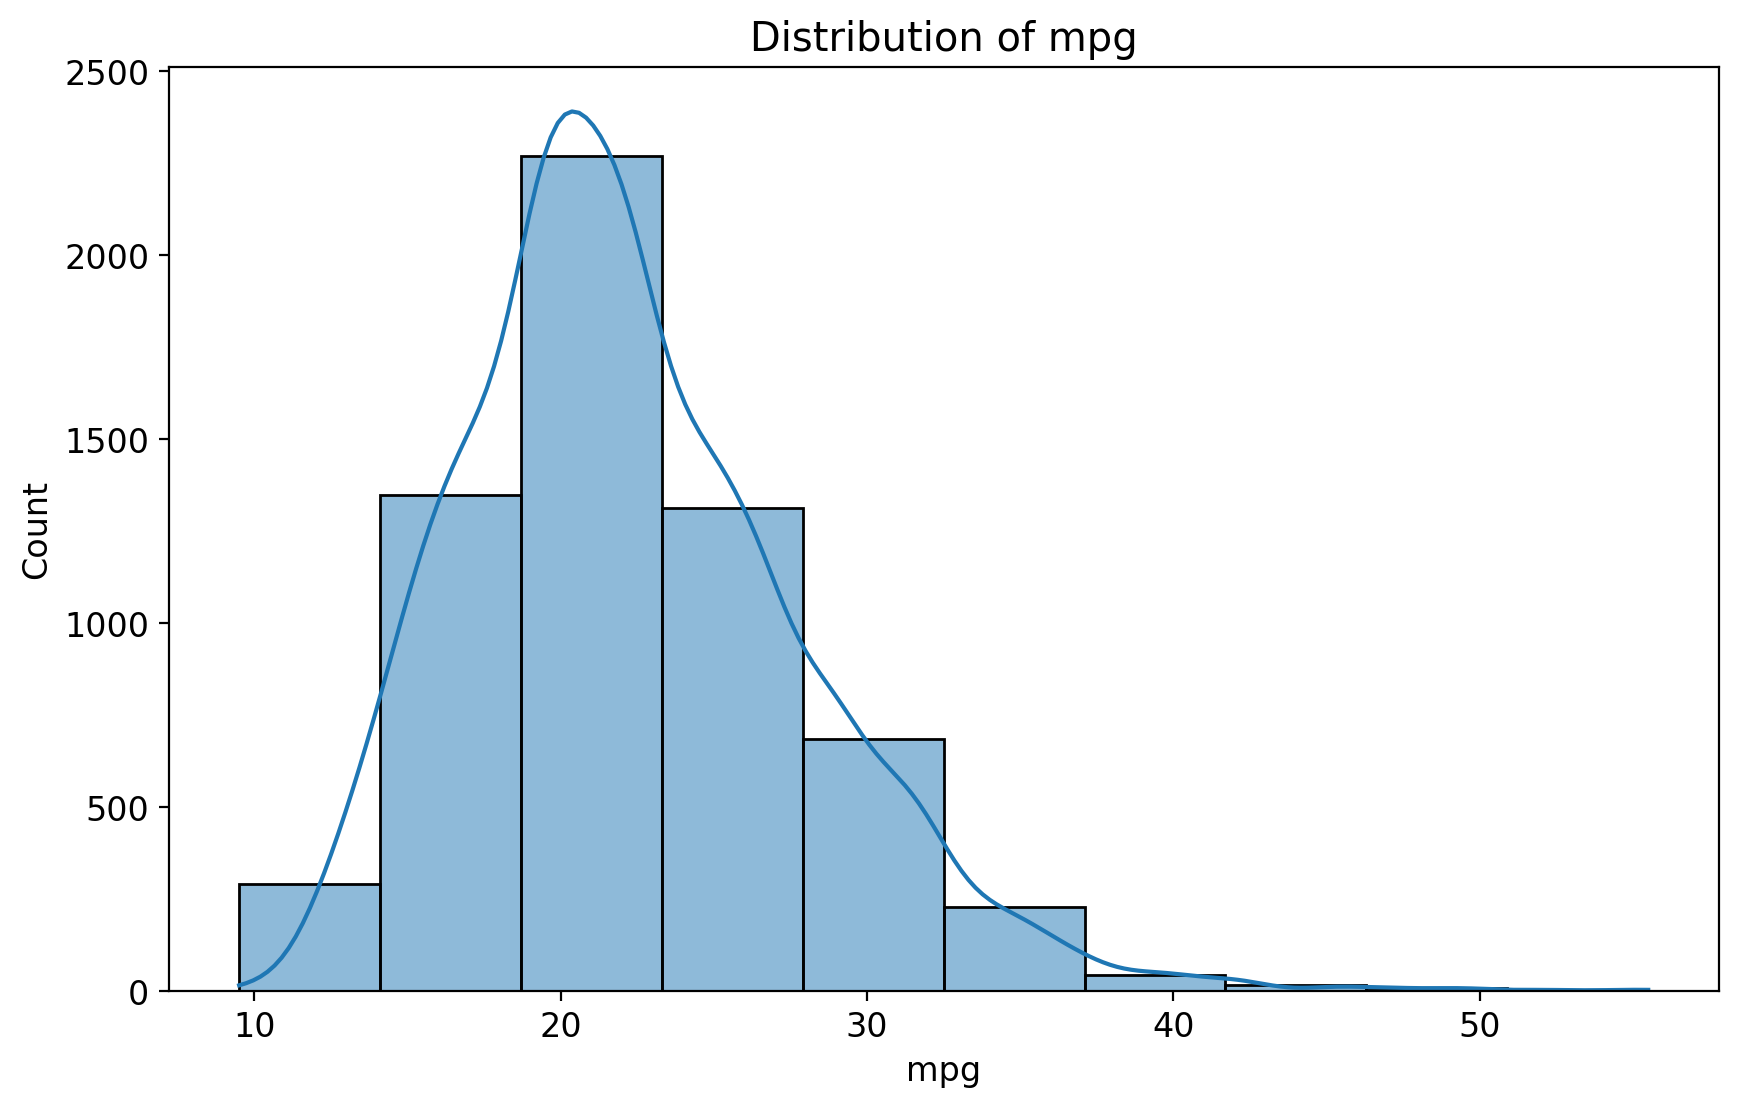

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_unique, x='mpg', bins=10, kde=True)
plt.title('Distribution of mpg')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()
print()

Above we can see the distribution of the target variable.

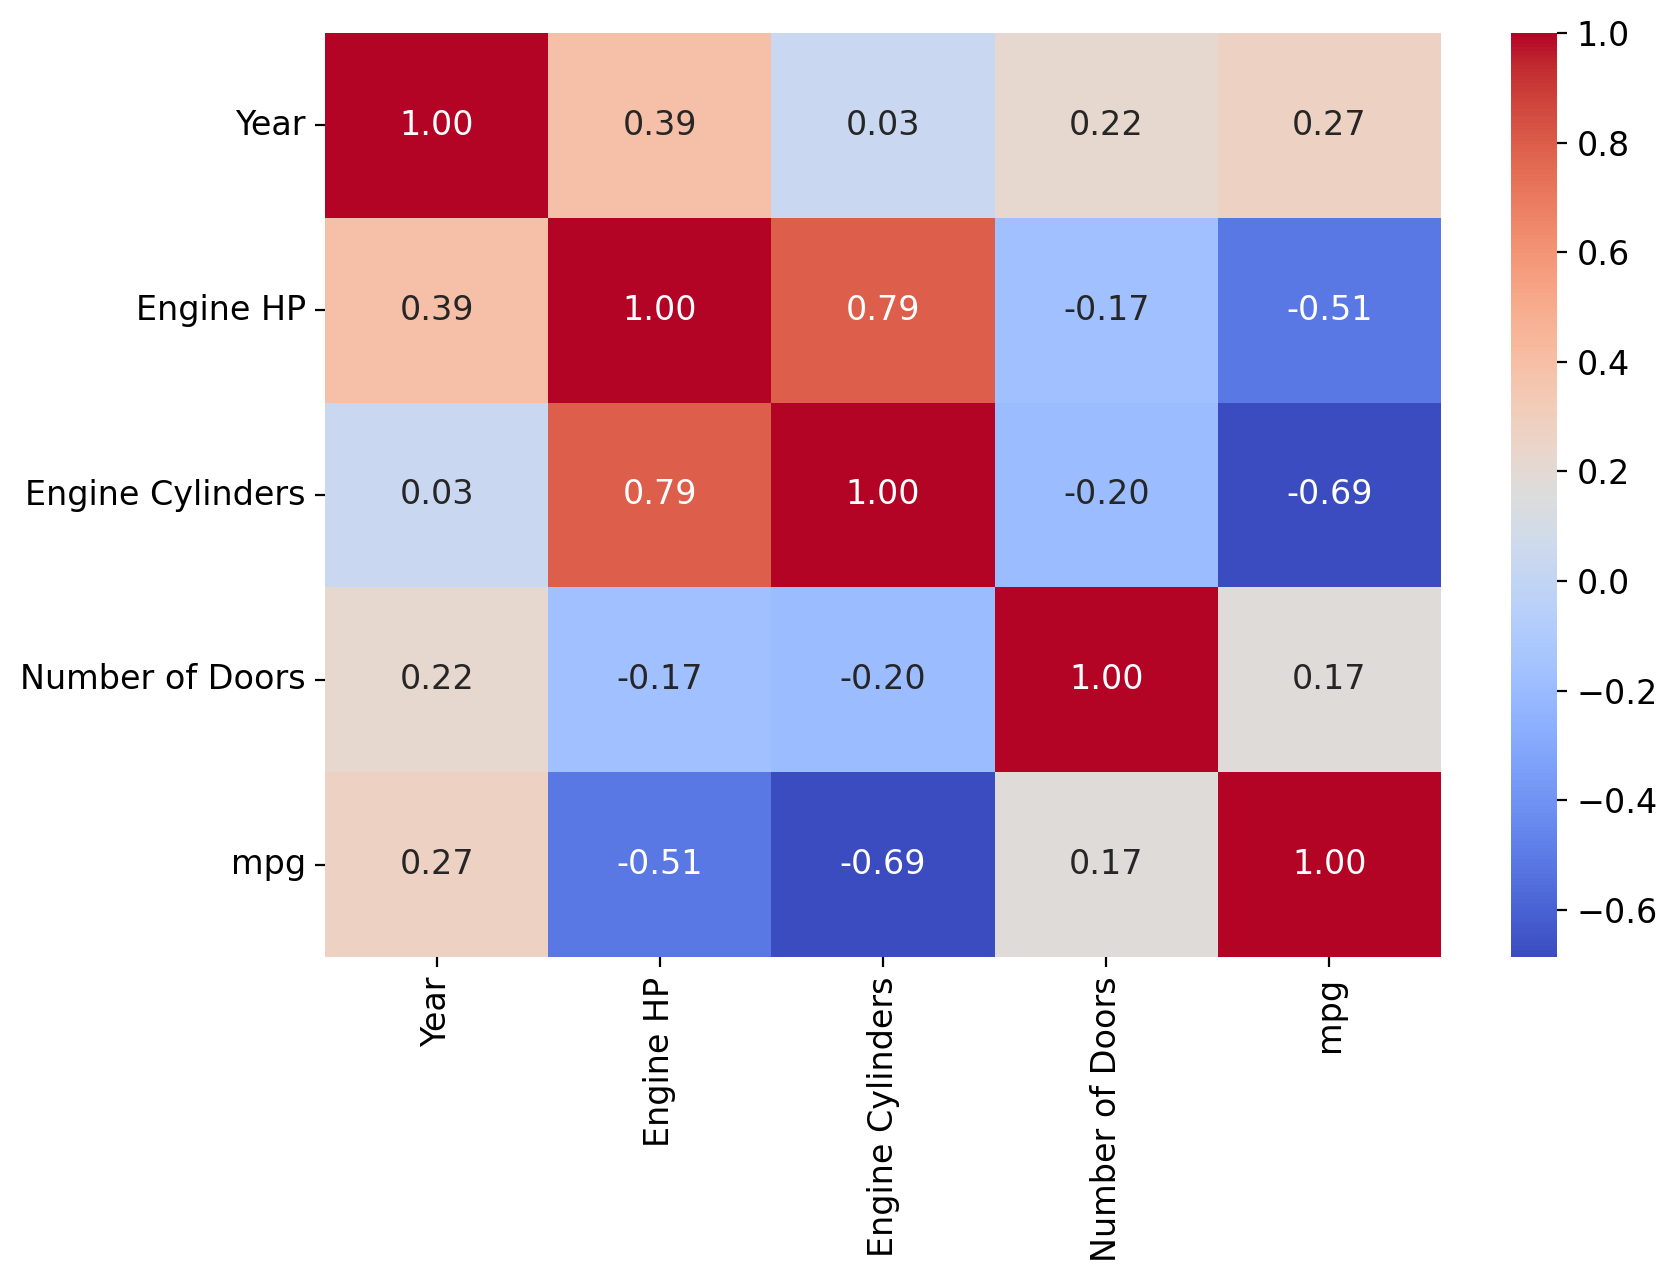

In [111]:
# Creating a correlation matrix
correlation_matrix = df_unique[['Year','Engine HP','Engine Cylinders','Number of Doors','mpg']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

This correlation matrix clearly shows that the features Engine Cylinders and Engine HP are well correlated to MPG. The features engine HP and engine Cylinders have a high correlatation.

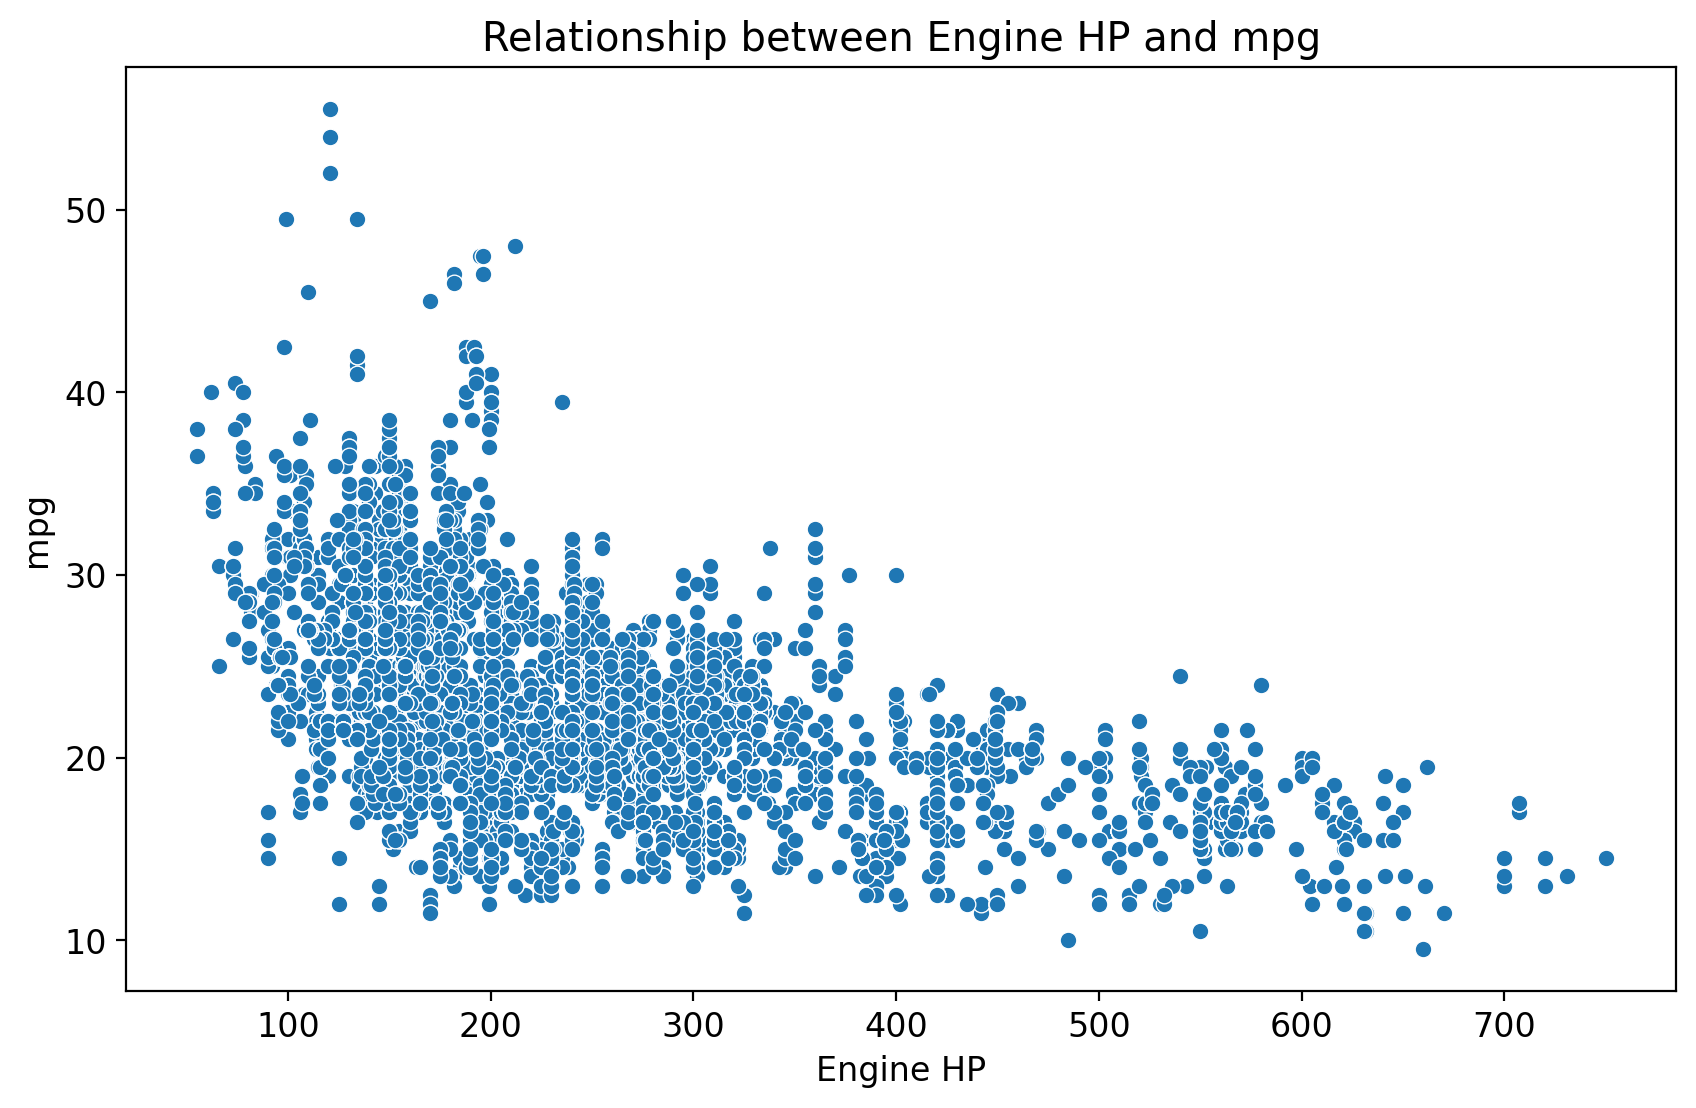

In [112]:
# Scatter plot for 'Engine HP' vs 'mpg'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unique, x='Engine HP', y='mpg')
plt.title('Relationship between Engine HP and mpg')
plt.xlabel('Engine HP')
plt.ylabel('mpg')
plt.show()

The scatter plot shows moderate correlation between Engine HP and MPG

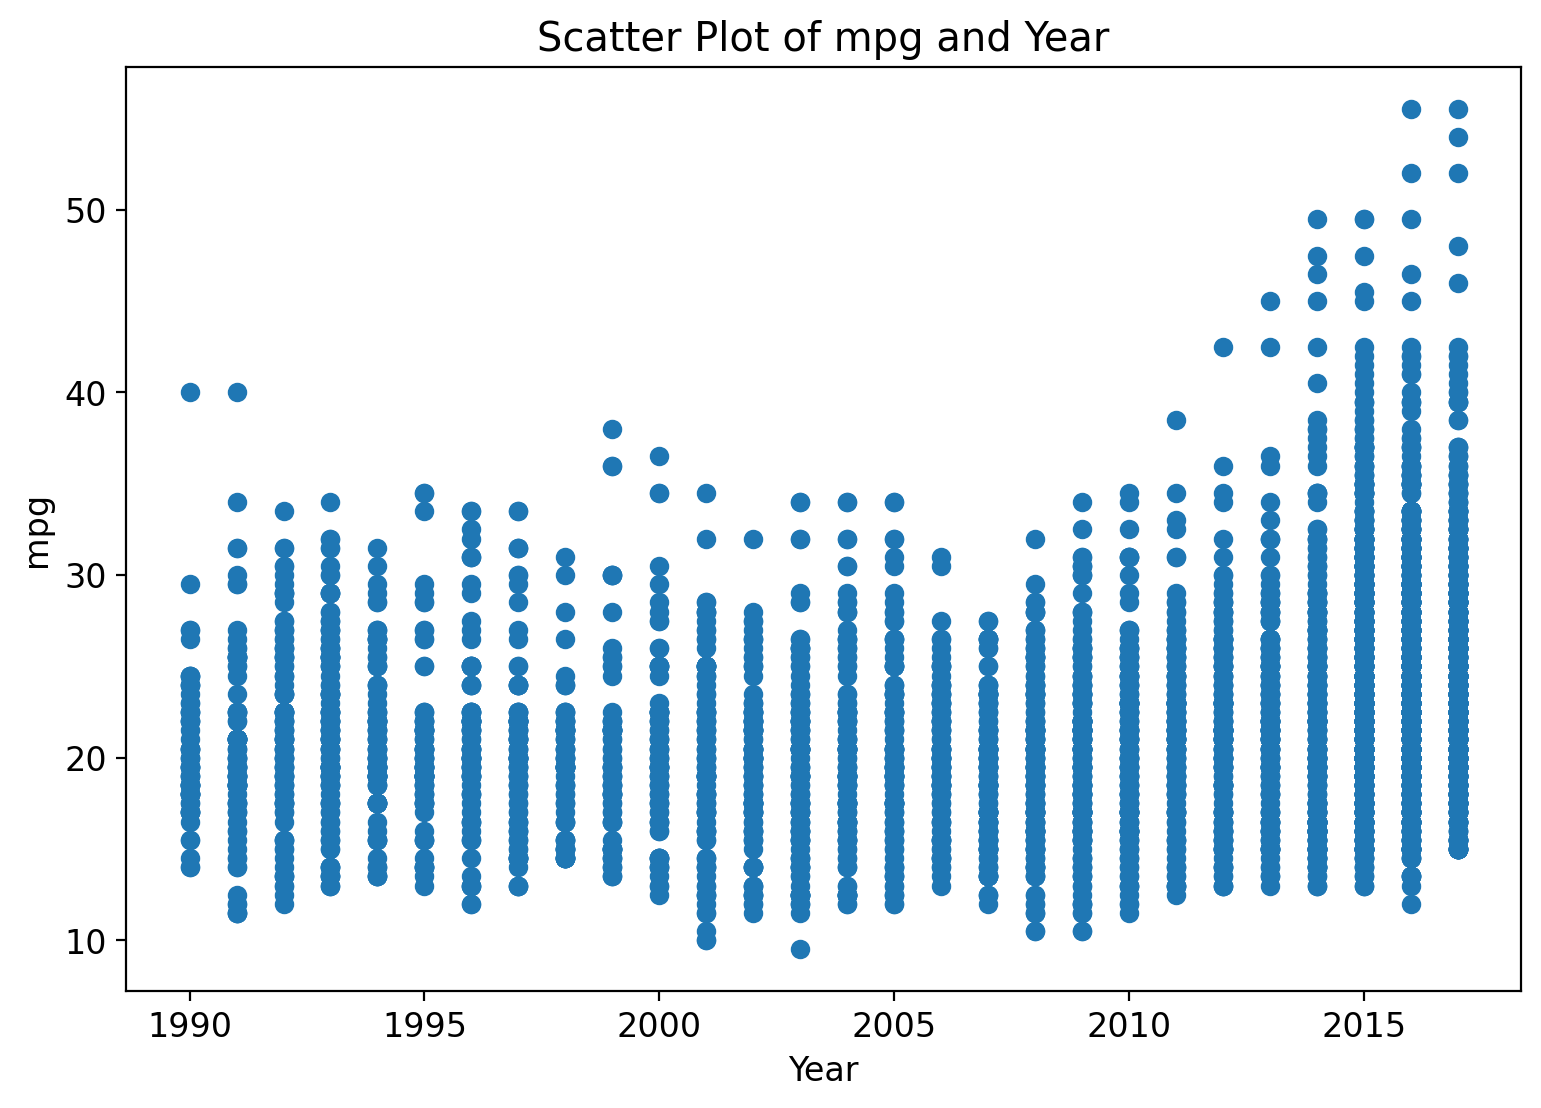

In [113]:
# Scatter plot with mpg on the y-axis and year on the x-axis
plt.scatter(df_unique['Year'],df_unique['mpg'],)
plt.xlabel('Year')
plt.ylabel('mpg')
plt.title('Scatter Plot of mpg and Year')
plt.show()

The scatter plot above shows low correlation between year and mpg

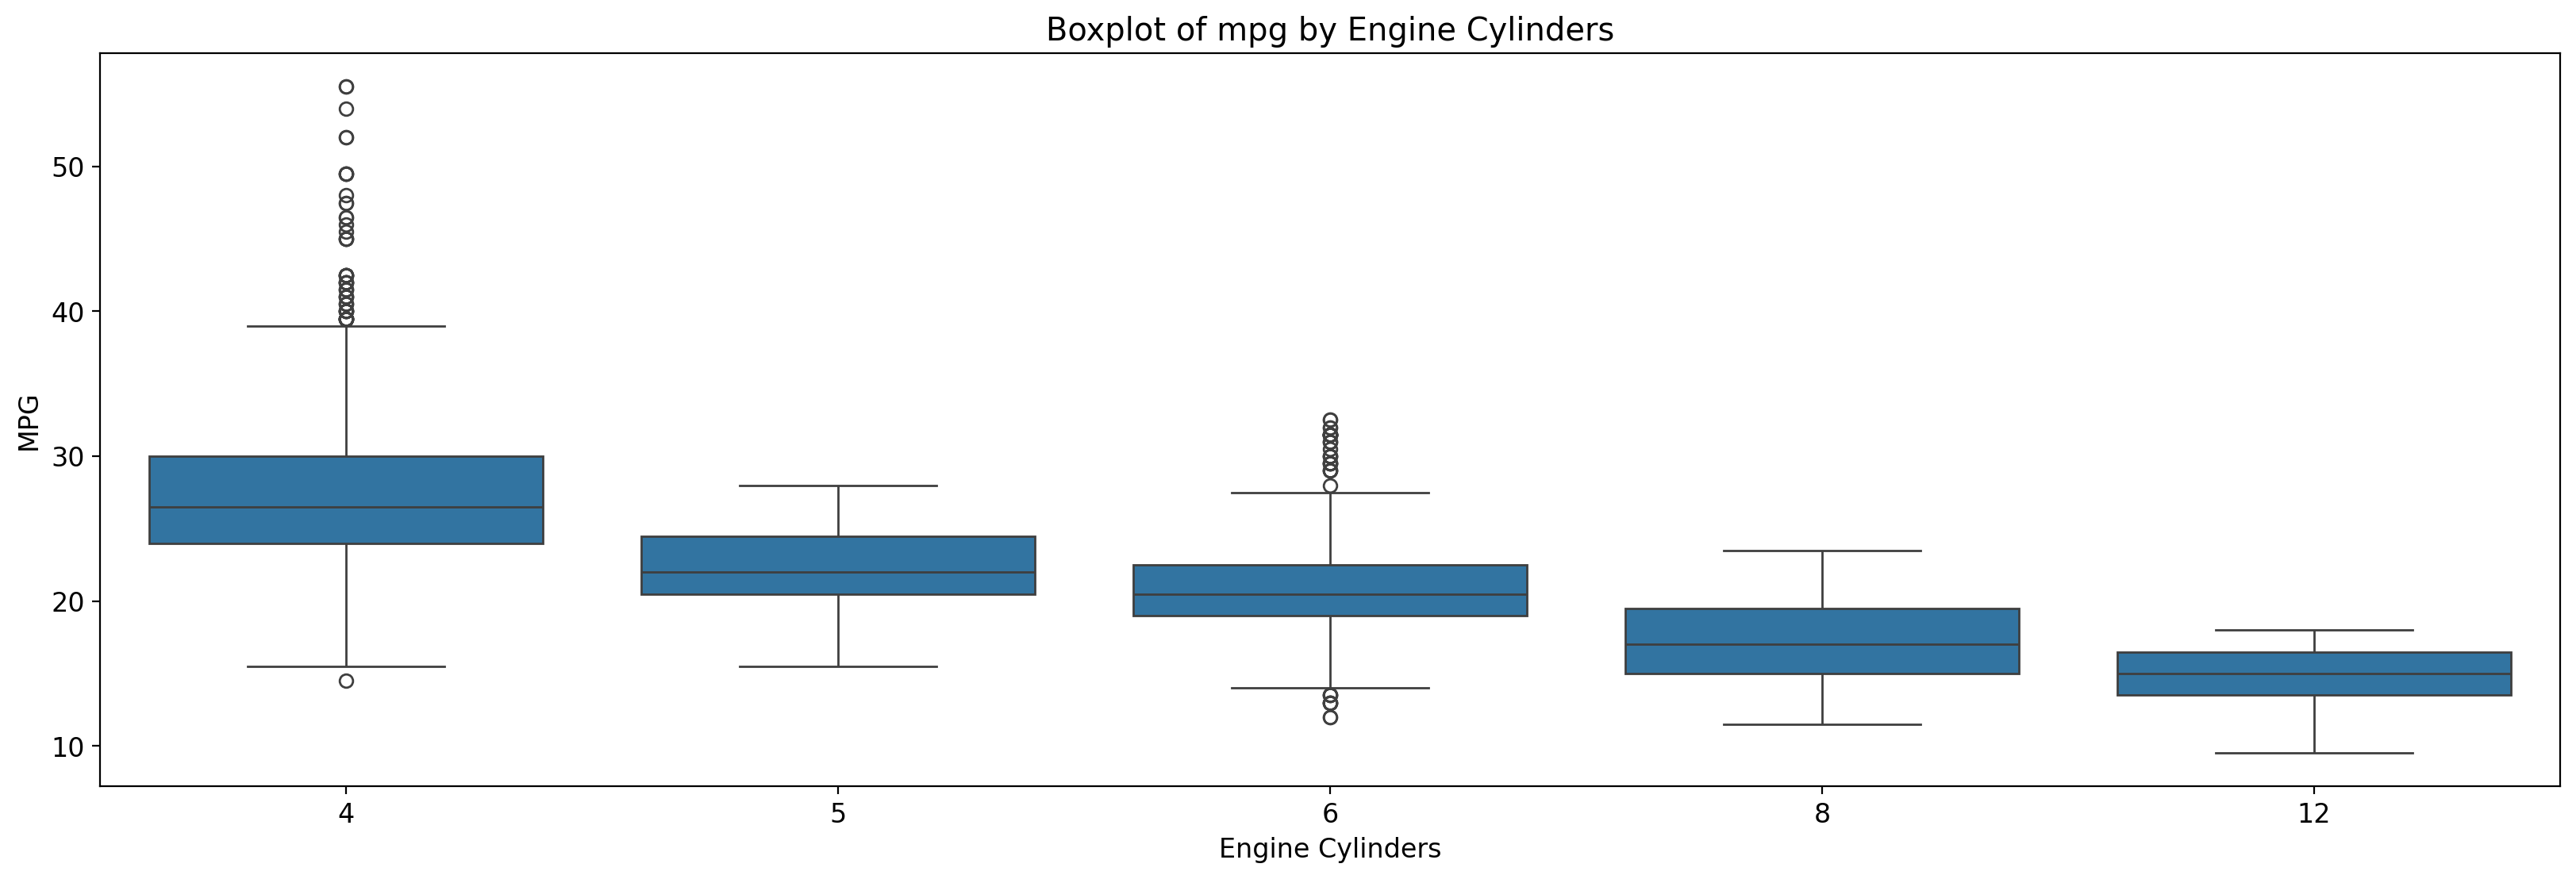

In [114]:
# Scatter plot with mpg on the y-axis and engine cylinders on the x-axis
plt.figure(figsize=(20, 6))
sns.boxplot(x='Engine Cylinders', y='mpg', data=df_unique)
plt.title('Boxplot of mpg by Engine Cylinders')
plt.xlabel('Engine Cylinders')
plt.ylabel('MPG')
plt.show()

On visualizing the relationship between engine Cylinders and MPG. We can see the correlation where the higher the number of cylinders the lower the mpg.

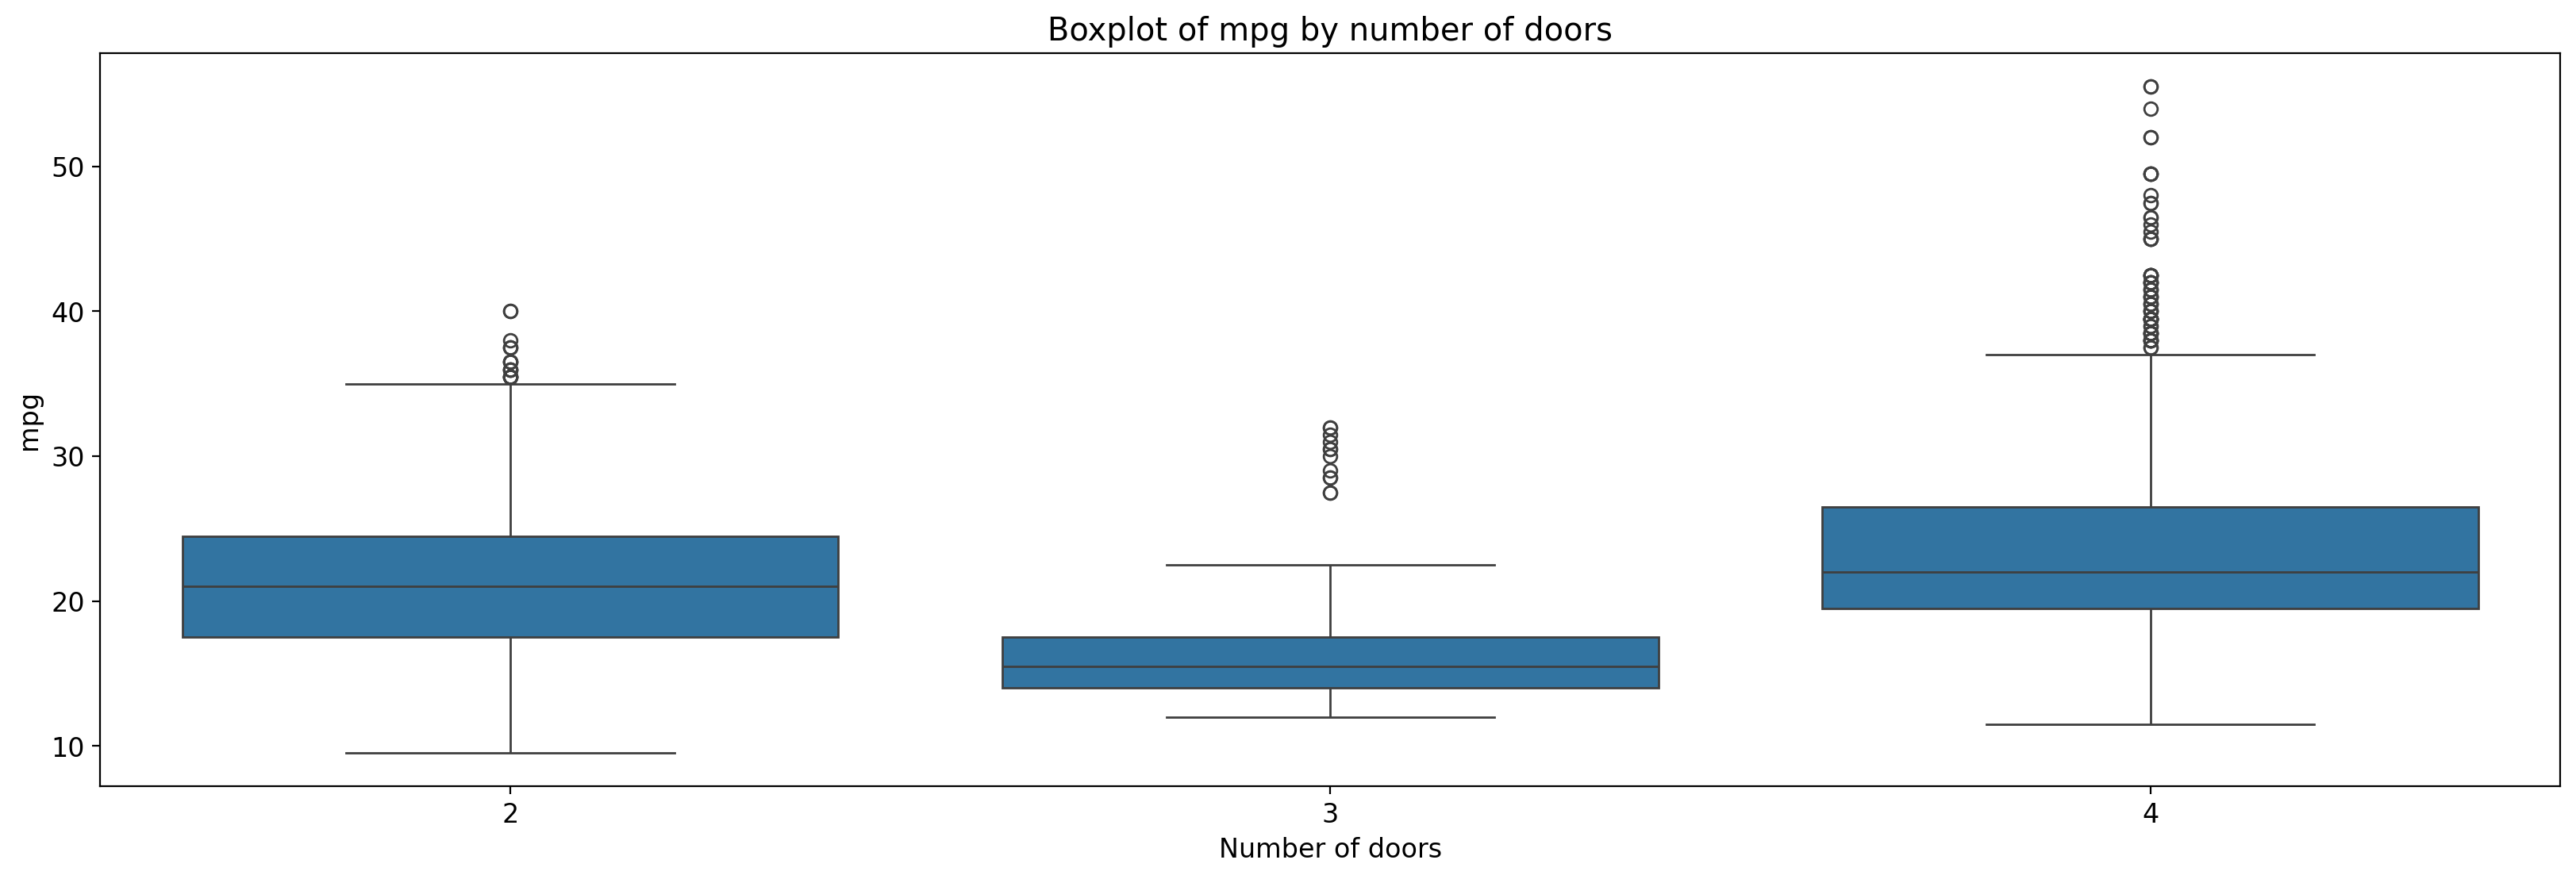

In [115]:
# plot with mpg on the y-axis and number of doors on the x-axis
plt.figure(figsize=(20, 6))
sns.boxplot(x='Number of Doors', y='mpg', data=df_unique)
plt.title('Boxplot of mpg by number of doors')
plt.xlabel('Number of doors')
plt.ylabel('mpg')
plt.show()

On visualizing the number of doors against the mpg we can see that there seems to be no relation between MPG and Number of door.

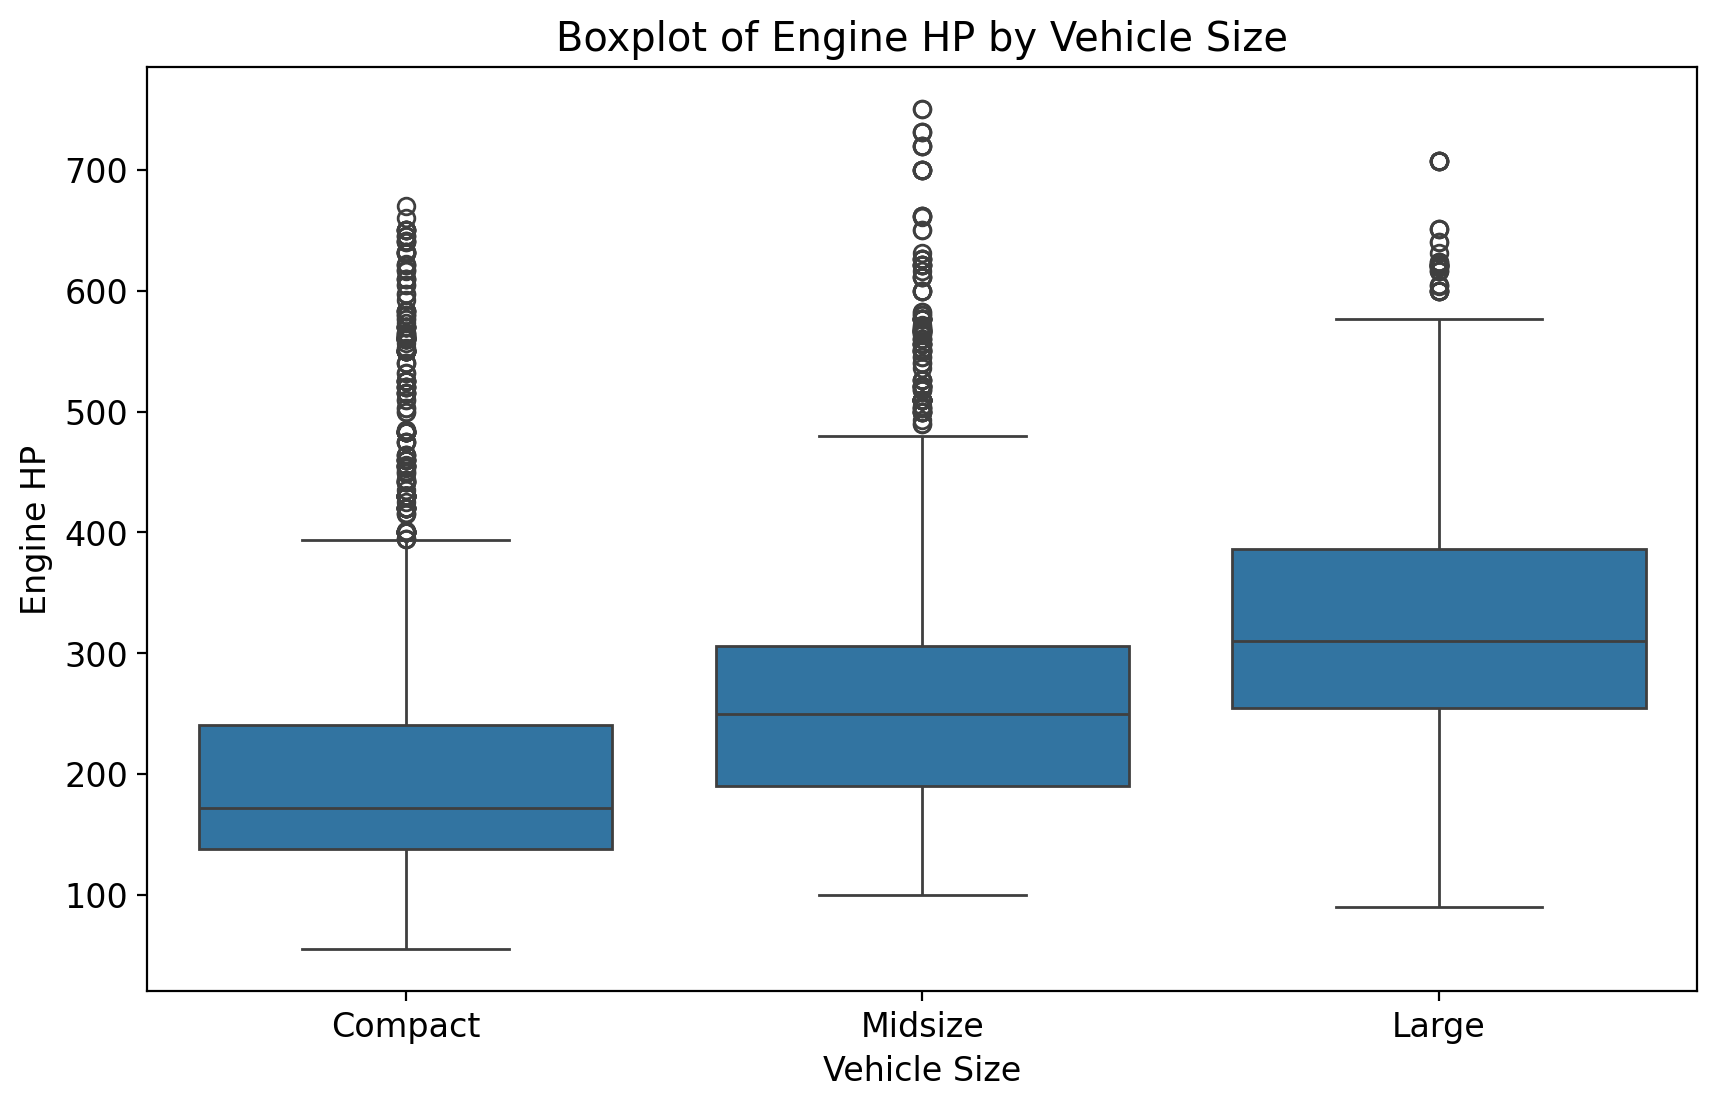

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Size', y='Engine HP', data=df_unique)
plt.title('Boxplot of Engine HP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Engine HP')
plt.show()

On visualizing the vehicle size to the engine HP it is found that the engine HP increases for bigger vehicles.

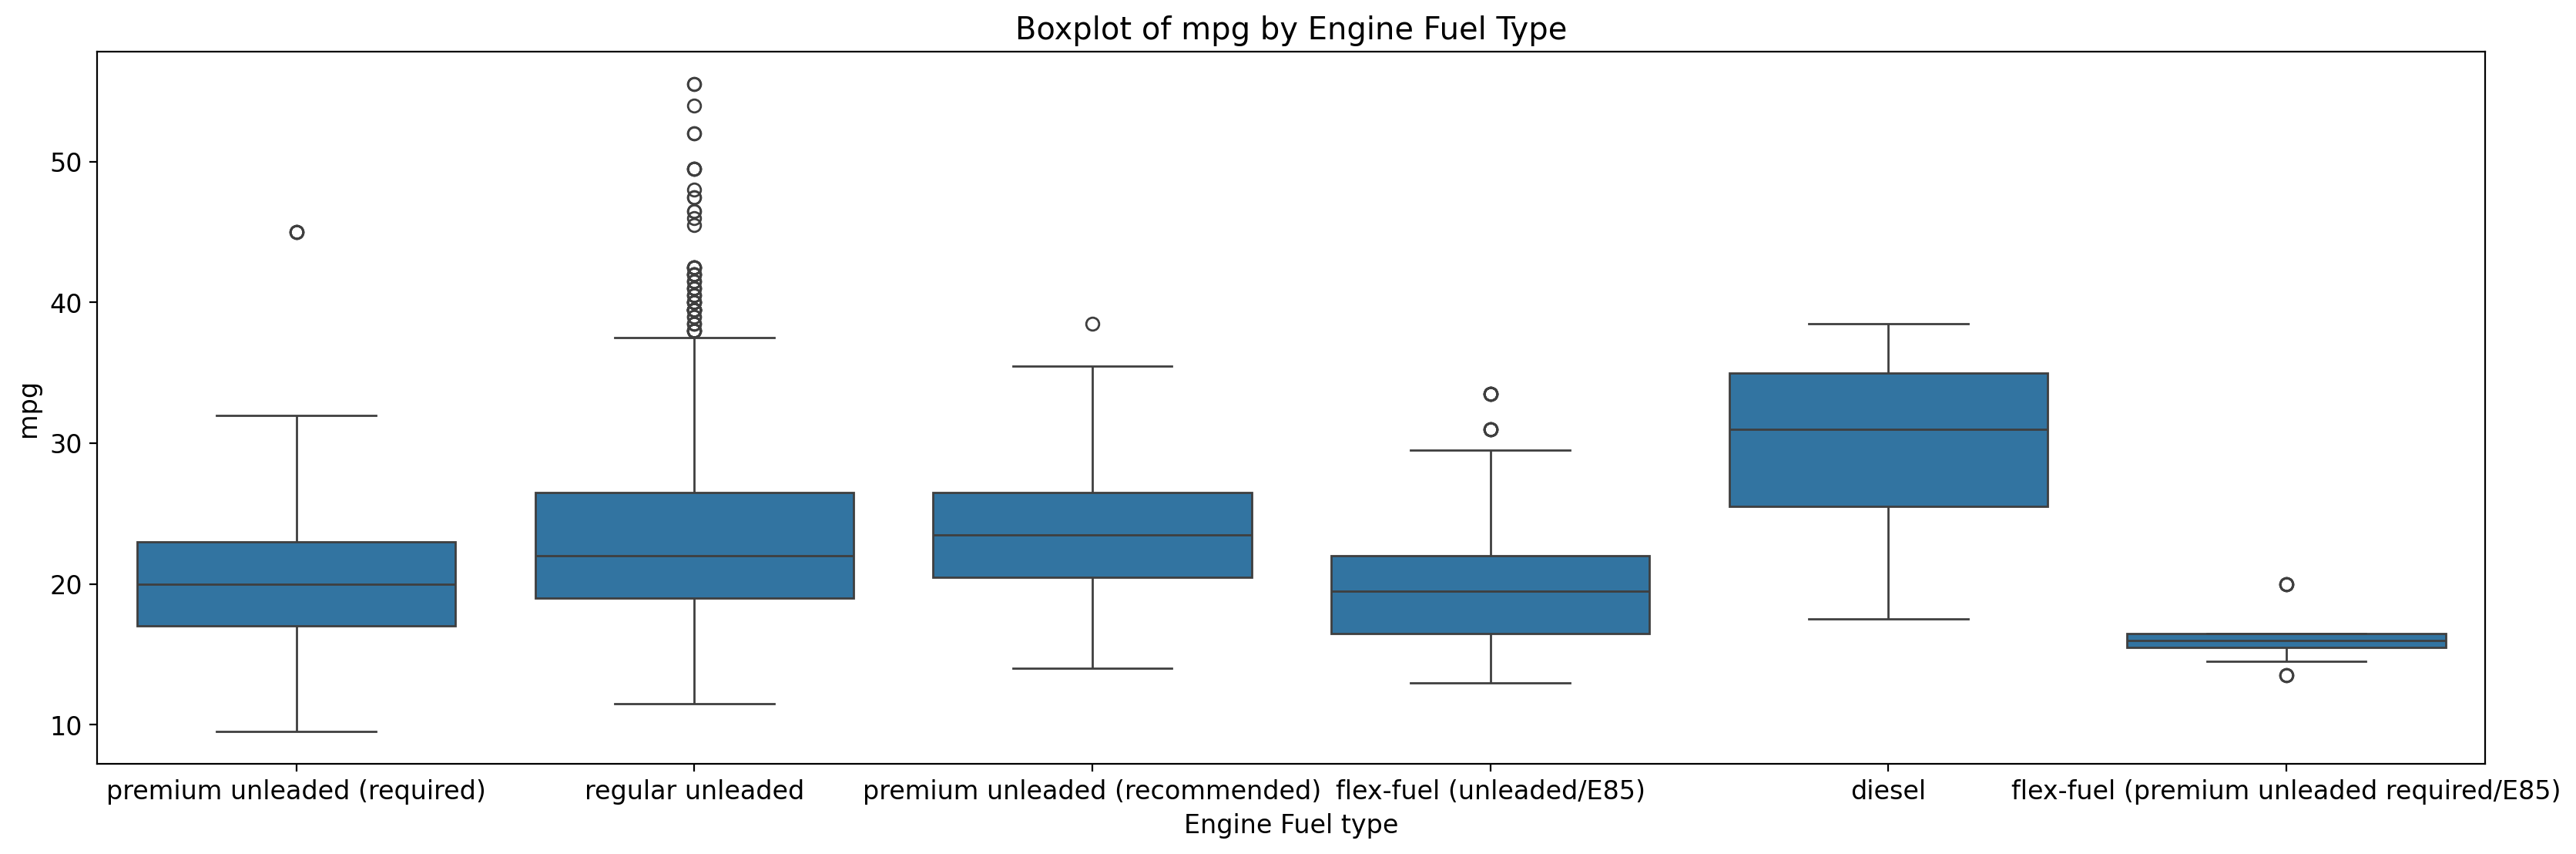

In [117]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Engine Fuel Type', y='mpg', data=df_unique)
plt.title('Boxplot of mpg by Engine Fuel Type')
plt.xlabel('Engine Fuel type')
plt.ylabel('mpg')
plt.show()

Based on the above visualization we can see that some types of fuels are better for MPG

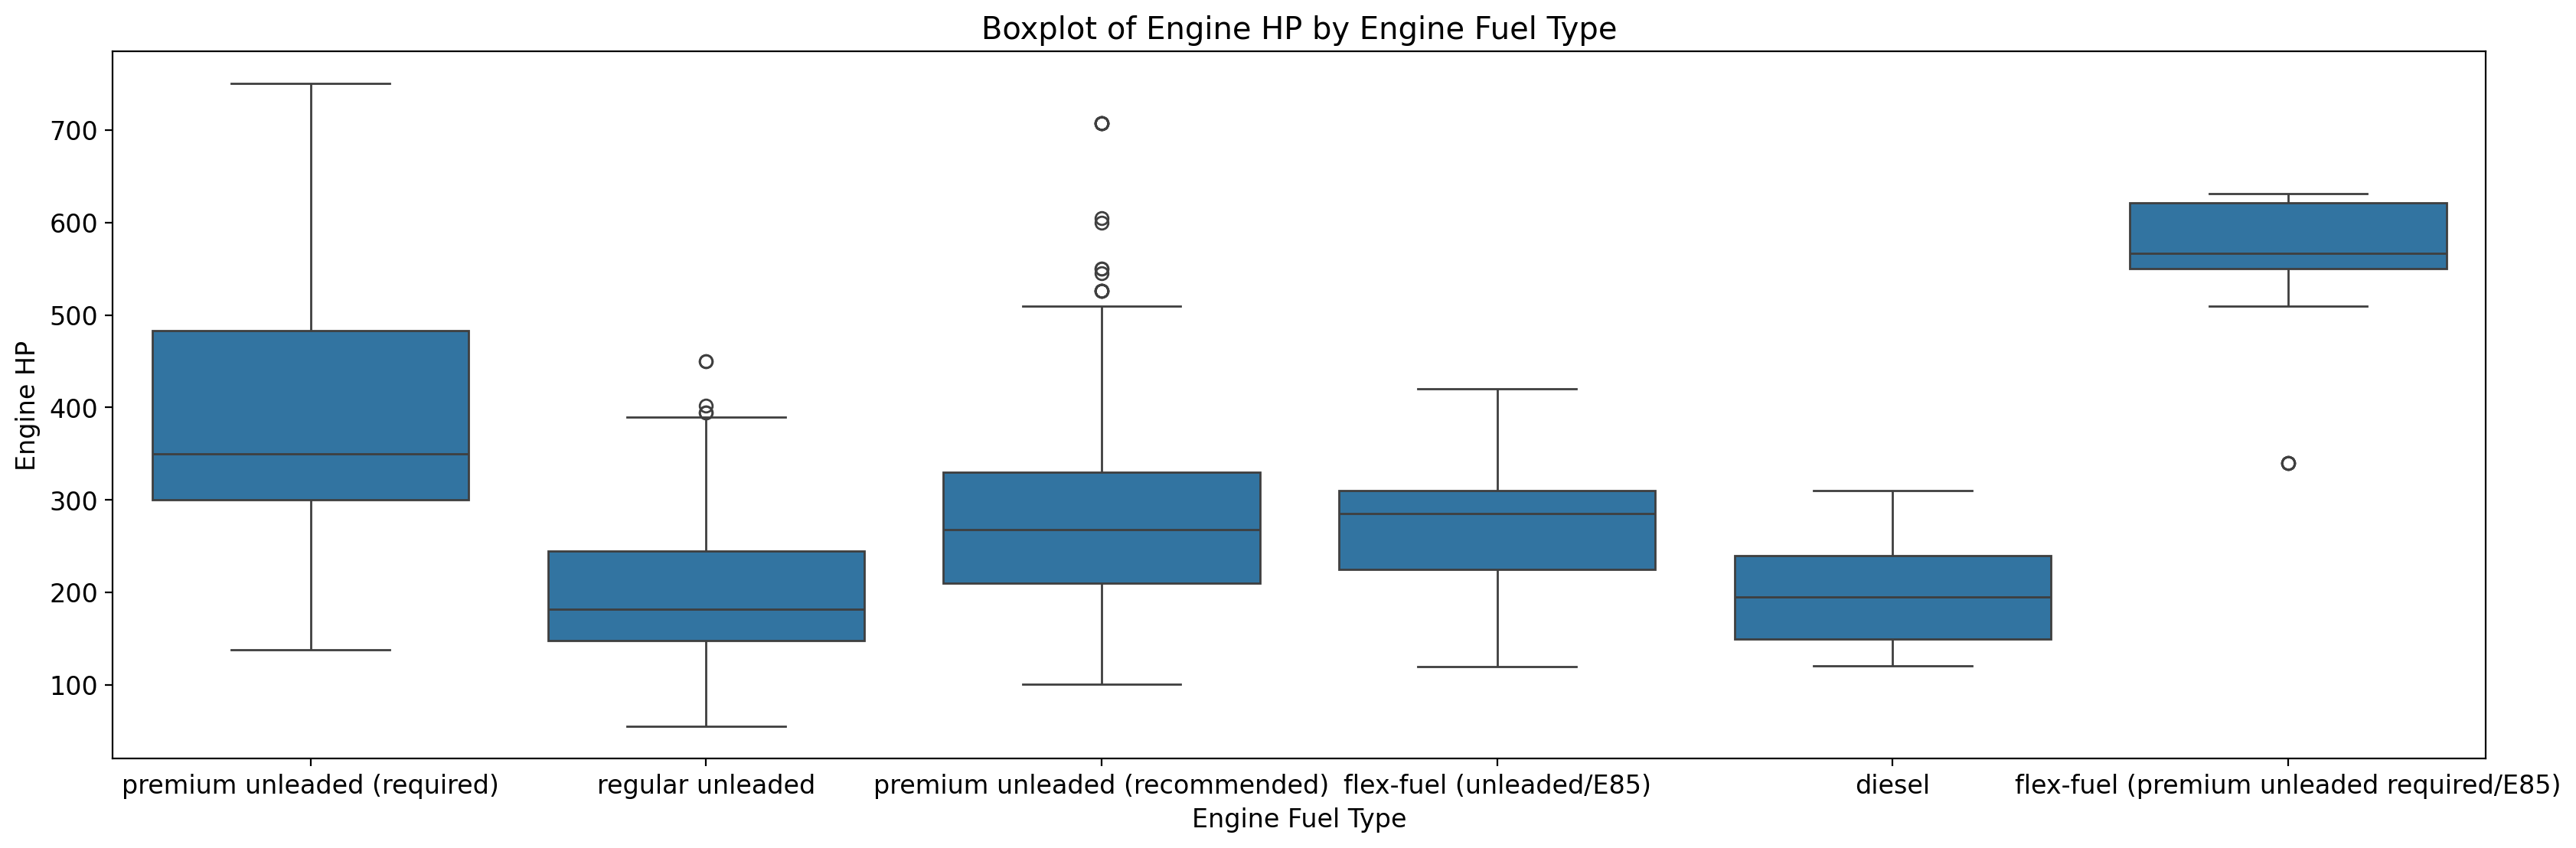

In [118]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Engine Fuel Type', y='Engine HP', data=df_unique)
plt.title('Boxplot of Engine HP by Engine Fuel Type')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Engine HP')
plt.show()

**Insight:** The 2 boxplots above show the inverse relationship between the choices made for fuel. Here we can see that higher HP vehicles prefer to have flex-fuel(Premium unleaded(required), E85) over other types of fuel. This fuel also has the some of the lowest MPG values.

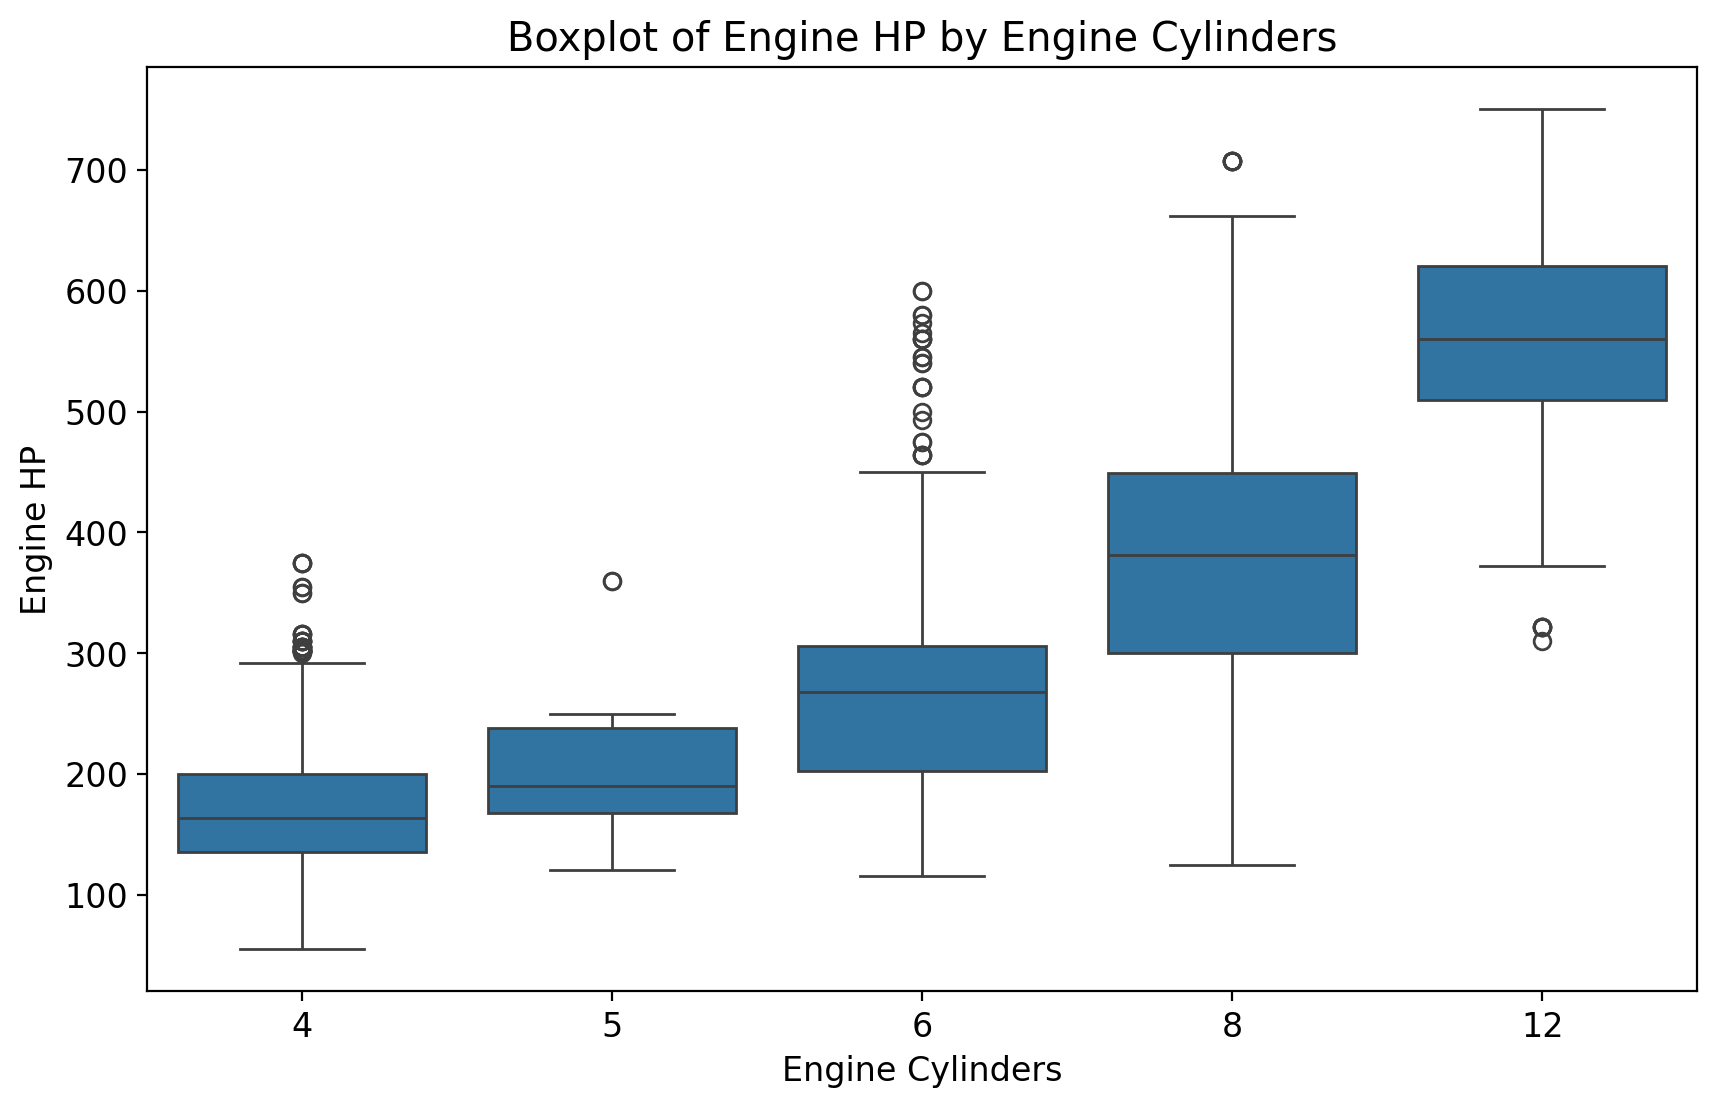

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine Cylinders', y='Engine HP', data=df_unique)
plt.title('Boxplot of Engine HP by Engine Cylinders')
plt.xlabel('Engine Cylinders')
plt.ylabel('Engine HP')
plt.show()

The correlation seen from the matrix is visualized above where a increase in the number of cylinders increases the engine HP.

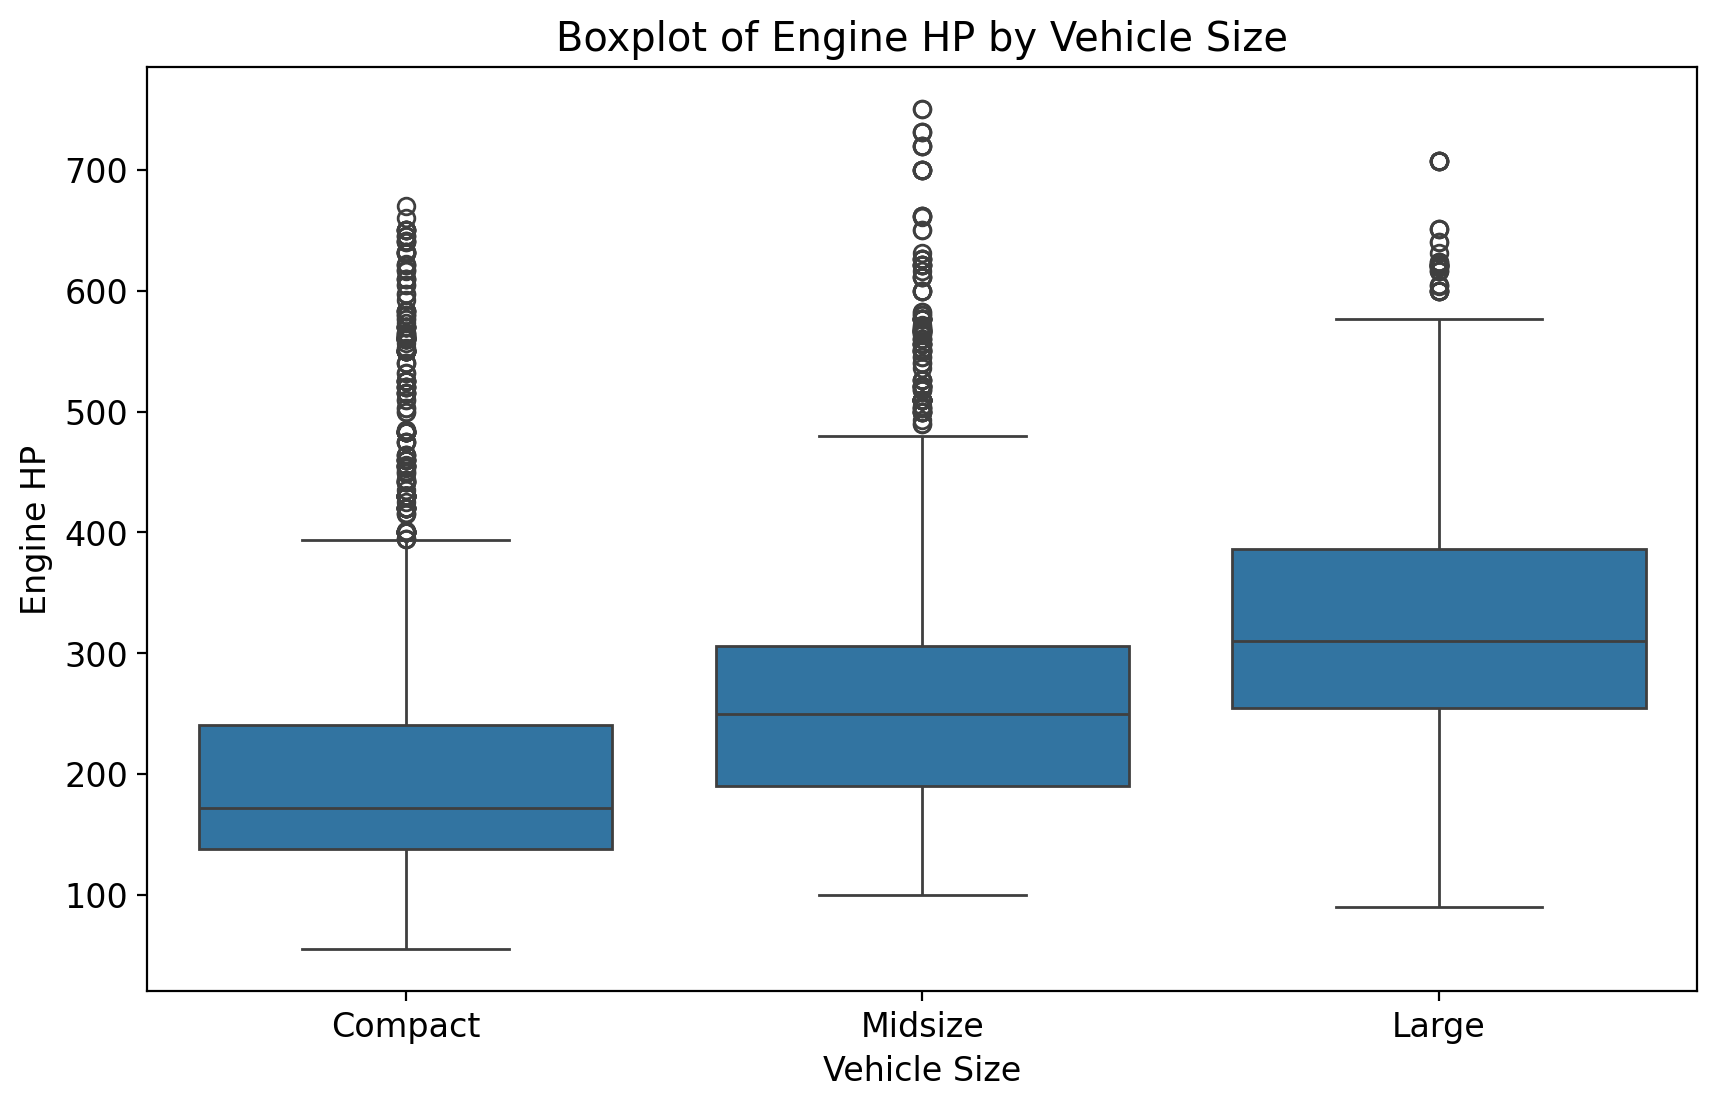

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Size', y='Engine HP', data=df_unique)
plt.title('Boxplot of Engine HP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Engine HP')
plt.show()

Similarly when visualizing the engine HP to the vehicle size. We find that the bigger the vehicle the more HP it needs.

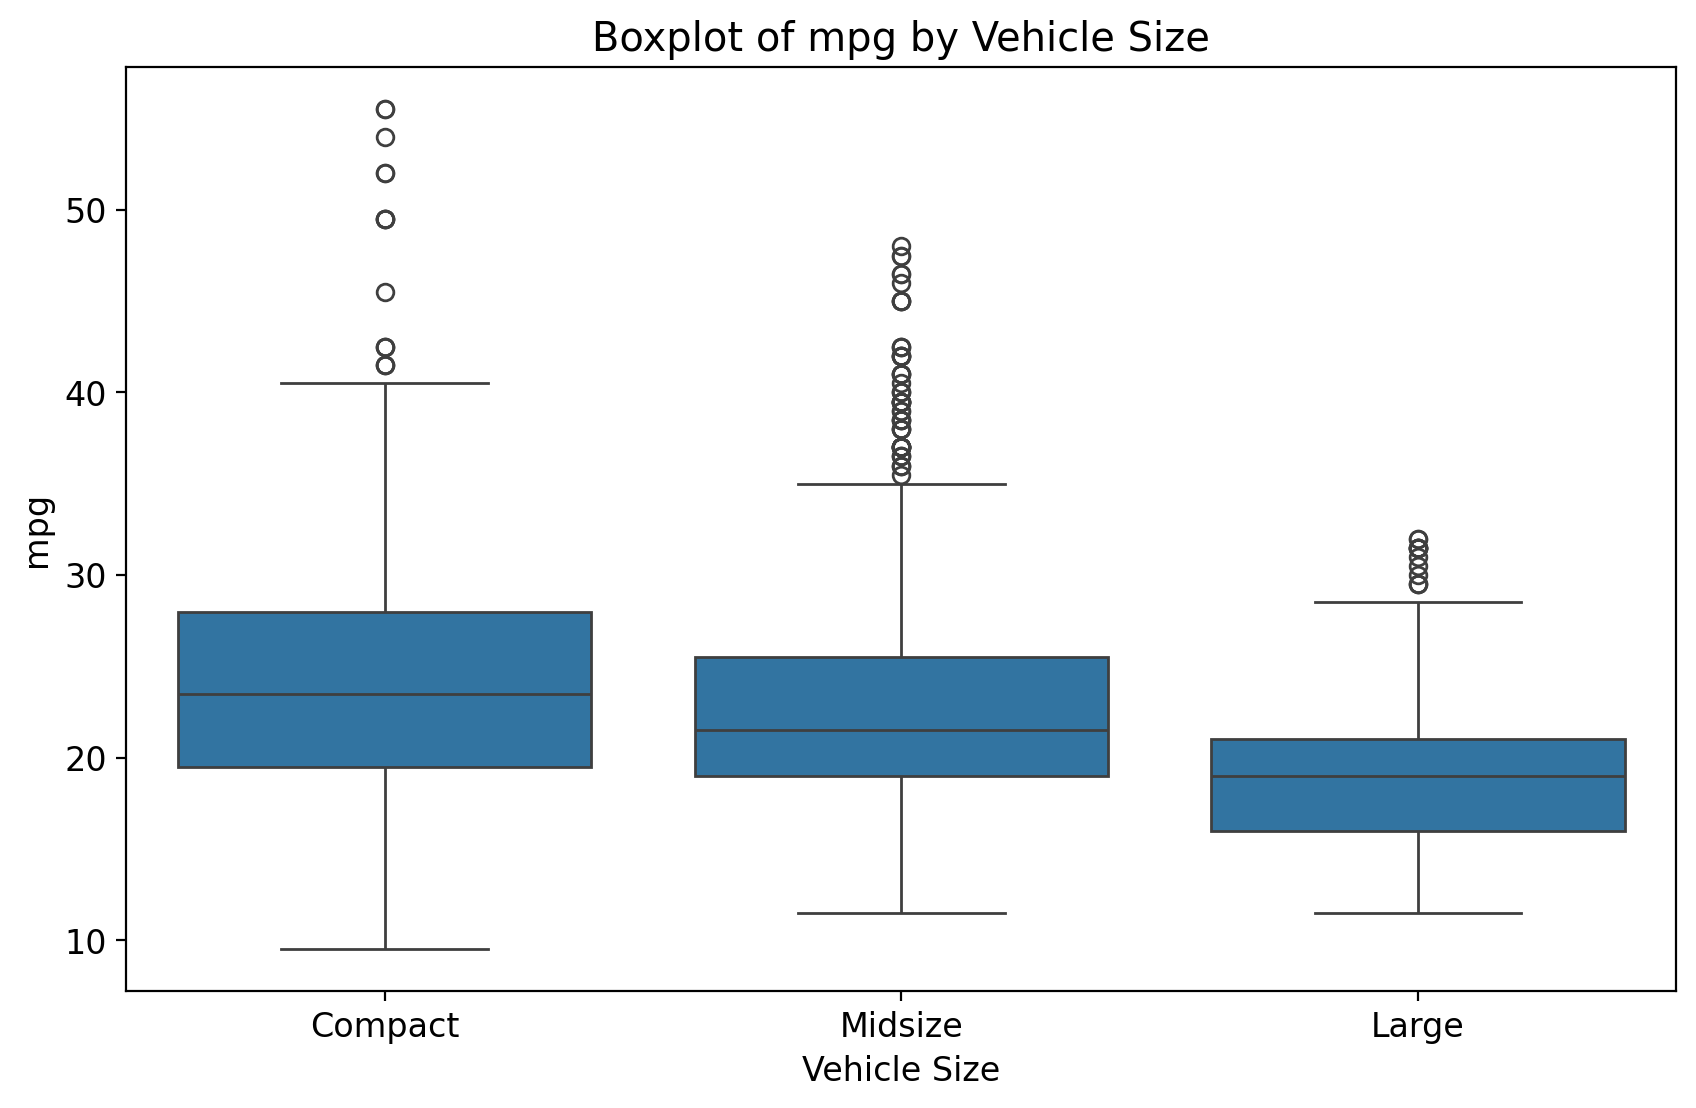

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Size', y='mpg', data=df_unique)
plt.title('Boxplot of mpg by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('mpg')
plt.show()

**Insight:**This directly means that the bigger the vehicle the more HP it needs hence the more cylinders it has which causes the Miles per gallon of the vehicle to reduce

##4c. Based on your analysis, propose hypotheses that could be tested in further studies. Explain why these hypotheses are relevant to the business problem and how they could provide value. [0.5]

**Hypothesis 1:** High performance vehicle are delibrately made to have higher horsepower and hence have low fuel efficiency.

**Explanation:**
- Choices made for high performance is very different from the choices made for fuel efficiency so the business will have to decide its priority during the design phase of the car.
- Added value: High performance engines can be examined to identify the trade off between fuel efficiency and performance.

**Hypothesis 2:** Smaller cars have higher fuel efficiency.

**Explanation:**
- Smaller cars do not have the need for higher HP values. Hence the engine usually has lower number cylinders and therefore end up with better fuel efficiency.
- Added value: Smaller cars can be designed to target audiences who want high fuel efficiency if the hypothesis is true.